# Final Project - Financial Modeling in Python
Christina Salemme

Due Date: Friday, December 13th, 11:59pm

## Loading Data and Initial Formatting

1) Writing a script obtaining the tickers of the 30 companies from a website

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import date
import pandas_datareader.data as web
import statsmodels.api as sm
from scipy.optimize import minimize
from scipy.stats import norm
import requests
from bs4 import BeautifulSoup


In [ ]:
url = "https://bullishbears.com/dow-jones-stocks-list/"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36",
    "Accept-Language": "en-US,en;q=0.9",}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')
print(soup.prettify())


<!DOCTYPE html>
<html lang="en-US">
 <head>
  <script>
   if(navigator.userAgent.match(/MSIE|Internet Explorer/i)||navigator.userAgent.match(/Trident\/7\..*?rv:11/i)){var e=document.location.href;if(!e.match(/[?&]nonitro/)){if(e.indexOf("?")==-1){if(e.indexOf("#")==-1){document.location.href=e+"?nonitro=1"}else{document.location.href=e.replace("#","?nonitro=1#")}}else{if(e.indexOf("#")==-1){document.location.href=e+"&nonitro=1"}else{document.location.href=e.replace("#","&nonitro=1#")}}}}
  </script>
  <link href="https://www.googletagmanager.com" rel="preconnect"/>
  <link href="https://cdn-ggnil.nitrocdn.com" rel="preconnect"/>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1" name="robots"/>
  <title>
   Dow Jones Stocks List: Top Index of Companies in 2024
  </title>
  <meta content="This Dow Jones stocks list includes companies such as 1. [A

In [ ]:
tbody = soup.find('tbody', class_='row-striping row-hover')
if tbody:
    tickers = []
    for row in tbody.find_all('tr'):
        ticker_td = row.find('td', class_='column-1')
        if ticker_td:
            tickers.append(ticker_td.text.strip())
    print(tickers)

In [ ]:
tickers = [ticker for ticker in tickers if ticker != 'DOW']
print(tickers)

['AAPL', 'MSFT', 'UNH', 'V', 'JNJ', 'WMT', 'JPM', 'PG', 'HD', 'CVX', 'KO', 'DIS', 'CSCO', 'VZ', 'NKE', 'MRK', 'INTC', 'CRM', 'MCD', 'AXP', 'AMGN', 'HON', 'CAT', 'IBM', 'GS', 'BA', 'MMM', 'DOW', 'TRV', 'WBA']
['AAPL', 'MSFT', 'UNH', 'V', 'JNJ', 'WMT', 'JPM', 'PG', 'HD', 'CVX', 'KO', 'DIS', 'CSCO', 'VZ', 'NKE', 'MRK', 'INTC', 'CRM', 'MCD', 'AXP', 'AMGN', 'HON', 'CAT', 'IBM', 'GS', 'BA', 'MMM', 'TRV', 'WBA']


2) Download the stock returns for the 30 companies over the time period January 2010 – December 2023 using Yahoo Finance

In [ ]:
start_date = "2010-01-01"
end_date = "2023-12-31"
dailyprc=yf.download(tickers,start_date, end_date)['Adj Close']
dailyprc

[*********************100%***********************]  29 of 29 completed


Ticker            AAPL        AMGN         AXP          BA         CAT  \
Date                                                                     
2010-01-04    6.447410   40.591274   32.906181   43.777554   39.883915   
2010-01-05    6.458557   40.239666   32.833805   45.211349   40.360744   
2010-01-06    6.355828   39.937263   33.364540   46.582794   40.483353   
2010-01-07    6.344077   39.571579   33.905697   48.468567   40.646854   
2010-01-08    6.386255   39.923191   33.881435   48.001007   41.103252   
...                ...         ...         ...         ...         ...   
2023-12-22  192.656174  275.825684  183.374329  260.440002  285.776489   
2023-12-26  192.108871  275.573273  183.759689  262.790009  290.963287   
2023-12-27  192.208359  278.126190  184.846680  262.100006  293.413940   
2023-12-28  192.636276  279.999603  185.577911  260.350006  292.193573   
2023-12-29  191.591385  279.572479  185.123352  260.660004  291.002655   

Ticker             CRM       CSCO         CVX        DIS          GS  ...  \
Date                                                                  ...   
2010-01-04   18.622328  16.475372   43.600773  27.715311  133.307678  ...   
2010-01-05   18.542683  16.401964   43.909607  27.646175  135.664490  ...   
2010-01-06   18.510326  16.295208   43.915131  27.499260  134.216522  ...   
2010-01-07   18.428190  16.368599   43.749687  27.507900  136.842911  ...   
2010-01-08   18.455570  16.455351   43.826885  27.551113  134.255020  ...   
...                ...        ...         ...        ...         ...  ...   
2023-12-22  265.162842  48.510948  144.811356  90.602005  371.647156  ...   
2023-12-26  265.043365  48.694958  146.115204  90.532326  372.584473  ...   
2023-12-27  265.541199  48.849915  145.635849  89.964943  375.386627  ...   
2023-12-28  264.406219  48.888653  143.584244  89.984856  377.270966  ...   
2023-12-29  261.977020  48.927395  142.999435  89.875359  376.646088  ...   

Ticker             MRK        MSFT         NKE          PG         TRV  \
Date                                                                     
2010-01-04   21.558416   23.300680   13.578011   39.432011   34.862865   
2010-01-05   21.645794   23.308208   13.632029   39.444912   34.036976   
2010-01-06   21.937037   23.165167   13.548928   39.257828   33.554012   
2010-01-07   21.971991   22.924257   13.681894   39.044922   34.036976   
2010-01-08   21.960339   23.082352   13.654888   38.993305   33.987980   
...                ...         ...         ...         ...         ...   
2023-12-22  105.677666  371.799683  106.217964  141.751053  182.480560   
2023-12-26  105.608986  371.879150  106.198296  142.395020  183.747528   
2023-12-27  105.952423  371.293518  105.323303  142.512100  185.250168   
2023-12-28  106.727577  372.494537  106.984810  142.190125  185.947510   
2023-12-29  106.972878  373.248932  106.739021  142.980438  187.086792   

Ticker             UNH           V         VZ        WBA        WMT  
Date                                                                 
2010-01-04   25.203194   19.785192  14.697933  22.702435  13.113414  
2010-01-05   25.163219   19.558477  14.724424  22.519844  12.982838  
2010-01-06   25.411028   19.295835  14.301041  22.349419  12.953821  
2010-01-07   26.386223   19.475412  14.215920  22.483322  12.961072  
2010-01-08   26.138424   19.529297  14.224876  22.513754  12.895784  
...                ...         ...        ...        ...        ...  
2023-12-22  512.289185  256.469635  35.147896  24.237406  51.712524  
2023-12-26  512.013550  257.194092  35.138519  24.597919  51.633293  
2023-12-27  514.730896  256.965820  34.979141  24.625648  52.118565  
2023-12-28  516.808472  258.424683  35.147896  24.588675  52.016232  
2023-12-29  518.354248  258.375092  35.344776  24.135725  52.042637  

[3522 rows x 29 columns]

In [ ]:
fill_method=None
dailyrets = dailyprc.pct_change().dropna()
dailyrets

Ticker          AAPL      AMGN       AXP        BA       CAT       CRM  \
Date                                                                     
2010-01-05  0.001729 -0.008662 -0.002199  0.032752  0.011955 -0.004277   
2010-01-06 -0.015906 -0.007515  0.016164  0.030334  0.003038 -0.001745   
2010-01-07 -0.001849 -0.009156  0.016220  0.040482  0.004039 -0.004437   
2010-01-08  0.006649  0.008885 -0.000716 -0.009647  0.011228  0.001486   
2010-01-11 -0.008822  0.004404 -0.011442 -0.011851  0.062811 -0.006743   
...              ...       ...       ...       ...       ...       ...   
2023-12-22 -0.005547  0.017291  0.004221 -0.006030  0.001000 -0.003405   
2023-12-26 -0.002841 -0.000915  0.002101  0.009023  0.018150 -0.000451   
2023-12-27  0.000518  0.009264  0.005915 -0.002626  0.008423  0.001878   
2023-12-28  0.002226  0.006736  0.003956 -0.006677 -0.004159 -0.004274   
2023-12-29 -0.005424 -0.001525 -0.002449  0.001191 -0.004076 -0.009187   

Ticker          CSCO       CVX       DIS        GS  ...       MRK      MSFT  \
Date                                                ...                       
2010-01-05 -0.004456  0.007083 -0.002494  0.017679  ...  0.004053  0.000323   
2010-01-06 -0.006509  0.000126 -0.005314 -0.010673  ...  0.013455 -0.006137   
2010-01-07  0.004504 -0.003767  0.000314  0.019568  ...  0.001593 -0.010400   
2010-01-08  0.005300  0.001765  0.001571 -0.018911  ... -0.000530  0.006896   
2010-01-11 -0.002839  0.017742 -0.016311 -0.015776  ...  0.003979 -0.012720   
...              ...       ...       ...       ...  ...       ...       ...   
2023-12-22  0.007847  0.002256 -0.010867  0.000210  ...  0.012313  0.002784   
2023-12-26  0.003793  0.009004 -0.000769  0.002522  ... -0.000650  0.000214   
2023-12-27  0.003182 -0.003281 -0.006267  0.007521  ...  0.003252 -0.001575   
2023-12-28  0.000793 -0.014087  0.000221  0.005020  ...  0.007316  0.003235   
2023-12-29  0.000792 -0.004073 -0.001217 -0.001656  ...  0.002298  0.002025   

Ticker           NKE        PG       TRV       UNH         V        VZ  \
Date                                                                     
2010-01-05  0.003978  0.000327 -0.023690 -0.001586 -0.011459  0.001802   
2010-01-06 -0.006096 -0.004743 -0.014189  0.009848 -0.013429 -0.028754   
2010-01-07  0.009814 -0.005423  0.014394  0.038377  0.009307 -0.005952   
2010-01-08 -0.001974 -0.001322 -0.001439 -0.009391  0.002767  0.000630   
2010-01-11 -0.012325 -0.003971 -0.000412  0.006727 -0.002874  0.004094   
...              ...       ...       ...       ...       ...       ...   
2023-12-22 -0.118257  0.007071  0.001239  0.000827 -0.004277  0.001603   
2023-12-26 -0.000185  0.004543  0.006943 -0.000538  0.002825 -0.000267   
2023-12-27 -0.008239  0.000822  0.008178  0.005307 -0.000888 -0.004536   
2023-12-28  0.015775 -0.002259  0.003764  0.004036  0.005677  0.004824   
2023-12-29 -0.002297  0.005558  0.006127  0.002991 -0.000192  0.005601   

Ticker           WBA       WMT  
Date                            
2010-01-05 -0.008043 -0.009957  
2010-01-06 -0.007568 -0.002235  
2010-01-07  0.005991  0.000560  
2010-01-08  0.001354 -0.005037  
2010-01-11  0.001622  0.016501  
...              ...       ...  
2023-12-22  0.006140  0.011951  
2023-12-26  0.014874 -0.001532  
2023-12-27  0.001127  0.009398  
2023-12-28 -0.001501 -0.001963  
2023-12-29 -0.018421  0.000508  

[3521 rows x 29 columns]

In [ ]:
daily_mu = dailyrets.mean()
daily_sigma = dailyrets.std()

In [ ]:
monthlyprc=dailyprc.resample('M').last()
monthlyprc.dropna(inplace=True)
monthlyprc

<ipython-input-8-c33409a3b673>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthlyprc=dailyprc.resample('M').last()


Ticker            AAPL        AMGN         AXP          BA         CAT  \
Date                                                                     
2010-01-31    5.786130   41.125759   30.416582   47.221775   35.828358   
2010-02-28    6.164523   39.810696   30.844643   49.552628   39.127254   
2010-03-31    7.079772   42.082150   33.469418   56.966717   43.105156   
2010-04-30    7.865775   40.302967   37.411770   56.825455   46.990253   
2010-05-31    7.738941   36.414013   32.341866   50.645096   41.931671   
...                ...         ...         ...         ...         ...   
2023-08-31  186.708130  246.880493  155.481812  224.029999  275.269836   
2023-09-30  170.151169  258.842224  146.821503  191.679993  267.309296   
2023-10-31  169.713882  246.264130  144.302139  186.820007  222.481659   
2023-11-30  189.023972  261.731567  168.749420  231.630005  246.762253   
2023-12-31  191.591385  279.572479  185.123352  260.660004  291.002655   

Ticker             CRM       CSCO         CVX        DIS          GS  ...  \
Date                                                                  ...   
2010-01-31   15.817282  14.993993   39.773438  25.537495  114.545418  ...   
2010-02-28   16.912418  16.235146   40.254318  26.998016  120.692108  ...   
2010-03-31   18.530237  17.369535   42.219704  30.169682  131.715363  ...   
2010-04-30   21.305416  17.970097   45.343189  31.837614  112.085022  ...   
2010-05-31   21.536890  15.454423   41.512474  28.882002  111.637886  ...   
...                ...        ...         ...        ...         ...  ...   
2023-08-31  220.481201  55.143818  152.844101  83.025131  317.353363  ...   
2023-09-30  201.883774  51.691917  159.978714  80.415718  313.344177  ...   
2023-10-31  199.942383  50.486637  138.261780  80.951485  294.014984  ...   
2023-11-30  250.786667  46.854855  137.669067  91.964622  333.462189  ...   
2023-12-31  261.977020  48.927395  142.999435  89.875359  376.646088  ...   

Ticker             MRK        MSFT         NKE          PG         TRV  \
Date                                                                     
2010-01-31   22.239939   21.215290   13.245570   39.994534   35.464798   
2010-02-28   21.482693   21.685116   14.045500   41.118683   36.808647   
2010-03-31   21.984282   22.154062   15.332570   41.112190   37.985916   
2010-04-30   20.624605   23.099524   15.835310   40.701782   35.732407   
2010-05-31   19.830002   19.602383   15.098930   40.001163   34.838036   
...                ...         ...         ...         ...         ...   
2023-08-31  105.446053  324.668243   99.326050  149.646454  156.504303   
2023-09-30  100.290665  312.771545   93.691994  141.424332  159.516525   
2023-10-31  100.047134  334.920654  100.697815  146.385666  163.550598   
2023-11-30   99.832817  376.097595  108.046593  149.790894  176.424423   
2023-12-31  106.972878  373.248932  106.739021  142.980438  187.086792   

Ticker             UNH           V         VZ        WBA        WMT  
Date                                                                 
2010-01-31   26.378225   18.413652  13.180971  21.941629  12.919971  
2010-02-28   27.065662   19.171978  12.961443  21.537380  13.074724  
2010-03-31   26.114443   20.464643  13.897820  22.668024  13.520475  
2010-04-30   24.250273   20.284792  13.148172  21.482376  13.043859  
2010-05-31   23.258181   16.314114  12.520336  19.657623  12.366306  
...                ...         ...        ...        ...        ...  
2023-08-31  465.824554  243.298370  32.109325  22.855263  53.481377  
2023-09-30  494.729950  227.780273  29.750242  20.083012  52.599945  
2023-10-31  525.511353  232.820953  32.935333  19.035517  53.744488  
2023-11-30  542.594666  254.732910  35.935417  18.432262  51.205433  
2023-12-31  518.354248  258.375092  35.344776  24.135725  52.042637  

[168 rows x 29 columns]

In [ ]:
monthlyrets=monthlyprc.pct_change().dropna()
monthlyrets

Ticker          AAPL      AMGN       AXP        BA       CAT       CRM  \
Date                                                                     
2010-02-28  0.065396 -0.031977  0.014073  0.049360  0.092075  0.069237   
2010-03-31  0.148470  0.057056  0.085097  0.149621  0.101666  0.095659   
2010-04-30  0.111021 -0.042279  0.117790 -0.002480  0.090131  0.149765   
2010-05-31 -0.016125 -0.096493 -0.135516 -0.108760 -0.107652  0.010865   
2010-06-30 -0.020826  0.015836  0.000227 -0.022281 -0.011356 -0.008205   
...              ...       ...       ...       ...       ...       ...   
2023-08-31 -0.042384  0.103638 -0.064484 -0.062047  0.060188 -0.015777   
2023-09-30 -0.088678  0.048452 -0.055700 -0.144400 -0.028919 -0.084349   
2023-10-31 -0.002570 -0.048594 -0.017159 -0.025355 -0.167700 -0.009616   
2023-11-30  0.113780  0.062808  0.169417  0.239857  0.109135  0.254295   
2023-12-31  0.013582  0.068165  0.097031  0.125329  0.179284  0.044621   

Ticker          CSCO       CVX       DIS        GS  ...       MRK      MSFT  \
Date                                                ...                       
2010-02-28  0.082777  0.012090  0.057191  0.053662  ... -0.034049  0.022146   
2010-03-31  0.069872  0.048824  0.117478  0.091334  ...  0.023349  0.021625   
2010-04-30  0.034576  0.073982  0.055285 -0.149036  ... -0.061848  0.042677   
2010-05-31 -0.139992 -0.084483 -0.092834 -0.003989  ... -0.038527 -0.151395   
2010-06-30 -0.079880 -0.081359 -0.057451 -0.090046  ...  0.049503 -0.108139   
...              ...       ...       ...       ...  ...       ...       ...   
2023-08-31  0.102037 -0.006182 -0.058612 -0.071451  ...  0.021847 -0.022226   
2023-09-30 -0.062598  0.046679 -0.031429 -0.012633  ... -0.048891 -0.036643   
2023-10-31 -0.023317 -0.135749  0.006662 -0.061687  ... -0.002428  0.070816   
2023-11-30 -0.071936 -0.004287  0.136046  0.134167  ... -0.002142  0.122945   
2023-12-31  0.044233  0.038719 -0.022718  0.129502  ...  0.071520 -0.007574   

Ticker           NKE        PG       TRV       UNH         V        VZ  \
Date                                                                     
2010-02-28  0.060392  0.028108  0.037892  0.026061  0.041183 -0.016655   
2010-03-31  0.091636 -0.000158  0.031983 -0.035145  0.067425  0.072243   
2010-04-30  0.032789 -0.009983 -0.059325 -0.071385 -0.008788 -0.053940   
2010-05-31 -0.046502 -0.017213 -0.025030 -0.040911 -0.195747 -0.047751   
2010-06-30 -0.063267 -0.018170  0.003033 -0.018948 -0.023599  0.018169   
...              ...       ...       ...       ...       ...       ...   
2023-08-31 -0.078630 -0.012540 -0.065929 -0.058831  0.035385  0.026408   
2023-09-30 -0.056723 -0.054944  0.019247  0.062052 -0.063782 -0.073470   
2023-10-31  0.074775  0.035081  0.025289  0.062219  0.022130  0.107061   
2023-11-30  0.072979  0.023262  0.078715  0.032508  0.094115  0.091090   
2023-12-31 -0.012102 -0.045466  0.060436 -0.044675  0.014298 -0.016436   

Ticker           WBA       WMT  
Date                            
2010-02-28 -0.018424  0.011978  
2010-03-31  0.052497  0.034093  
2010-04-30 -0.052305 -0.035251  
2010-05-31 -0.084942 -0.051944  
2010-06-30 -0.166667 -0.049249  
...              ...       ...  
2023-08-31 -0.140295  0.020819  
2023-09-30 -0.121296 -0.016481  
2023-10-31 -0.052158  0.021759  
2023-11-30 -0.031691 -0.047243  
2023-12-31  0.309428  0.016350  

[167 rows x 29 columns]

In [ ]:
mu=monthlyrets.mean()
sigma=monthlyrets.std()

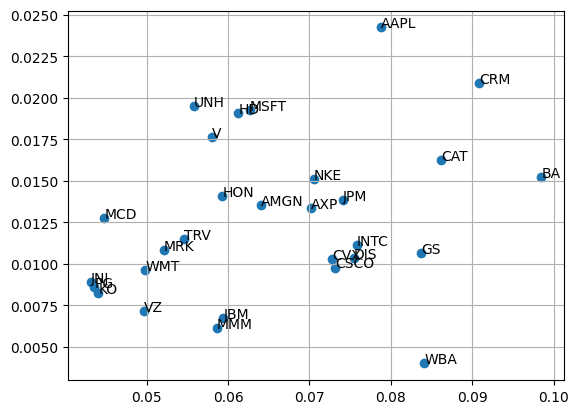

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(sigma,mu)
for i in mu.index:
    plt.annotate(i, (sigma[i], mu[i]))
plt.grid()
plt.show()

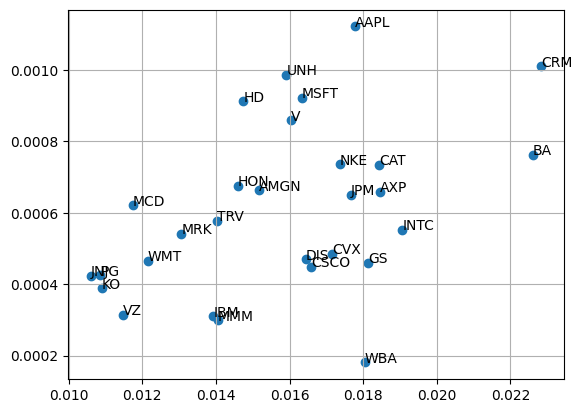

In [ ]:
plt.scatter(daily_sigma, daily_mu)
for i in daily_mu.index:
    plt.annotate(i, (daily_sigma[i], daily_mu[i]))
plt.grid()
plt.show()

## Part One - Portfolio Analysis
3) Using overlapping 3-windows calculate the weights on each stock to achieve: Minimum variance portfolio in a simulation, max Sharpe portfolio in a simulation, max Sharpe portfolio analytically, max Sharp portfolio analytically with the constr4ina that each weight must be positive and no weight can be bigger than 10% and GMv portfolio analytically

In [ ]:
mu_vec=np.array(monthlyrets.mean()*12)
cov_matrix = np.array(monthlyrets.cov()*12)

In [ ]:
import pandas_datareader as pdr
tenyr_yield=pdr.DataReader('DGS10','fred',start_date,end_date).dropna()
rf=tenyr_yield.iloc[0][0]/100
rf

<ipython-input-14-d19cd8565999>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rf=tenyr_yield.iloc[0][0]/100


0.0385

In [ ]:
#creating individual dataframes
min_variance_df = pd.DataFrame(index=monthlyrets.columns, columns=[f"{y}-{y+2}" for y in range(2010, 2022)])
max_sharpe_sim_df = pd.DataFrame(index=monthlyrets.columns, columns=[f"{y}-{y+2}" for y in range(2010, 2022)])
max_sharpe_analytic_df = pd.DataFrame(index=monthlyrets.columns, columns=[f"{y}-{y+2}" for y in range(2010, 2022)])
max_sharpe_pos_df = pd.DataFrame(index=monthlyrets.columns, columns=[f"{y}-{y+2}" for y in range(2010, 2022)])
gmv_df = pd.DataFrame(index=monthlyrets.columns, columns=[f"{y}-{y+2}" for y in range(2010, 2022)])
#overlapping windows loop as suggested
for y in range(2010, 2022):
    window_start = f"{y}-01"
    window_end = f"{y+2}-12"
    tempdf = monthlyrets.loc[window_start:window_end]# data for each window
    mean_returns = tempdf.mean().values
    cov_matrix = tempdf.cov().values
    n = cov_matrix.shape[0]
    # Minimum Variance Portfolio
    ones = np.ones(n)
    inv_cov = np.linalg.inv(cov_matrix)
    weights_min_var = np.dot(inv_cov, ones) / np.dot(np.dot(ones.T, inv_cov), ones)
    min_variance_df[f"{y}-{y+2}"] = weights_min_var
    # Maximum Sharpe Portfolio (Simulated)
    excess_returns = mean_returns - rf
    weights_max_sharpe_sim = np.dot(inv_cov, excess_returns) / np.dot(np.dot(np.ones(n).T, inv_cov), excess_returns)
    max_sharpe_sim_df[f"{y}-{y+2}"] = weights_max_sharpe_sim
    # Maximum Sharpe Portfolio (Analytic)
    weights_max_sharpe_analytic = np.dot(inv_cov, excess_returns) / np.dot(np.dot(np.ones(n).T, inv_cov), excess_returns)
    max_sharpe_analytic_df[f"{y}-{y+2}"] = weights_max_sharpe_analytic
    # Maximum Sharpe Portfolio (Analytic,Positive, <=10%)
    weights_max_sharpe_pos = np.dot(inv_cov, excess_returns) / np.dot(np.dot(np.ones(n).T, inv_cov), excess_returns)
    weights_max_sharpe_pos[weights_max_sharpe_pos < 0] = 0  # Enforce non-negative
    weights_max_sharpe_pos = np.clip(weights_max_sharpe_pos, 0, 0.10)  # Enforce ≤10%
    weights_max_sharpe_pos = weights_max_sharpe_pos / weights_max_sharpe_pos.sum()  # Normalize
    max_sharpe_pos_df[f"{y}-{y+2}"] = weights_max_sharpe_pos
    # Global Minimum Variance (used matrix algebra like in lecture 8)
    TwoS = 2 * cov_matrix
    Leftside = np.insert(TwoS, n, np.ones(n), axis=0)
    Lastcol = np.ones(n)
    Lastcol = np.append(Lastcol, 0)
    Amat = np.insert(Leftside, n, Lastcol, axis=1)
    b_vec = np.zeros(n)
    b_vec = np.append(b_vec, 1)
    Ainv = np.linalg.inv(Amat)
    gmv_weights = np.dot(Ainv, b_vec)[0:n]
    gmv_df[f"{y}-{y+2}"] = gmv_weights


In [ ]:
min_variance_df

2010-2012  2011-2013  2012-2014  2013-2015  2014-2016  2015-2017  \
Ticker                                                                     
AAPL    -0.064755   0.033438  -0.129893   0.314714  -0.017124  -0.012781   
AMGN     0.533764  -0.007478  -0.119518  -0.107573  -0.655822  -0.204382   
AXP     -0.281414   0.025230  -0.106724   0.515200  -0.102752   0.197173   
BA      -0.117973   0.265794  -0.235424  -0.142329  -0.221458  -0.139774   
CAT     -0.203144  -0.191867   0.112929  -0.121505   0.194540  -0.045953   
CRM      0.164688   0.089293   0.104901   0.143341   0.087089  -0.038535   
CSCO    -0.287399  -0.127098   0.177068   0.087157   0.215391  -0.364067   
CVX      0.334639   0.346576   0.328732   0.337025   0.310813   0.270188   
DIS     -0.268409  -0.429747  -0.174652  -0.091275   0.011776  -0.038806   
GS       0.230710   0.430252  -0.348406  -0.212255   0.036405  -0.222232   
HD       0.273198   0.127017  -0.168810   0.225181   0.473830   0.280910   
HON     -0.136970  -0.272824   0.636115  -0.281127  -0.634493  -0.922041   
IBM      0.491886   0.118331   0.062578   0.037551  -0.071647   0.037818   
INTC     0.252335   0.176862  -0.084276   0.030401   0.144228  -0.035612   
JNJ      0.390287  -0.320882   0.009822   0.123604   0.495554   0.002833   
JPM     -0.040232  -0.135179   0.071778   0.231134   0.045729   0.113800   
KO      -0.062715  -0.386746   0.107681  -0.860477  -1.034902  -0.191941   
MCD      0.198206   0.153824  -0.745747   0.755339   0.272232  -0.044037   
MMM      0.524608   0.354304   0.130945  -0.779585  -1.139638   0.310832   
MRK     -0.509356   0.110859   0.061905   0.339817   0.524025   0.342009   
MSFT    -0.205918  -0.275693   0.206310  -0.505893  -0.425598   0.035015   
NKE      0.075214   0.269823   0.313529   0.176081   0.410356   0.226428   
PG       0.006163   0.098555   0.003080   0.321699   0.079276   0.084441   
TRV      0.052238  -0.298771   0.085112  -0.093633   0.387371  -0.160350   
UNH     -0.180683   0.090590   0.024698  -0.211322   0.225052   0.435114   
V       -0.023793   0.096241   0.084890   0.437544   0.848675   0.691189   
VZ       0.201419   0.678403   0.321858   0.270319   0.313055   0.201076   
WBA     -0.409625  -0.272095  -0.060793  -0.256765  -0.201367   0.131150   
WMT      0.063030   0.252990   0.330311   0.317633   0.429402   0.060533   

        2016-2018  2017-2019  2018-2020  2019-2021  2020-2022  2021-2023  
Ticker                                                                    
AAPL    -0.010253   0.166604  -0.208027  -0.290686   0.097747   0.038908  
AMGN    -0.553915   0.040346   0.211073   0.005038  -0.054175  -0.036242  
AXP     -0.485188  -0.614559  -0.940939  -0.470957  -0.384289  -0.016503  
BA       0.153693   0.269880   0.025849  -0.025684   0.237778   0.026795  
CAT      0.084598  -0.149878   0.159965  -0.030943  -0.345035  -0.356631  
CRM      0.025784  -0.005555   0.041415   0.111820  -0.447182  -0.214077  
CSCO     0.815649   0.250700   0.236662  -0.013003  -0.321729   0.136529  
CVX     -0.165821   0.164637   0.149939  -0.095794  -0.145594   0.139267  
DIS     -0.143375   0.220239  -0.399173  -0.204542  -0.059212  -0.125394  
GS      -0.089521  -0.139584  -0.130036  -0.138048  -0.151640   0.249835  
HD       0.172329   0.344523  -0.531284  -0.093128  -0.018392   0.195548  
HON      0.363901  -0.317802   0.511622   0.154417  -0.783359  -0.556762  
IBM     -0.251275   0.026469  -0.325676   0.047833  -0.378599   0.100931  
INTC    -0.037016   0.238330   0.062566  -0.016318   0.230548   0.187663  
JNJ      0.185992   0.284491   0.253463  -0.090884   0.063299   0.646639  
JPM      0.737057   0.249029  -0.018916   0.425271   0.713543   0.341842  
KO       0.461143  -0.188427   0.347364  -0.142339   0.431651   0.517406  
MCD      0.246622   0.446600   0.215606   0.142441   0.512469   0.741686  
MMM     -0.259303  -0.176455  -0.662378  -0.429180   0.442581  -0.330272  
MRK      0.573190   0.422153  -0.836328  -0.137992   0.023071  -0.099256  
M

In [ ]:
max_sharpe_sim_df

2010-2012  2011-2013  2012-2014  2013-2015  2014-2016  2015-2017  \
Ticker                                                                     
AAPL     0.031988  -0.060465  -0.309230   0.554687  -0.048795   0.187211   
AMGN    -0.038123  -0.080484   0.103502  -0.098403  -0.432637   0.426114   
AXP     -0.381661  -0.308920   2.150749   1.093840   0.121726   0.703372   
BA       0.081585   0.437464   0.802637  -0.127649  -0.104454  -0.612165   
CAT     -0.346468  -0.193799   0.964697  -0.330884   0.137790  -0.115592   
CRM      0.142081   0.208802   0.089809   0.224349   0.235949   0.148700   
CSCO    -0.278762  -0.104814  -0.403576   0.095452  -0.177171  -0.505901   
CVX      0.027427   0.423643   0.575959   0.562298  -0.016168   0.601087   
DIS     -0.500940  -0.494664  -1.893820   0.097452   0.141352   0.308020   
GS       0.162382   0.337309   0.468070   0.015825   0.125926   0.238044   
HD       0.055162  -0.019510   0.998335   0.183506   0.100197  -0.027462   
HON      0.053367  -0.085968  -3.862096  -0.941711  -0.691115  -1.658008   
IBM      0.365624   0.282232   0.698339  -0.063262   0.232720  -0.469186   
INTC     0.163636   0.213482   0.387017   0.047035   0.232542   0.178071   
JNJ      0.041121  -0.348493  -1.161825   0.316514   0.276575  -0.309586   
JPM     -0.028155  -0.094507  -0.055231   0.250685  -0.111449  -0.755686   
KO      -0.180122   0.109392  -1.483872  -1.537028  -0.772933   0.300253   
MCD      0.320352   0.029064   1.783905   1.495475   0.487459  -0.087433   
MMM      0.977269   0.362210  -0.122054  -1.615680  -0.606601   0.466914   
MRK     -0.227719   0.139921   0.012319   0.585230   0.323657   0.285771   
MSFT     0.130425  -0.138911  -1.506404  -0.982292  -0.527899  -0.207652   
NKE     -0.034396   0.283779   0.118678  -0.031835   0.169136   0.288231   
PG       0.266626   0.262201   0.944753   0.552167   0.413709  -0.056953   
TRV      0.248025  -0.311213  -1.664315   0.027167   0.261336  -0.255389   
UNH     -0.242849  -0.045670   0.798249  -0.514392  -0.047817   0.519348   
V       -0.004378  -0.204228  -0.091371   0.818644   0.716937   0.405487   
VZ       0.173655   0.487054   1.377615   0.288611   0.394775   0.301749   
WBA     -0.233473  -0.343342   0.061250  -0.517554  -0.175004   0.294046   
WMT      0.256324   0.258436   1.217911   0.551754   0.340257   0.408596   

         2016-2018  2017-2019  2018-2020  2019-2021  2020-2022  2021-2023  
Ticker                                                                     
AAPL     -2.159882   0.218846  -0.128695  -0.724352   0.049477  -0.100425  
AMGN   -106.843093   0.246451   1.138163  -0.428411  -0.024103  -0.303359  
AXP       7.187131   0.141074  -0.186528  -1.122011  -0.650150  -0.250070  
BA       68.139349  -0.354377  -0.359593   0.240666   0.295376  -0.094263  
CAT      -8.232129   0.208827   0.105134  -0.193565  -0.510030  -0.394788  
CRM     -22.236130   0.759121   0.767407   0.443622  -0.452073   0.116152  
CSCO    115.828834   0.047947   0.839794   0.420419  -0.213870  -0.006969  
CVX     -26.313722  -0.384668   0.035865   0.054765  -0.125536   0.410281  
DIS     -65.193829   0.396060  -0.086595   0.309819   0.064317   0.522987  
GS      -79.290019   0.423782   0.268739  -0.190978  -0.303122  -0.637269  
HD       37.073817  -0.119261  -0.212226  -0.514733  -0.158049   0.214822  
HON     137.897513   0.431265   0.995313  -0.510274  -1.186164   0.287609  
IBM     -37.925640  -0.079401  -0.275435  -0.226990  -0.420176   0.753021  
INTC    -50.855186   0.243434   0.523439  -0.356497   0.337669  -0.079062  
JNJ      23.883729  -0.535599  -0.441426  -0.055032  -0.144018   0.960970  
JPM     114.592146  -0.357078  -0.807868   0.431685   1.074354   0.672123  
KO      -31.114343   0.761761   1.178086   0.729498   0.985512   1.155963  
MCD      34.503996   0.462881  -0.064407   0.210081   0.429781  -0.270853  
MMM     -58.440180   0.124362  -0.408568   0.604431   1.068740  -0.351085  
MRK     105.382888  -0.119092  -1.053627  -0.265655   0

In [ ]:
max_sharpe_analytic_df

2010-2012  2011-2013  2012-2014  2013-2015  2014-2016  2015-2017  \
Ticker                                                                     
AAPL     0.031988  -0.060465  -0.309230   0.554687  -0.048795   0.187211   
AMGN    -0.038123  -0.080484   0.103502  -0.098403  -0.432637   0.426114   
AXP     -0.381661  -0.308920   2.150749   1.093840   0.121726   0.703372   
BA       0.081585   0.437464   0.802637  -0.127649  -0.104454  -0.612165   
CAT     -0.346468  -0.193799   0.964697  -0.330884   0.137790  -0.115592   
CRM      0.142081   0.208802   0.089809   0.224349   0.235949   0.148700   
CSCO    -0.278762  -0.104814  -0.403576   0.095452  -0.177171  -0.505901   
CVX      0.027427   0.423643   0.575959   0.562298  -0.016168   0.601087   
DIS     -0.500940  -0.494664  -1.893820   0.097452   0.141352   0.308020   
GS       0.162382   0.337309   0.468070   0.015825   0.125926   0.238044   
HD       0.055162  -0.019510   0.998335   0.183506   0.100197  -0.027462   
HON      0.053367  -0.085968  -3.862096  -0.941711  -0.691115  -1.658008   
IBM      0.365624   0.282232   0.698339  -0.063262   0.232720  -0.469186   
INTC     0.163636   0.213482   0.387017   0.047035   0.232542   0.178071   
JNJ      0.041121  -0.348493  -1.161825   0.316514   0.276575  -0.309586   
JPM     -0.028155  -0.094507  -0.055231   0.250685  -0.111449  -0.755686   
KO      -0.180122   0.109392  -1.483872  -1.537028  -0.772933   0.300253   
MCD      0.320352   0.029064   1.783905   1.495475   0.487459  -0.087433   
MMM      0.977269   0.362210  -0.122054  -1.615680  -0.606601   0.466914   
MRK     -0.227719   0.139921   0.012319   0.585230   0.323657   0.285771   
MSFT     0.130425  -0.138911  -1.506404  -0.982292  -0.527899  -0.207652   
NKE     -0.034396   0.283779   0.118678  -0.031835   0.169136   0.288231   
PG       0.266626   0.262201   0.944753   0.552167   0.413709  -0.056953   
TRV      0.248025  -0.311213  -1.664315   0.027167   0.261336  -0.255389   
UNH     -0.242849  -0.045670   0.798249  -0.514392  -0.047817   0.519348   
V       -0.004378  -0.204228  -0.091371   0.818644   0.716937   0.405487   
VZ       0.173655   0.487054   1.377615   0.288611   0.394775   0.301749   
WBA     -0.233473  -0.343342   0.061250  -0.517554  -0.175004   0.294046   
WMT      0.256324   0.258436   1.217911   0.551754   0.340257   0.408596   

         2016-2018  2017-2019  2018-2020  2019-2021  2020-2022  2021-2023  
Ticker                                                                     
AAPL     -2.159882   0.218846  -0.128695  -0.724352   0.049477  -0.100425  
AMGN   -106.843093   0.246451   1.138163  -0.428411  -0.024103  -0.303359  
AXP       7.187131   0.141074  -0.186528  -1.122011  -0.650150  -0.250070  
BA       68.139349  -0.354377  -0.359593   0.240666   0.295376  -0.094263  
CAT      -8.232129   0.208827   0.105134  -0.193565  -0.510030  -0.394788  
CRM     -22.236130   0.759121   0.767407   0.443622  -0.452073   0.116152  
CSCO    115.828834   0.047947   0.839794   0.420419  -0.213870  -0.006969  
CVX     -26.313722  -0.384668   0.035865   0.054765  -0.125536   0.410281  
DIS     -65.193829   0.396060  -0.086595   0.309819   0.064317   0.522987  
GS      -79.290019   0.423782   0.268739  -0.190978  -0.303122  -0.637269  
HD       37.073817  -0.119261  -0.212226  -0.514733  -0.158049   0.214822  
HON     137.897513   0.431265   0.995313  -0.510274  -1.186164   0.287609  
IBM     -37.925640  -0.079401  -0.275435  -0.226990  -0.420176   0.753021  
INTC    -50.855186   0.243434   0.523439  -0.356497   0.337669  -0.079062  
JNJ      23.883729  -0.535599  -0.441426  -0.055032  -0.144018   0.960970  
JPM     114.592146  -0.357078  -0.807868   0.431685   1.074354   0.672123  
KO      -31.114343   0.761761   1.178086   0.729498   0.985512   1.155963  
MCD      34.503996   0.462881  -0.064407   0.210081   0.429781  -0.270853  
MMM     -58.440180   0.124362  -0.408568   0.604431   1.068740  -0.351085  
MRK     105.382888  -0.119092  -1.053627  -0.265655   0

In [ ]:
max_sharpe_pos_df

2010-2012  2011-2013  2012-2014  2013-2015  2014-2016  2015-2017  \
Ticker                                                                     
AAPL     0.023002   0.000000   0.000000   0.063174   0.000000   0.058824   
AMGN     0.000000   0.000000   0.060119   0.000000   0.000000   0.058824   
AXP      0.000000   0.000000   0.060119   0.063174   0.058824   0.058824   
BA       0.058667   0.075241   0.060119   0.000000   0.000000   0.000000   
CAT      0.000000   0.000000   0.060119   0.000000   0.058824   0.000000   
CRM      0.071909   0.075241   0.053992   0.063174   0.058824   0.058824   
CSCO     0.000000   0.000000   0.000000   0.060301   0.000000   0.000000   
CVX      0.019722   0.075241   0.060119   0.063174   0.000000   0.058824   
DIS      0.000000   0.000000   0.000000   0.061564   0.058824   0.058824   
GS       0.071909   0.075241   0.060119   0.009997   0.058824   0.058824   
HD       0.039667   0.000000   0.060119   0.063174   0.058824   0.000000   
HON      0.038376   0.000000   0.000000   0.000000   0.000000   0.000000   
IBM      0.071909   0.075241   0.060119   0.000000   0.058824   0.000000   
INTC     0.071909   0.075241   0.060119   0.029714   0.058824   0.058824   
JNJ      0.029570   0.000000   0.000000   0.063174   0.058824   0.000000   
JPM      0.000000   0.000000   0.000000   0.063174   0.000000   0.000000   
KO       0.000000   0.075241   0.000000   0.000000   0.000000   0.058824   
MCD      0.071909   0.021868   0.060119   0.063174   0.058824   0.000000   
MMM      0.071909   0.075241   0.000000   0.000000   0.000000   0.058824   
MRK      0.000000   0.075241   0.007406   0.063174   0.058824   0.058824   
MSFT     0.071909   0.000000   0.000000   0.000000   0.000000   0.000000   
NKE      0.000000   0.075241   0.060119   0.000000   0.058824   0.058824   
PG       0.071909   0.075241   0.060119   0.063174   0.058824   0.000000   
TRV      0.071909   0.000000   0.000000   0.017163   0.058824   0.000000   
UNH      0.000000   0.000000   0.060119   0.000000   0.000000   0.058824   
V        0.000000   0.000000   0.000000   0.063174   0.058824   0.058824   
VZ       0.071909   0.075241   0.060119   0.063174   0.058824   0.058824   
WBA      0.000000   0.000000   0.036823   0.000000   0.000000   0.058824   
WMT      0.071909   0.075241   0.060119   0.063174   0.058824   0.058824   

        2016-2018  2017-2019  2018-2020  2019-2021  2020-2022  2021-2023  
Ticker                                                                    
AAPL     0.000000   0.069063   0.000000   0.000000   0.037660   0.000000  
AMGN     0.000000   0.069063   0.081191   0.000000   0.000000   0.000000  
AXP      0.083333   0.069063   0.000000   0.000000   0.000000   0.000000  
BA       0.083333   0.000000   0.000000   0.069959   0.076115   0.000000  
CAT      0.000000   0.069063   0.081191   0.000000   0.000000   0.000000  
CRM      0.000000   0.069063   0.081191   0.069959   0.000000   0.076923  
CSCO     0.083333   0.033113   0.081191   0.069959   0.000000   0.000000  
CVX      0.000000   0.000000   0.029119   0.038313   0.000000   0.076923  
DIS      0.000000   0.069063   0.000000   0.069959   0.048955   0.076923  
GS       0.000000   0.069063   0.081191   0.000000   0.000000   0.000000  
HD       0.083333   0.000000   0.000000   0.000000   0.000000   0.076923  
HON      0.083333   0.069063   0.081191   0.000000   0.000000   0.076923  
IBM      0.000000   0.000000   0.000000   0.000000   0.000000   0.076923  
INTC     0.000000   0.069063   0.081191   0.000000   0.076115   0.000000  
JNJ      0.083333   0.000000   0.000000   0.000000   0.000000   0.076923  
JPM      0.083333   0.000000   0.000000   0.069959   0.076115   0.076923  
KO       0.000000   0.069063   0.081191   0.069959   0.076115   0.076923  
MCD      0.083333   0.069063   0.000000   0.069959   0.076115   0.000000  
MMM      0.000000   0.069063   0.000000   0.069959   0.076115   0.000000  
MRK      0.083333   0.000000   0.000000   0.000000   0.076115   0.000000  
M

In [ ]:
gmv_df

2010-2012  2011-2013  2012-2014  2013-2015  2014-2016  2015-2017  \
Ticker                                                                     
AAPL    -0.064755   0.033438  -0.129893   0.314714  -0.017124  -0.012781   
AMGN     0.533764  -0.007478  -0.119518  -0.107573  -0.655822  -0.204382   
AXP     -0.281414   0.025230  -0.106724   0.515200  -0.102752   0.197173   
BA      -0.117973   0.265794  -0.235424  -0.142329  -0.221458  -0.139774   
CAT     -0.203144  -0.191867   0.112929  -0.121505   0.194540  -0.045953   
CRM      0.164688   0.089293   0.104901   0.143341   0.087089  -0.038535   
CSCO    -0.287399  -0.127098   0.177068   0.087157   0.215391  -0.364067   
CVX      0.334639   0.346576   0.328732   0.337025   0.310813   0.270188   
DIS     -0.268409  -0.429747  -0.174652  -0.091275   0.011776  -0.038806   
GS       0.230710   0.430252  -0.348406  -0.212255   0.036405  -0.222232   
HD       0.273198   0.127017  -0.168810   0.225181   0.473830   0.280910   
HON     -0.136970  -0.272824   0.636115  -0.281127  -0.634493  -0.922041   
IBM      0.491886   0.118331   0.062578   0.037551  -0.071647   0.037818   
INTC     0.252335   0.176862  -0.084276   0.030401   0.144228  -0.035612   
JNJ      0.390287  -0.320882   0.009822   0.123604   0.495554   0.002833   
JPM     -0.040232  -0.135179   0.071778   0.231134   0.045729   0.113800   
KO      -0.062715  -0.386746   0.107681  -0.860477  -1.034902  -0.191941   
MCD      0.198206   0.153824  -0.745747   0.755339   0.272232  -0.044037   
MMM      0.524608   0.354304   0.130945  -0.779585  -1.139638   0.310832   
MRK     -0.509356   0.110859   0.061905   0.339817   0.524025   0.342009   
MSFT    -0.205918  -0.275693   0.206310  -0.505893  -0.425598   0.035015   
NKE      0.075214   0.269823   0.313529   0.176081   0.410356   0.226428   
PG       0.006163   0.098555   0.003080   0.321699   0.079276   0.084441   
TRV      0.052238  -0.298771   0.085112  -0.093633   0.387371  -0.160350   
UNH     -0.180683   0.090590   0.024698  -0.211322   0.225052   0.435114   
V       -0.023793   0.096241   0.084890   0.437544   0.848675   0.691189   
VZ       0.201419   0.678403   0.321858   0.270319   0.313055   0.201076   
WBA     -0.409625  -0.272095  -0.060793  -0.256765  -0.201367   0.131150   
WMT      0.063030   0.252990   0.330311   0.317633   0.429402   0.060533   

        2016-2018  2017-2019  2018-2020  2019-2021  2020-2022  2021-2023  
Ticker                                                                    
AAPL    -0.010253   0.166604  -0.208027  -0.290686   0.097747   0.038908  
AMGN    -0.553915   0.040346   0.211073   0.005038  -0.054175  -0.036242  
AXP     -0.485188  -0.614559  -0.940939  -0.470957  -0.384289  -0.016503  
BA       0.153693   0.269880   0.025849  -0.025684   0.237778   0.026795  
CAT      0.084598  -0.149878   0.159965  -0.030943  -0.345035  -0.356631  
CRM      0.025784  -0.005555   0.041415   0.111820  -0.447182  -0.214077  
CSCO     0.815649   0.250700   0.236662  -0.013003  -0.321729   0.136529  
CVX     -0.165821   0.164637   0.149939  -0.095794  -0.145594   0.139267  
DIS     -0.143375   0.220239  -0.399173  -0.204542  -0.059212  -0.125394  
GS      -0.089521  -0.139584  -0.130036  -0.138048  -0.151640   0.249835  
HD       0.172329   0.344523  -0.531284  -0.093128  -0.018392   0.195548  
HON      0.363901  -0.317802   0.511622   0.154417  -0.783359  -0.556762  
IBM     -0.251275   0.026469  -0.325676   0.047833  -0.378599   0.100931  
INTC    -0.037016   0.238330   0.062566  -0.016318   0.230548   0.187663  
JNJ      0.185992   0.284491   0.253463  -0.090884   0.063299   0.646639  
JPM      0.737057   0.249029  -0.018916   0.425271   0.713543   0.341842  
KO       0.461143  -0.188427   0.347364  -0.142339   0.431651   0.517406  
MCD      0.246622   0.446600   0.215606   0.142441   0.512469   0.741686  
MMM     -0.259303  -0.176455  -0.662378  -0.429180   0.442581  -0.330272  
MRK      0.573190   0.422153  -0.836328  -0.137992   0.023071  -0.099256  
M

 4) Imagine that in the end of each three-year window, one had invested in the analytically
derived max Sharpe portfolio using the prior three-years of data (part 3c above). What
would their return be over the next three years? How close would it be to the new max
Sharpe portfolio the next three years?

In [ ]:
weights_2010_2012 = max_sharpe_analytic_df["2010-2012"].values
weights_2010_2012

array([ 0.03198828, -0.03812315, -0.38166113,  0.0815847 , -0.3464685 ,
        0.14208059, -0.27876248,  0.02742698, -0.50094023,  0.1623818 ,
        0.05516242,  0.05336718,  0.36562352,  0.16363557,  0.0411209 ,
       -0.02815451, -0.18012245,  0.32035169,  0.97726866, -0.227719  ,
        0.1304254 , -0.03439613,  0.26662601,  0.24802548, -0.24284896,
       -0.00437829,  0.17365498, -0.23347295,  0.25632361])

In [ ]:
returns_2010_2012 = monthlyrets.loc['2010-01-01':'2012-12-31']
returns_2010_2012

Ticker          AAPL      AMGN       AXP        BA       CAT       CRM  \
Date                                                                     
2010-02-28  0.065396 -0.031977  0.014073  0.049360  0.092075  0.069237   
2010-03-31  0.148470  0.057056  0.085097  0.149621  0.101666  0.095659   
2010-04-30  0.111021 -0.042279  0.117790 -0.002480  0.090131  0.149765   
2010-05-31 -0.016125 -0.096493 -0.135516 -0.108760 -0.107652  0.010865   
2010-06-30 -0.020826  0.015836  0.000227 -0.022281 -0.011356 -0.008205   
2010-07-31  0.022741  0.036692  0.124433  0.085896  0.168879  0.152995   
2010-08-31 -0.055005 -0.064001 -0.106855 -0.097425 -0.065807  0.110460   
2010-09-30  0.167215  0.079741  0.054176  0.088500  0.207489  0.017474   
2010-10-31  0.060722  0.037743 -0.008901  0.061617  0.004486  0.038193   
2010-11-30  0.033790 -0.078685  0.042450 -0.091787  0.076336  0.199449   
2010-12-31  0.036670  0.041943 -0.006941  0.023365  0.107093 -0.051860   
2011-01-31  0.051960  0.003279  0.014874  0.064664  0.040638 -0.021667   
2011-02-28  0.040934 -0.068083  0.004380  0.042435  0.061025  0.024237   
2011-03-31 -0.013307  0.041301  0.037411  0.026663  0.081803  0.009904   
2011-04-30  0.004649  0.063611  0.090161  0.079129  0.040778  0.037581   
2011-05-31 -0.006569  0.064907  0.051345 -0.016770 -0.083268  0.098557   
2011-06-30 -0.034960 -0.036175  0.005571 -0.052544  0.006238 -0.021542   
2011-07-31  0.163286 -0.062553 -0.032109 -0.046801 -0.068126 -0.028662   
2011-08-31 -0.014469  0.018323 -0.006594 -0.044792 -0.078854 -0.110290   
2011-09-30 -0.009121 -0.007942 -0.096761 -0.094975 -0.188572 -0.112388   
2011-10-31  0.061523  0.042031  0.132086  0.087258  0.286334  0.165296   
2011-11-30 -0.055783  0.016138 -0.050968  0.050737  0.036206 -0.110761   
2011-12-31  0.059655  0.108789 -0.018110  0.067841 -0.074377 -0.143219   
2012-01-31  0.127111  0.057935  0.066933  0.011315  0.209798  0.151193   
2012-02-29  0.188311  0.006557  0.054846  0.016327  0.046646  0.225685   
2012-03-31  0.105283 -0.000588  0.093969 -0.007739 -0.067332  0.079282   
2012-04-30 -0.025969  0.046197  0.044215  0.032675 -0.031124  0.007896   
2012-05-31 -0.010703 -0.017362 -0.072745 -0.088299 -0.147416 -0.109870   
2012-06-30  0.010853  0.048763  0.042629  0.067375 -0.030929 -0.002597   
2012-07-31  0.045822  0.132904 -0.005220 -0.005249 -0.001908 -0.100535   
2012-08-31  0.093877  0.020448  0.010223 -0.028166  0.013300  0.167417   
2012-09-30  0.002796  0.004409 -0.024699 -0.025210  0.008321  0.051729   
2012-10-31 -0.107600  0.026100 -0.012197  0.012069 -0.008343 -0.043945   
2012-11-30 -0.012374  0.031049 -0.001251  0.060996  0.005070  0.080079   
2012-12-31 -0.090743 -0.029279  0.028265  0.014540  0.057323  0.066151   

Ticker          CSCO       CVX       DIS        GS  ...       MRK      MSFT  \
Date                                                ...                       
2010-02-28  0.082777  0.012090  0.057191  0.053662  ... -0.034049  0.022146   
2010-03-31  0.069872  0.048824  0.117478  0.091334  ...  0.023349  0.021625   
2010-04-30  0.034576  0.073982  0.055285 -0.149036  ... -0.061848  0.042677   
2010-05-31 -0.139992 -0.084483 -0.092834 -0.003989  ... -0.038527 -0.151395   
2010-06-30 -0.079880 -0.081359 -0.057451 -0.090046  ...  0.049503 -0.108139   
2010-07-31  0.082591  0.123047  0.069524  0.148930  ... -0.014584  0.121686   
2010-08-31 -0.133507 -0.018858 -0.034135 -0.089817  ...  0.020314 -0.085812   
2010-09-30  0.095548  0.094087  0.017210  0.055868  ...  0.057897  0.043459   
2010-10-31  0.043835  0.019124  0.091541  0.114469  ... -0.013583  0.089016   
2010-11-30 -0.161855 -0.011345  0.010518 -0.028835  ... -0.050675 -0.047049   
2010-12-31  0.055846  0.126960  0.038627  0.076982  ...  0.056704  0.104909   
2011-01-31  0.045477  0.040329  0.036257 -0.026998  ... -0.079634 -0.006449   
2011-02-28 -0.122459  0.101130  0.125289  0.003105  ... -0.018089 -0.035806   
2011-03-31 -0.072733  0.036048 -0.014860 -0.031628  ...  0.025352 -0.044770 

In [ ]:
mean_returns_2010_2012 = returns_2010_2012.mean().values
cov_matrix_2010_2012 = returns_2010_2012.cov().values
excess_returns_2010_2012 = mean_returns_2010_2012 - rf
inv_cov_2010_2012 = np.linalg.inv(cov_matrix_2010_2012)
weights_max_sharpe_2010_2012 = np.dot(inv_cov_2010_2012, excess_returns_2010_2012) / np.dot(np.dot(np.ones(len(mean_returns_2010_2012)), inv_cov_2010_2012), excess_returns_2010_2012)

In [ ]:
returns_2013_2015 = monthlyrets.loc['2013-01-01':'2015-12-31']
returns_2013_2015

Ticker          AAPL      AMGN       AXP        BA       CAT       CRM  \
Date                                                                     
2013-01-31 -0.144089 -0.008585  0.026711 -0.019772  0.097980  0.023974   
2013-02-28 -0.025286  0.077096  0.056793  0.047705 -0.061185 -0.016906   
2013-03-31  0.002855  0.119716  0.085438  0.116385 -0.058461  0.056790   
2013-04-30  0.000271  0.016584  0.017090  0.064764 -0.020192 -0.080467   
2013-05-31  0.022419 -0.031053  0.106709  0.088822  0.013346  0.029676   
2013-06-30 -0.118293 -0.018601 -0.012548  0.034538 -0.038579 -0.098039   
2013-07-31  0.141225  0.097608 -0.010233  0.025966  0.012099  0.145888   
2013-08-31  0.083767  0.010405 -0.025214 -0.006727 -0.004463  0.122971   
2013-09-30 -0.021489  0.027354  0.050202  0.130678  0.010419  0.056585   
2013-10-31  0.096381  0.037705  0.086448  0.110638  0.006520  0.027933   
2013-11-30  0.070053 -0.013641  0.048900  0.032485  0.014875 -0.023801   
2013-12-31  0.008901  0.000000  0.057459  0.016685  0.073404  0.059512   
2014-01-31 -0.107696  0.042689 -0.060516 -0.082277  0.040896  0.096757   
2014-02-28  0.057511  0.047937  0.073630  0.035024  0.032584  0.030398   
2014-03-31  0.019953 -0.005483 -0.013694 -0.026605  0.024750 -0.084656   
2014-04-30  0.099397 -0.093968 -0.026423  0.028129  0.066928 -0.095288   
2014-05-31  0.078709  0.043639  0.046551  0.054169 -0.030076  0.018974   
2014-06-30  0.027662  0.020519  0.036830 -0.059297  0.062995  0.103553   
2014-07-31  0.028732  0.076202 -0.069858 -0.053054 -0.067019 -0.065944   
2014-08-31  0.077509  0.099388  0.017613  0.058830  0.082581  0.089217   
2014-09-30 -0.017073  0.007748 -0.022446  0.004574 -0.092051 -0.026400   
2014-10-31  0.071960  0.154635  0.030591 -0.019391  0.031834  0.112289   
2014-11-30  0.105979  0.023195  0.027460  0.081931 -0.007988 -0.064385   
2014-12-31 -0.071891 -0.036416  0.006709 -0.032599 -0.090159 -0.009354   
2015-01-31  0.061424 -0.044133 -0.130187  0.118403 -0.119133 -0.048221   
2015-02-28  0.100776  0.041344  0.011154  0.044115  0.036639  0.229052   
2015-03-31 -0.031371  0.013505 -0.039329 -0.005105 -0.034620 -0.037042   
2015-04-30  0.005786 -0.012136 -0.008577 -0.044909  0.094590  0.089957   
2015-05-31  0.045339 -0.005571  0.029309 -0.013391 -0.017956 -0.000961   
2015-06-30 -0.037227 -0.017535 -0.021440 -0.012810 -0.005860 -0.042887   
2015-07-31 -0.032927  0.150274 -0.021359  0.039288 -0.064419  0.052707   
2015-08-31 -0.066196 -0.136497  0.008677 -0.087787 -0.027852 -0.053752   
2015-09-30 -0.021816 -0.088681 -0.033759  0.002066 -0.144950  0.001009   
2015-10-31  0.083409  0.143580 -0.007996  0.130737  0.129218  0.119257   
2015-11-30 -0.005804  0.023615 -0.022113 -0.011621 -0.004658  0.025479   
2015-12-31 -0.110228  0.007635 -0.029173 -0.005913 -0.064556 -0.016188   

Ticker          CSCO       CVX       DIS        GS  ...       MRK      MSFT  \
Date                                                ...                       
2013-01-31  0.046819  0.064823  0.082145  0.159141  ...  0.056424  0.027705   
2013-02-28  0.014099  0.025290  0.013177  0.016291  ... -0.012023  0.021135   
2013-03-31  0.001917  0.014255  0.040484 -0.017428  ...  0.044372  0.029137   
2013-04-30  0.009048  0.026847  0.106338 -0.007339  ...  0.063348  0.156938   
2013-05-31  0.152964  0.014179  0.003819  0.113111  ... -0.006383  0.061774   
2013-06-30  0.009120 -0.035927  0.001109 -0.066819  ...  0.003782 -0.010315   
2013-07-31  0.058751  0.063799  0.023753  0.084496  ...  0.037028 -0.078171   
2013-08-31 -0.089098 -0.035468 -0.059087 -0.069511  ... -0.018268  0.056387   
2013-09-30  0.005148  0.008885  0.060168  0.039966  ...  0.015841 -0.003593   
2013-10-31 -0.030095 -0.012675  0.063576  0.016750  ... -0.052930  0.064003   
2013-11-30 -0.058067  0.029244  0.028430  0.053679  ...  0.105123  0.084981   
2013-12-31  0.055529  0.020173  0.096445  0.049248  ...  0.013525 -0.018883   
2014-01-31 -0.015724 -0.106317 -0.049607 -0.074128  ...  0.058342  0.011494   
20

In [ ]:
portfolio_returns_2013_2015 = (returns_2013_2015 * weights_max_sharpe_2010_2012).sum(axis=1)
portfolio_returns_2013_2015

Date
2013-01-31    0.092280
2013-02-28    0.058835
2013-03-31    0.018178
2013-04-30   -0.061974
2013-05-31   -0.009464
2013-06-30   -0.042883
2013-07-31    0.044938
2013-08-31   -0.008105
2013-09-30    0.013421
2013-10-31    0.067361
2013-11-30    0.054946
2013-12-31   -0.035623
2014-01-31   -0.140438
2014-02-28   -0.058078
2014-03-31    0.031308
2014-04-30    0.056050
2014-05-31   -0.048405
2014-06-30   -0.046024
2014-07-31    0.059507
2014-08-31    0.048356
2014-09-30    0.024785
2014-10-31    0.018314
2014-11-30    0.031934
2014-12-31   -0.002477
2015-01-31    0.000354
2015-02-28    0.019824
2015-03-31   -0.035487
2015-04-30   -0.061401
2015-05-31   -0.030619
2015-06-30   -0.088604
2015-07-31   -0.035092
2015-08-31   -0.026525
2015-09-30    0.072225
2015-10-31    0.100364
2015-11-30    0.074280
2015-12-31    0.038195
Freq: ME, dtype: float64

In [ ]:
cumulative_return_2013_2015 = (1 + portfolio_returns_2013_2015).prod() - 1
cumulative_return_2013_2015

0.15060370024344527

In [ ]:
weights_max_sharpe_2013_2015 = max_sharpe_analytic_df["2013-2015"].values
weights_max_sharpe_2013_2015

array([ 0.55468694, -0.09840345,  1.09384007, -0.1276493 , -0.33088372,
        0.22434914,  0.09545181,  0.56229758,  0.09745184,  0.0158253 ,
        0.18350584, -0.94171113, -0.06326199,  0.04703453,  0.31651356,
        0.25068522, -1.53702818,  1.49547504, -1.61567972,  0.58523029,
       -0.98229199, -0.03183486,  0.55216702,  0.02716722, -0.51439224,
        0.81864395,  0.28861124, -0.51755375,  0.55175376])

In [ ]:
actual_returns_2013_2015 = (returns_2013_2015 * weights_max_sharpe_2013_2015).sum(axis=1)
actual_returns_2013_2015

Date
2013-01-31   -0.026603
2013-02-28   -0.030020
2013-03-31   -0.008750
2013-04-30   -0.038664
2013-05-31   -0.031526
2013-06-30   -0.030571
2013-07-31   -0.005358
2013-08-31   -0.046957
2013-09-30   -0.024695
2013-10-31   -0.037818
2013-11-30    0.003713
2013-12-31    0.000713
2014-01-31   -0.029319
2014-02-28   -0.009979
2014-03-31   -0.045278
2014-04-30   -0.007721
2014-05-31    0.009880
2014-06-30   -0.045487
2014-07-31   -0.017449
2014-08-31   -0.016753
2014-09-30   -0.027305
2014-10-31   -0.035141
2014-11-30   -0.021350
2014-12-31   -0.061140
2015-01-31   -0.051789
2015-02-28   -0.014534
2015-03-31   -0.029424
2015-04-30   -0.023570
2015-05-31   -0.047608
2015-06-30   -0.024013
2015-07-31   -0.040274
2015-08-31   -0.017063
2015-09-30   -0.029946
2015-10-31   -0.022986
2015-11-30   -0.008035
2015-12-31    0.017813
Freq: ME, dtype: float64

In [ ]:
cumulative_return_actual_2013_2015 = (1 + actual_returns_2013_2015).prod() - 1
cumulative_return_actual_2013_2015

-0.5899917904027283

In [ ]:
#comparing them by calculating the difference
difference = cumulative_return_2013_2015 - cumulative_return_actual_2013_2015
difference

0.7405954906461736

5) Conduct a VaR analysis on an equally weighted portfolio of the 30 stocks for the entire
sample period, using the three methods we discussed in class (Parametric, Historical,
Monte Carlo). Use days=30 and an initial portfolio value of $100.

In [ ]:
dailyprc=yf.download(tickers, start_date, end_date)['Adj Close']
N=len(tickers)
days = 30
portfolio_value = 100
dailyprc

[*********************100%***********************]  29 of 29 completed


Ticker            AAPL        AMGN         AXP          BA         CAT  \
Date                                                                     
2010-01-04    6.447410   40.591274   32.906181   43.777554   39.883915   
2010-01-05    6.458557   40.239666   32.833805   45.211349   40.360744   
2010-01-06    6.355828   39.937263   33.364540   46.582794   40.483353   
2010-01-07    6.344077   39.571579   33.905697   48.468567   40.646854   
2010-01-08    6.386255   39.923191   33.881435   48.001007   41.103252   
...                ...         ...         ...         ...         ...   
2023-12-22  192.656174  275.825684  183.374329  260.440002  285.776489   
2023-12-26  192.108871  275.573273  183.759689  262.790009  290.963287   
2023-12-27  192.208359  278.126190  184.846680  262.100006  293.413940   
2023-12-28  192.636276  279.999603  185.577911  260.350006  292.193573   
2023-12-29  191.591385  279.572479  185.123352  260.660004  291.002655   

Ticker             CRM       CSCO         CVX        DIS          GS  ...  \
Date                                                                  ...   
2010-01-04   18.622328  16.475372   43.600773  27.715311  133.307678  ...   
2010-01-05   18.542683  16.401964   43.909607  27.646175  135.664490  ...   
2010-01-06   18.510326  16.295208   43.915131  27.499260  134.216522  ...   
2010-01-07   18.428190  16.368599   43.749687  27.507900  136.842911  ...   
2010-01-08   18.455570  16.455351   43.826885  27.551113  134.255020  ...   
...                ...        ...         ...        ...         ...  ...   
2023-12-22  265.162842  48.510948  144.811356  90.602005  371.647156  ...   
2023-12-26  265.043365  48.694958  146.115204  90.532326  372.584473  ...   
2023-12-27  265.541199  48.849915  145.635849  89.964943  375.386627  ...   
2023-12-28  264.406219  48.888653  143.584244  89.984856  377.270966  ...   
2023-12-29  261.977020  48.927395  142.999435  89.875359  376.646088  ...   

Ticker             MRK        MSFT         NKE          PG         TRV  \
Date                                                                     
2010-01-04   21.558416   23.300680   13.578011   39.432011   34.862865   
2010-01-05   21.645794   23.308208   13.632029   39.444912   34.036976   
2010-01-06   21.937037   23.165167   13.548928   39.257828   33.554012   
2010-01-07   21.971991   22.924257   13.681894   39.044922   34.036976   
2010-01-08   21.960339   23.082352   13.654888   38.993305   33.987980   
...                ...         ...         ...         ...         ...   
2023-12-22  105.677666  371.799683  106.217964  141.751053  182.480560   
2023-12-26  105.608986  371.879150  106.198296  142.395020  183.747528   
2023-12-27  105.952423  371.293518  105.323303  142.512100  185.250168   
2023-12-28  106.727577  372.494537  106.984810  142.190125  185.947510   
2023-12-29  106.972878  373.248932  106.739021  142.980438  187.086792   

Ticker             UNH           V         VZ        WBA        WMT  
Date                                                                 
2010-01-04   25.203194   19.785192  14.697933  22.702435  13.113414  
2010-01-05   25.163219   19.558477  14.724424  22.519844  12.982838  
2010-01-06   25.411028   19.295835  14.301041  22.349419  12.953821  
2010-01-07   26.386223   19.475412  14.215920  22.483322  12.961072  
2010-01-08   26.138424   19.529297  14.224876  22.513754  12.895784  
...                ...         ...        ...        ...        ...  
2023-12-22  512.289185  256.469635  35.147896  24.237406  51.712524  
2023-12-26  512.013550  257.194092  35.138519  24.597919  51.633293  
2023-12-27  514.730896  256.965820  34.979141  24.625648  52.118565  
2023-12-28  516.808472  258.424683  35.147896  24.588675  52.016232  
2023-12-29  518.354248  258.375092  35.344776  24.135725  52.042637  

[3522 rows x 29 columns]

In [ ]:
lnret=np.log(dailyprc/dailyprc.shift(1))
lnret=lnret.dropna()
ew=np.ones(N)/N
hist_ret_ew=(ew*lnret).sum(axis=1)
hist_mean=hist_ret_ew.mean()
hist_sd=hist_ret_ew.std()
hist_Nday_ret=hist_ret_ew.rolling(days).sum()
hist_Nday_ret_dollars=hist_Nday_ret*portfolio_value

In [ ]:
hist_mean, hist_sd

(0.0004797087460203516, 0.010581155854753764)

In [ ]:
Var_dict = {
    "Param": [],
    "Hist": [],
    "Monte": []
}

**Parametric**

In [ ]:
z=norm.ppf(.05)

In [ ]:
hist_mean-abs(z)*hist_sd

-0.01692474383901019

In [ ]:
hist_mean*days-abs(z)*hist_sd*np.sqrt(days)

-0.08093685043789274

In [ ]:
(hist_mean*days-abs(z)*hist_sd*np.sqrt(days))*portfolio_value

-8.093685043789273

In [ ]:
threshold_levels=[.1,.05,.01]
for i in threshold_levels:
    z=norm.ppf(i)
    Var=(hist_mean*days-abs(z)*hist_sd*np.sqrt(days))*portfolio_value
    Var_dict['Param'].append(Var)
    print(f'There is a {i*100}% chance that you lose {-1*Var} dollars in {days} days')

There is a 10.0% chance that you lose 5.988154233660178 dollars in 30 days
There is a 5.0% chance that you lose 8.093685043789273 dollars in 30 days
There is a 1.0% chance that you lose 12.043310676563761 dollars in 30 days


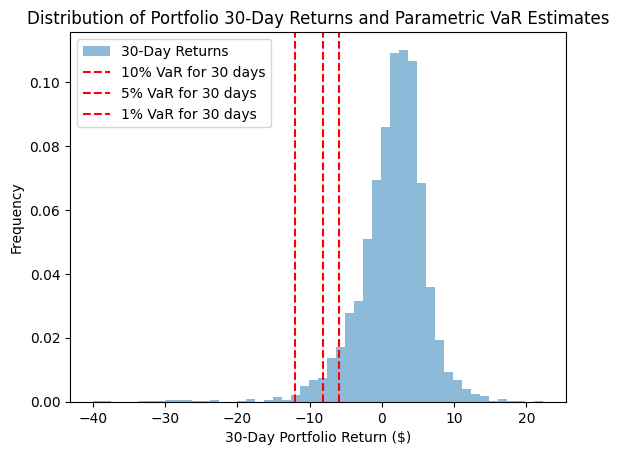

In [ ]:
# Plot the histogram
plt.hist(hist_Nday_ret_dollars, bins=50, density=True, alpha=0.5, label=f'{days}-Day Returns')
for i, VaR in zip(threshold_levels, Var_dict['Param']):
    plt.axvline(x=VaR, linestyle='--', color='r', label=f'{int(i * 100)}% VaR for {days} days')

plt.xlabel(f'{days}-Day Portfolio Return ($)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio {days}-Day Returns and Parametric VaR Estimates')
plt.legend()
plt.show()

**Historical**

In [ ]:
for i in threshold_levels:
    Var=np.nanpercentile(hist_Nday_ret_dollars,i*100)
    Var_dict['Hist'].append(Var)

**Monte Carlo**

In [ ]:
np.random.seed(100)
numsims=10000
simulated_values=np.zeros(numsims)
for i in range(numsims):
    z=np.random.normal(0,1)
    Var=(hist_mean*days-abs(z)*hist_sd*np.sqrt(days))*portfolio_value
    simulated_values[i]=Var
for i in threshold_levels:
    Var=np.nanpercentile(simulated_values,i*100)
    Var_dict['Monte'].append(Var)

In [ ]:
pd.DataFrame(Var_dict, index=threshold_levels)

Param       Hist      Monte
0.10  -5.988154  -4.139027  -8.146462
0.05  -8.093685  -6.651275  -9.968851
0.01 -12.043311 -12.412396 -13.760969

## Part Two - Sentiment and Language Analysis

6) Repeat Question 1 of Homework 6 for all the companies in the Dow30 ticker list. For each day and ticker calculate the average Compound score of all its headlines.

In [ ]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import requests
import lxml
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import datetime
import matplotlib.pyplot as plt

import nltk
import string
from nltk.corpus import cmudict
nltk.download('cmudict')

from datetime import date
import yfinance as yf
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Unzipping corpora/cmudict.zip.


In [ ]:
print(tickers)

['AAPL', 'MSFT', 'UNH', 'V', 'JNJ', 'WMT', 'JPM', 'PG', 'HD', 'CVX', 'KO', 'DIS', 'CSCO', 'VZ', 'NKE', 'MRK', 'INTC', 'CRM', 'MCD', 'AXP', 'AMGN', 'HON', 'CAT', 'IBM', 'GS', 'BA', 'MMM', 'TRV', 'WBA']


In [ ]:
headers = {
    'User-Agent'      : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36',
}

In [ ]:
#AAPL
import nltk
nltk.download('vader_lexicon')
vader=SentimentIntensityAnalyzer()
tickers=['AAPL']
baseurl='https://finviz.com/quote.ashx?t=AAPL&ty=c&ta=1&p=d'
parsed_data={
    "Ticker": [],
    "Title": [],
    "Date": [],
    "Time": [],
    "Compound": []
}

for ticker in tickers:
    fullURL=baseurl+ticker
    page=requests.get(fullURL, headers=headers)
    souptext=BeautifulSoup(page.text,'lxml')
    newstable=souptext.find('table', id='news-table')
    for row in newstable.find_all('tr'):
        try:
            title=row.a.text
            tdtext=row.td.text.split()
            if len(tdtext)==1:
                time=tdtext[0].strip()
            else:
                newsdate=tdtext[0].strip()
                time=tdtext[1].strip()
            parsed_data['Ticker'].append(ticker)
            parsed_data['Title'].append(title)
            parsed_data['Date'].append(newsdate)
            parsed_data['Time'].append(time)
            parsed_data['Compound'].append(vader.polarity_scores(title)['compound'])
        except:
            next
AAPL_df=pd.DataFrame(parsed_data)
AAPL_df['Date'].replace(to_replace='Today', value=str(datetime.date.today()), inplace=True)
AAPL_df['pd_date'] = pd.to_datetime(AAPL_df['Date'], errors='coerce', format='%Y-%m-%d')
AAPL_df['pd_date'].fillna(pd.to_datetime(AAPL_df['Date'], format='%b-%d-%y', errors='coerce'), inplace=True)
AAPL_df

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
<ipython-input-47-e57da2157726>:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  AAPL_df['Date'].replace(to_replace='Today', value=str(datetime.date.today()), inplace=True)
<ipython-input-47-e57da2157726>:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are 

Ticker                                              Title        Date  \
0    AAPL  Broadcom stock soars as company touts 'massive...  2024-12-13   
1    AAPL  Uber, Apple, homebuilder stocks: Trending Tickers  2024-12-13   
2    AAPL  Magnificent Seven Stocks: Nvidia Stock Rallies...  2024-12-13   
3    AAPL  Broadcom Soars Most Since 2020 to Top $1 Trill...  2024-12-13   
4    AAPL  Apple and Alphabet see new highs, broader mark...  2024-12-13   
..    ...                                                ...         ...   
95   AAPL  Watch These Apple Price Levels After Stock Set...   Dec-10-24   
96   AAPL  Apple Inc. (AAPL) is Attracting Investor Atten...   Dec-10-24   
97   AAPL  Apple Music Expands Live Global Radio Offering...   Dec-10-24   
98   AAPL     5 Things to Know Before the Stock Market Opens   Dec-10-24   
99   AAPL  How to play the Mag 7 stocks in 2025: Portfoli...   Dec-10-24   

       Time  Compound    pd_date  
0   10:28AM    0.4019 2024-12-13  
1   10:28AM    0.0000 2024-12-13  
2   10:10AM    0.3506 2024-12-13  
3   09:43AM    0.2023 2024-12-13  
4   09:38AM   -0.3612 2024-12-13  
..      ...       ...        ...  
95  09:48AM    0.0000 2024-12-10  
96  09:00AM    0.4767 2024-12-10  
97  09:00AM    0.1027 2024-12-10  
98  07:46AM    0.0000 2024-12-10  
99  07:00AM    0.3400 2024-12-10  

[100 rows x 6 columns]

In [ ]:
#MSFT
vader=SentimentIntensityAnalyzer()
tickers=['MSFT']
baseurl='https://finviz.com/quote.ashx?t=MSFT&ty=c&ta=1&p=d'
parsed_data={
    "Ticker": [],
    "Title": [],
    "Date": [],
    "Time": [],
    "Compound": []
}

for ticker in tickers:
    fullURL=baseurl+ticker
    page=requests.get(fullURL, headers=headers)
    souptext=BeautifulSoup(page.text,'lxml')
    newstable=souptext.find('table', id='news-table')
    for row in newstable.find_all('tr'):
        try:
            title=row.a.text
            tdtext=row.td.text.split()
            if len(tdtext)==1:
                time=tdtext[0].strip()
            else:
                newsdate=tdtext[0].strip()
                time=tdtext[1].strip()
            parsed_data['Ticker'].append(ticker)
            parsed_data['Title'].append(title)
            parsed_data['Date'].append(newsdate)
            parsed_data['Time'].append(time)
            parsed_data['Compound'].append(vader.polarity_scores(title)['compound'])
        except:
            next
MSFT_df=pd.DataFrame(parsed_data)
MSFT_df['Date'].replace(to_replace='Today', value=str(datetime.date.today()), inplace=True)
MSFT_df['pd_date'] = pd.to_datetime(MSFT_df['Date'], errors='coerce', format='%Y-%m-%d')
MSFT_df['pd_date'].fillna(pd.to_datetime(MSFT_df['Date'], format='%b-%d-%y', errors='coerce'), inplace=True)
MSFT_df

<ipython-input-48-84f17f6c4d66>:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  MSFT_df['Date'].replace(to_replace='Today', value=str(datetime.date.today()), inplace=True)
<ipython-input-48-84f17f6c4d66>:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'd

Ticker                                              Title        Date  \
0    MSFT  Broadcom stock soars as company touts 'massive...  2024-12-13   
1    MSFT  AI Nerve Center  And 400% Growth  Fuel This Go...  2024-12-13   
2    MSFT  Magnificent Seven Stocks: Nvidia Stock Rallies...  2024-12-13   
3    MSFT  Apple and Alphabet see new highs, broader mark...  2024-12-13   
4    MSFT  Varonis price target lowered to $47 from $50 a...  2024-12-13   
..    ...                                                ...         ...   
95   MSFT  Microsofts (MSFT) AI Chip Deal: Strategic Move...   Dec-09-24   
96   MSFT  C3.ai lifts annual forecast on strong demand f...   Dec-09-24   
97   MSFT  Microsoft's OpenAI Introduces Sora, a Cutting-...   Dec-09-24   
98   MSFT  ChatGPT: Everything you need to know about the...   Dec-09-24   
99   MSFT  Mag 7 'not critical' for market success in 202...   Dec-09-24   

       Time  Compound    pd_date  
0   10:28AM    0.4019 2024-12-13  
1   10:24AM    0.5106 2024-12-13  
2   10:10AM    0.3506 2024-12-13  
3   09:38AM   -0.3612 2024-12-13  
4   08:35AM   -0.1280 2024-12-13  
..      ...       ...        ...  
95  04:37PM    0.0000 2024-12-09  
96  04:31PM    0.4215 2024-12-09  
97  03:38PM    0.0000 2024-12-09  
98  02:30PM    0.0000 2024-12-09  
99  02:00PM    0.6870 2024-12-09  

[100 rows x 6 columns]

In [ ]:
#UNH
vader=SentimentIntensityAnalyzer()
tickers=['UNH']
baseurl='https://finviz.com/quote.ashx?t=UNH&ty=c&ta=1&p=d'
parsed_data={
    "Ticker": [],
    "Title": [],
    "Date": [],
    "Time": [],
    "Compound": []
}

for ticker in tickers:
    fullURL=baseurl+ticker
    page=requests.get(fullURL, headers=headers)
    souptext=BeautifulSoup(page.text,'lxml')
    newstable=souptext.find('table', id='news-table')
    for row in newstable.find_all('tr'):
        try:
            title=row.a.text
            tdtext=row.td.text.split()
            if len(tdtext)==1:
                time=tdtext[0].strip()
            else:
                newsdate=tdtext[0].strip()
                time=tdtext[1].strip()
            parsed_data['Ticker'].append(ticker)
            parsed_data['Title'].append(title)
            parsed_data['Date'].append(newsdate)
            parsed_data['Time'].append(time)
            parsed_data['Compound'].append(vader.polarity_scores(title)['compound'])
        except:
            next
UNH_df=pd.DataFrame(parsed_data)
UNH_df['Date'].replace(to_replace='Today', value=str(datetime.date.today()), inplace=True)
UNH_df['pd_date'] = pd.to_datetime(UNH_df['Date'], errors='coerce', format='%Y-%m-%d')
UNH_df['pd_date'].fillna(pd.to_datetime(UNH_df['Date'], format='%b-%d-%y', errors='coerce'), inplace=True)
UNH_df

<ipython-input-49-10453e1f186d>:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  UNH_df['Date'].replace(to_replace='Today', value=str(datetime.date.today()), inplace=True)
<ipython-input-49-10453e1f186d>:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df

Ticker                                              Title        Date  \
0     UNH  Why UnitedHealth Group (UNH) Is the Best Long-...  2024-12-13   
1     UNH  After a CEO was gunned down, will health insur...  2024-12-13   
2     UNH  UnitedHealth CEO Talks About Brian Thompson De...  2024-12-13   
3     UNH  UnitedHealth says suspect in executive murder ...  2024-12-13   
4     UNH  UnitedHealth Group CEO Andrew Witty says healt...  2024-12-13   
..    ...                                                ...         ...   
95    UNH  UnitedHealthcare Shooting: The Latest Developm...   Dec-06-24   
96    UNH  UnitedHealth Shooting Suspect Evades Manhunt D...   Dec-06-24   
97    UNH  Stocks Have Defied a Turbulent Week. Fed, Trum...   Dec-06-24   
98    UNH  UnitedHealth price target raised to $675 from ...   Dec-06-24   
99    UNH  Police scour New York for suspect, two days af...   Dec-06-24   

       Time  Compound    pd_date  
0   09:07AM    0.6369 2024-12-13  
1   08:04AM    0.0000 2024-12-13  
2   07:30AM   -0.5994 2024-12-13  
3   05:30AM   -0.7845 2024-12-13  
4   05:30AM    0.0000 2024-12-13  
..      ...       ...        ...  
95  10:16AM    0.0000 2024-12-06  
96  09:05AM   -0.2960 2024-12-06  
97  07:22AM    0.2263 2024-12-06  
98  06:45AM    0.0000 2024-12-06  
99  05:04AM   -0.2960 2024-12-06  

[100 rows x 6 columns]

In [ ]:
#V
vader=SentimentIntensityAnalyzer()
tickers=['V']
baseurl='https://finviz.com/quote.ashx?t=V&ty=c&ta=1&p=d'
parsed_data={
    "Ticker": [],
    "Title": [],
    "Date": [],
    "Time": [],
    "Compound": []
}

for ticker in tickers:
    fullURL=baseurl+ticker
    page=requests.get(fullURL, headers=headers)
    souptext=BeautifulSoup(page.text,'lxml')
    newstable=souptext.find('table', id='news-table')
    for row in newstable.find_all('tr'):
        try:
            title=row.a.text
            tdtext=row.td.text.split()
            if len(tdtext)==1:
                time=tdtext[0].strip()
            else:
                newsdate=tdtext[0].strip()
                time=tdtext[1].strip()
            parsed_data['Ticker'].append(ticker)
            parsed_data['Title'].append(title)
            parsed_data['Date'].append(newsdate)
            parsed_data['Time'].append(time)
            parsed_data['Compound'].append(vader.polarity_scores(title)['compound'])
        except:
            next
V_df=pd.DataFrame(parsed_data)
V_df['Date'].replace(to_replace='Today', value=str(datetime.date.today()), inplace=True)
V_df['pd_date'] = pd.to_datetime(V_df['Date'], errors='coerce', format='%Y-%m-%d')
V_df['pd_date'].fillna(pd.to_datetime(V_df['Date'], format='%b-%d-%y', errors='coerce'), inplace=True)
V_df

<ipython-input-50-556e625778a4>:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  V_df['Date'].replace(to_replace='Today', value=str(datetime.date.today()), inplace=True)
<ipython-input-50-556e625778a4>:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[c

Ticker                                              Title        Date  \
0       V  Better Warren Buffett Stock: Visa vs. American...  2024-12-13   
1       V  Visa Direct to Make Funds Available in U.S. Ca...   Dec-12-24   
2       V  Visa price target raised to $375 from $339 at ...   Dec-12-24   
3       V  Visa (V) Gains But Lags Market: What You Shoul...   Dec-11-24   
4       V  Visa Inc. Sued for Securities Law Violations  ...   Dec-11-24   
..    ...                                                ...         ...   
95      V  Here's What Key Metrics Tell Us About Visa (V)...   Oct-29-24   
96      V  Coinbase to Integrate Visa Direct to Deliver R...   Oct-29-24   
97      V    Visa (V) Q4 Earnings and Revenues Top Estimates   Oct-29-24   
98      V  Visa Plans to Lay Off Around 1,400 Employees a...   Oct-29-24   
99      V         Visa earnings top estimates, revenue jumps   Oct-29-24   

       Time  Compound    pd_date  
0   09:00AM    0.4404 2024-12-13  
1   08:00AM    0.0000 2024-12-12  
2   07:16AM    0.0000 2024-12-12  
3   05:45PM   -0.3716 2024-12-11  
4   12:48PM   -0.2960 2024-12-11  
..      ...       ...        ...  
95  07:30PM    0.0000 2024-10-29  
96  06:30PM    0.0000 2024-10-29  
97  05:20PM    0.2023 2024-10-29  
98  04:40PM    0.0000 2024-10-29  
99  04:39PM    0.2023 2024-10-29  

[100 rows x 6 columns]

In [ ]:
#JNJ
vader=SentimentIntensityAnalyzer()
tickers=['JNJ']
baseurl='https://finviz.com/quote.ashx?t=JNJ&ty=c&ta=1&p=d'
parsed_data={
    "Ticker": [],
    "Title": [],
    "Date": [],
    "Time": [],
    "Compound": []
}

for ticker in tickers:
    fullURL=baseurl+ticker
    page=requests.get(fullURL, headers=headers)
    souptext=BeautifulSoup(page.text,'lxml')
    newstable=souptext.find('table', id='news-table')
    for row in newstable.find_all('tr'):
        try:
            title=row.a.text
            tdtext=row.td.text.split()
            if len(tdtext)==1:
                time=tdtext[0].strip()
            else:
                newsdate=tdtext[0].strip()
                time=tdtext[1].strip()
            parsed_data['Ticker'].append(ticker)
            parsed_data['Title'].append(title)
            parsed_data['Date'].append(newsdate)
            parsed_data['Time'].append(time)
            parsed_data['Compound'].append(vader.polarity_scores(title)['compound'])
        except:
            next
JNJ_df=pd.DataFrame(parsed_data)
JNJ_df['Date'].replace(to_replace='Today', value=str(datetime.date.today()), inplace=True)
JNJ_df['pd_date'] = pd.to_datetime(JNJ_df['Date'], errors='coerce', format='%Y-%m-%d')
JNJ_df['pd_date'].fillna(pd.to_datetime(JNJ_df['Date'], format='%b-%d-%y', errors='coerce'), inplace=True)
JNJ_df

<ipython-input-51-174b9d43650d>:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  JNJ_df['Date'].replace(to_replace='Today', value=str(datetime.date.today()), inplace=True)
<ipython-input-51-174b9d43650d>:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df

Ticker                                              Title        Date  \
0     JNJ  Johnson & Johnson (JNJ) Is a Trending Stock: F...  2024-12-13   
1     JNJ  FDA grants PMA approval to J&J MedTechs heart ...  2024-12-13   
2     JNJ  Johnson and Johnson to Participate in the 43rd...   Dec-12-24   
3     JNJ  Johnson & Johnson to Participate in the 43rd A...   Dec-12-24   
4     JNJ  These Are the 5 Worst-Performing Stocks in the...   Dec-12-24   
..    ...                                                ...         ...   
95    JNJ  Johnson & Johnson MedTech concludes enrolment ...   Nov-01-24   
96    JNJ                J&J Medtech CIO Larry Jones resigns   Nov-01-24   
97    JNJ  Psoriasis biosimilars and pricing changes hera...   Oct-31-24   
98    JNJ  J&J and Lilly both unveil IL-23 inhibitor effi...   Oct-29-24   
99    JNJ  J&J and Lilly both boast IL-23 inhibitor effic...   Oct-29-24   

       Time  Compound    pd_date  
0   09:00AM    0.0000 2024-12-13  
1   06:34AM    0.6124 2024-12-13  
2   04:30PM    0.0000 2024-12-12  
3   04:30PM    0.0000 2024-12-12  
4   02:23PM    0.0000 2024-12-12  
..      ...       ...        ...  
95  08:35AM    0.0000 2024-11-01  
96  07:47AM   -0.3182 2024-11-01  
97  04:00AM   -0.3400 2024-10-31  
98  09:19AM   -0.0772 2024-10-29  
99  09:19AM   -0.0772 2024-10-29  

[100 rows x 6 columns]

In [ ]:
#WMT
vader=SentimentIntensityAnalyzer()
tickers=['WMT']
baseurl='https://finviz.com/quote.ashx?t=WMT&ty=c&ta=1&p=d'
parsed_data={
    "Ticker": [],
    "Title": [],
    "Date": [],
    "Time": [],
    "Compound": []
}

for ticker in tickers:
    fullURL=baseurl+ticker
    page=requests.get(fullURL, headers=headers)
    souptext=BeautifulSoup(page.text,'lxml')
    newstable=souptext.find('table', id='news-table')
    for row in newstable.find_all('tr'):
        try:
            title=row.a.text
            tdtext=row.td.text.split()
            if len(tdtext)==1:
                time=tdtext[0].strip()
            else:
                newsdate=tdtext[0].strip()
                time=tdtext[1].strip()
            parsed_data['Ticker'].append(ticker)
            parsed_data['Title'].append(title)
            parsed_data['Date'].append(newsdate)
            parsed_data['Time'].append(time)
            parsed_data['Compound'].append(vader.polarity_scores(title)['compound'])
        except:
            next
WMT_df=pd.DataFrame(parsed_data)
WMT_df['Date'].replace(to_replace='Today', value=str(datetime.date.today()), inplace=True)
WMT_df['pd_date'] = pd.to_datetime(WMT_df['Date'], errors='coerce', format='%Y-%m-%d')
WMT_df['pd_date'].fillna(pd.to_datetime(WMT_df['Date'], format='%b-%d-%y', errors='coerce'), inplace=True)
WMT_df

<ipython-input-52-9311a773a9aa>:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  WMT_df['Date'].replace(to_replace='Today', value=str(datetime.date.today()), inplace=True)
<ipython-input-52-9311a773a9aa>:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df

Ticker                                              Title        Date  \
0     WMT  Costco Earnings Surge As Growth Sharply Accele...  2024-12-13   
1     WMT  Dollar Stores Are Flashing a Warning Sign Abou...  2024-12-13   
2     WMT  Costco Earnings Rise in First Quarter Followin...   Dec-12-24   
3     WMT  Costco posts another quarter of sales growth a...   Dec-12-24   
4     WMT  Costco Earnings Beat As Growth Sharply Acceler...   Dec-12-24   
..    ...                                                ...         ...   
95    WMT  What Is A Tariff; Who Pays Tariffs, And What I...   Dec-03-24   
96    WMT  Walmart, Dicks, and These 2 Other Stocks Are B...   Dec-03-24   
97    WMT  November earnings update: Workday, Intuit, Dis...   Dec-03-24   
98    WMT  The race is on to make AI agents do your onlin...   Dec-02-24   
99    WMT  Amazon, Walmart, and Target's top 10 Cyber Mon...   Dec-02-24   

       Time  Compound    pd_date  
0   08:32AM    0.3818 2024-12-13  
1   05:30AM   -0.3400 2024-12-13  
2   06:15PM    0.3182 2024-12-12  
3   06:09PM    0.1027 2024-12-12  
4   05:35PM    0.3818 2024-12-12  
..      ...       ...        ...  
95  08:59AM   -0.5574 2024-12-03  
96  08:04AM    0.4767 2024-12-03  
97  05:00AM    0.0000 2024-12-03  
98  07:54PM    0.0000 2024-12-02  
99  05:40PM    0.3612 2024-12-02  

[100 rows x 6 columns]

In [ ]:
#JPM
vader=SentimentIntensityAnalyzer()
tickers=['JPM']
baseurl='https://finviz.com/quote.ashx?t=JPM&ty=c&ta=1&p=d'
parsed_data={
    "Ticker": [],
    "Title": [],
    "Date": [],
    "Time": [],
    "Compound": []
}

for ticker in tickers:
    fullURL=baseurl+ticker
    page=requests.get(fullURL, headers=headers)
    souptext=BeautifulSoup(page.text,'lxml')
    newstable=souptext.find('table', id='news-table')
    for row in newstable.find_all('tr'):
        try:
            title=row.a.text
            tdtext=row.td.text.split()
            if len(tdtext)==1:
                time=tdtext[0].strip()
            else:
                newsdate=tdtext[0].strip()
                time=tdtext[1].strip()
            parsed_data['Ticker'].append(ticker)
            parsed_data['Title'].append(title)
            parsed_data['Date'].append(newsdate)
            parsed_data['Time'].append(time)
            parsed_data['Compound'].append(vader.polarity_scores(title)['compound'])
        except:
            next
JPM_df=pd.DataFrame(parsed_data)
JPM_df['Date'].replace(to_replace='Today', value=str(datetime.date.today()), inplace=True)
JPM_df['pd_date'] = pd.to_datetime(JPM_df['Date'], errors='coerce', format='%Y-%m-%d')
JPM_df['pd_date'].fillna(pd.to_datetime(JPM_df['Date'], format='%b-%d-%y', errors='coerce'), inplace=True)
JPM_df

<ipython-input-53-a391bf99e0b5>:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  JPM_df['Date'].replace(to_replace='Today', value=str(datetime.date.today()), inplace=True)
<ipython-input-53-a391bf99e0b5>:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df

Ticker                                              Title        Date  \
0     JPM  Tech Start-Up Databricks Seeks $2.5 Billion Pr...  2024-12-13   
1     JPM  Investors Heavily Search JPMorgan Chase & Co. ...  2024-12-13   
2     JPM                JPMorgan Chase: Buy, Sell, or Hold?  2024-12-13   
3     JPM  Cantor Fitzgerald Pays SEC $6.75 Million for A...   Dec-12-24   
4     JPM  US banking giant JPMorgan elects Hershey CEO M...   Dec-12-24   
..    ...                                                ...         ...   
95    JPM  US probes JPMorgan's links with Iranian oil tr...   Nov-22-24   
96    JPM  Mastercard, JPMorgan collaborate on cross-bord...   Nov-22-24   
97    JPM  US Probes JPMorgans Ties to Iranian Oil Kingpi...   Nov-22-24   
98    JPM  Mastercard and JPMorgan Link Up to Bring Cross...   Nov-21-24   
99    JPM  JPMorgan Chase Financial Company LLC Declares ...   Nov-20-24   

       Time  Compound    pd_date  
0   09:05AM   -0.3612 2024-12-13  
1   09:00AM    0.0000 2024-12-13  
2   06:00AM    0.0000 2024-12-13  
3   07:59PM   -0.5574 2024-12-12  
4   04:58PM    0.0000 2024-12-12  
..      ...       ...        ...  
95  06:59AM    0.0000 2024-11-22  
96  06:57AM    0.0000 2024-11-22  
97  06:02AM    0.0000 2024-11-22  
98  09:00AM    0.0000 2024-11-21  
99  04:15PM    0.0000 2024-11-20  

[100 rows x 6 columns]

In [ ]:
#PG
vader=SentimentIntensityAnalyzer()
tickers=['PG']
baseurl='https://finviz.com/quote.ashx?t=PG&ty=c&ta=1&p=d'
parsed_data={
    "Ticker": [],
    "Title": [],
    "Date": [],
    "Time": [],
    "Compound": []
}

for ticker in tickers:
    fullURL=baseurl+ticker
    page=requests.get(fullURL, headers=headers)
    souptext=BeautifulSoup(page.text,'lxml')
    newstable=souptext.find('table', id='news-table')
    for row in newstable.find_all('tr'):
        try:
            title=row.a.text
            tdtext=row.td.text.split()
            if len(tdtext)==1:
                time=tdtext[0].strip()
            else:
                newsdate=tdtext[0].strip()
                time=tdtext[1].strip()
            parsed_data['Ticker'].append(ticker)
            parsed_data['Title'].append(title)
            parsed_data['Date'].append(newsdate)
            parsed_data['Time'].append(time)
            parsed_data['Compound'].append(vader.polarity_scores(title)['compound'])
        except:
            next
PG_df=pd.DataFrame(parsed_data)
PG_df['Date'].replace(to_replace='Today', value=str(datetime.date.today()), inplace=True)
PG_df['pd_date'] = pd.to_datetime(PG_df['Date'], errors='coerce', format='%Y-%m-%d')
PG_df['pd_date'].fillna(pd.to_datetime(PG_df['Date'], format='%b-%d-%y', errors='coerce'), inplace=True)
PG_df

<ipython-input-54-114f1a4ba8e5>:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  PG_df['Date'].replace(to_replace='Today', value=str(datetime.date.today()), inplace=True)
<ipython-input-54-114f1a4ba8e5>:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[

Ticker                                              Title       Date  \
0      PG  Why Procter & Gamble (PG) Is Among the Best Lo...  Dec-12-24   
1      PG  Procter & Gamble (PG) Ascends While Market Fal...  Dec-10-24   
2      PG  Investors Heavily Search Procter & Gamble Comp...  Dec-10-24   
3      PG  Earnings Growth & Price Strength Make Procter ...  Dec-09-24   
4      PG  Apple Tops the List of Best-Managed Companies ...  Dec-08-24   
..    ...                                                ...        ...   
95     PG  Unlocking Q1 Potential of P&G (PG): Exploring ...  Oct-15-24   
96     PG  Procter & Gamble (PG) Exceeds Market Returns: ...  Oct-14-24   
97     PG  Procter & Gamble Company (The) (PG) Is a Trend...  Oct-14-24   
98     PG            What To Expect in the Markets This Week  Oct-13-24   
99     PG  3 Magnificent Dividend Stocks That I'm "Never"...  Oct-12-24   

       Time  Compound    pd_date  
0   03:10PM    0.6369 2024-12-12  
1   05:50PM    0.0000 2024-12-10  
2   09:00AM    0.0000 2024-12-10  
3   09:30AM    0.7003 2024-12-09  
4   09:14PM    0.5106 2024-12-08  
..      ...       ...        ...  
95  09:15AM    0.0000 2024-10-15  
96  06:00PM    0.0000 2024-10-14  
97  09:00AM    0.0000 2024-10-14  
98  06:00AM    0.0000 2024-10-13  
99  11:10AM    0.5994 2024-10-12  

[100 rows x 6 columns]

In [ ]:
#HD
vader=SentimentIntensityAnalyzer()
tickers=['HD']
baseurl='https://finviz.com/quote.ashx?t=HD&ty=c&ta=1&p=d'
parsed_data={
    "Ticker": [],
    "Title": [],
    "Date": [],
    "Time": [],
    "Compound": []
}

for ticker in tickers:
    fullURL=baseurl+ticker
    page=requests.get(fullURL, headers=headers)
    souptext=BeautifulSoup(page.text,'lxml')
    newstable=souptext.find('table', id='news-table')
    for row in newstable.find_all('tr'):
        try:
            title=row.a.text
            tdtext=row.td.text.split()
            if len(tdtext)==1:
                time=tdtext[0].strip()
            else:
                newsdate=tdtext[0].strip()
                time=tdtext[1].strip()
            parsed_data['Ticker'].append(ticker)
            parsed_data['Title'].append(title)
            parsed_data['Date'].append(newsdate)
            parsed_data['Time'].append(time)
            parsed_data['Compound'].append(vader.polarity_scores(title)['compound'])
        except:
            next
HD_df=pd.DataFrame(parsed_data)
HD_df['Date'].replace(to_replace='Today', value=str(datetime.date.today()), inplace=True)
HD_df['pd_date'] = pd.to_datetime(HD_df['Date'], errors='coerce', format='%Y-%m-%d')
HD_df['pd_date'].fillna(pd.to_datetime(HD_df['Date'], format='%b-%d-%y', errors='coerce'), inplace=True)
HD_df

<ipython-input-55-9dcac256ea9b>:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  HD_df['Date'].replace(to_replace='Today', value=str(datetime.date.today()), inplace=True)
<ipython-input-55-9dcac256ea9b>:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[

Ticker                                              Title        Date  \
0      HD  The Home Depot, Inc. (HD) Is a Trending Stock:...  2024-12-13   
1      HD  2 Dow Jones Stocks to Buy Before a Potential H...  2024-12-13   
2      HD  Why Is Home Depot (HD) Up 2.7% Since Last Earn...   Dec-12-24   
3      HD  Lowe's Says 2025 Sales Growth Likely as it Lay...   Dec-11-24   
4      HD  Is The Home Depot, Inc. (HD) the Best American...   Dec-10-24   
..    ...                                                ...         ...   
95     HD  Home Depot Earnings Due As Inflation And Econo...   Nov-11-24   
96     HD  Home Depot will see green shoots in 2025 under...   Nov-11-24   
97     HD  October CPI, bitcoin jump, Home Depot and Disn...   Nov-11-24   
98     HD  How To Earn $500 A Month From Home Depot Stock...   Nov-11-24   
99     HD  The Home Depot Foundation invests $10 million ...   Nov-11-24   

       Time  Compound    pd_date  
0   09:00AM    0.0000 2024-12-13  
1   06:44AM    0.0000 2024-12-13  
2   11:30AM    0.0000 2024-12-12  
3   12:52PM    0.3818 2024-12-11  
4   11:42PM    0.6369 2024-12-10  
..      ...       ...        ...  
95  04:18PM    0.0000 2024-11-11  
96  11:13AM    0.0000 2024-11-11  
97  09:10AM    0.0000 2024-11-11  
98  08:24AM    0.0000 2024-11-11  
99  08:00AM    0.1280 2024-11-11  

[100 rows x 6 columns]

In [ ]:
#CVX
vader=SentimentIntensityAnalyzer()
tickers=['CVX']
baseurl='https://finviz.com/quote.ashx?t=CVX&ty=c&ta=1&p=d'
parsed_data={
    "Ticker": [],
    "Title": [],
    "Date": [],
    "Time": [],
    "Compound": []
}

for ticker in tickers:
    fullURL=baseurl+ticker
    page=requests.get(fullURL, headers=headers)
    souptext=BeautifulSoup(page.text,'lxml')
    newstable=souptext.find('table', id='news-table')
    for row in newstable.find_all('tr'):
        try:
            title=row.a.text
            tdtext=row.td.text.split()
            if len(tdtext)==1:
                time=tdtext[0].strip()
            else:
                newsdate=tdtext[0].strip()
                time=tdtext[1].strip()
            parsed_data['Ticker'].append(ticker)
            parsed_data['Title'].append(title)
            parsed_data['Date'].append(newsdate)
            parsed_data['Time'].append(time)
            parsed_data['Compound'].append(vader.polarity_scores(title)['compound'])
        except:
            next
CVX_df=pd.DataFrame(parsed_data)
CVX_df['Date'].replace(to_replace='Today', value=str(datetime.date.today()), inplace=True)
CVX_df['pd_date'] = pd.to_datetime(CVX_df['Date'], errors='coerce', format='%Y-%m-%d')
CVX_df['pd_date'].fillna(pd.to_datetime(CVX_df['Date'], format='%b-%d-%y', errors='coerce'), inplace=True)
CVX_df

<ipython-input-56-e936f340c1c8>:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  CVX_df['Date'].replace(to_replace='Today', value=str(datetime.date.today()), inplace=True)
<ipython-input-56-e936f340c1c8>:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df

Ticker                                              Title       Date  \
0     CVX  Big Oil eyes powering Big Tech's data center d...  Dec-11-24   
1     CVX  Blinken Wont Rule Out Pulling Chevrons Venezue...  Dec-11-24   
2     CVX  Exxon wants to extract its value from Hess Guy...  Dec-11-24   
3     CVX  Exxon Raises Capital Spending as Worldwide Oil...  Dec-11-24   
4     CVX  Investors Heavily Search Chevron Corporation (...  Dec-11-24   
..    ...                                                ...        ...   
95    CVX                 Q3 2024 Chevron Corp Earnings Call  Nov-02-24   
96    CVX  2 Top Dividend Stocks I Plan to Buy Even More ...  Nov-02-24   
97    CVX  Chevron Corp (CVX) Q3 2024 Earnings Call Highl...  Nov-02-24   
98    CVX  Big Oil Dials Up Output Growth Just as OPEC Mu...  Nov-01-24   
99    CVX        Exxon and Chevron Feel Brunt of Cheaper Oil  Nov-01-24   

       Time  Compound    pd_date  
0   01:47PM   -0.1280 2024-12-11  
1   01:40PM    0.0000 2024-12-11  
2   12:26PM    0.4767 2024-12-11  
3   09:49AM   -0.1531 2024-12-11  
4   09:00AM    0.0000 2024-12-11  
..      ...       ...        ...  
95  07:55AM    0.0000 2024-11-02  
96  07:31AM    0.2023 2024-11-02  
97  03:04AM    0.0000 2024-11-02  
98  06:09PM    0.6486 2024-11-01  
99  05:29PM    0.0000 2024-11-01  

[100 rows x 6 columns]

In [ ]:
#KO
vader=SentimentIntensityAnalyzer()
tickers=['KO']
baseurl='https://finviz.com/quote.ashx?t=KO&ty=c&ta=1&p=d'
parsed_data={
    "Ticker": [],
    "Title": [],
    "Date": [],
    "Time": [],
    "Compound": []
}

for ticker in tickers:
    fullURL=baseurl+ticker
    page=requests.get(fullURL, headers=headers)
    souptext=BeautifulSoup(page.text,'lxml')
    newstable=souptext.find('table', id='news-table')
    for row in newstable.find_all('tr'):
        try:
            title=row.a.text
            tdtext=row.td.text.split()
            if len(tdtext)==1:
                time=tdtext[0].strip()
            else:
                newsdate=tdtext[0].strip()
                time=tdtext[1].strip()
            parsed_data['Ticker'].append(ticker)
            parsed_data['Title'].append(title)
            parsed_data['Date'].append(newsdate)
            parsed_data['Time'].append(time)
            parsed_data['Compound'].append(vader.polarity_scores(title)['compound'])
        except:
            next
KO_df=pd.DataFrame(parsed_data)
KO_df['Date'].replace(to_replace='Today', value=str(datetime.date.today()), inplace=True)
KO_df['pd_date'] = pd.to_datetime(KO_df['Date'], errors='coerce', format='%Y-%m-%d')
KO_df['pd_date'].fillna(pd.to_datetime(KO_df['Date'], format='%b-%d-%y', errors='coerce'), inplace=True)
KO_df

<ipython-input-57-22af0483ae72>:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  KO_df['Date'].replace(to_replace='Today', value=str(datetime.date.today()), inplace=True)
<ipython-input-57-22af0483ae72>:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[

Ticker                                              Title        Date  \
0      KO  Is the Options Market Predicting a Spike in Co...  2024-12-13   
1      KO  Pizza Buffets, Fishing Boats and Bathroom Line...  2024-12-13   
2      KO  Soft drink makers, Celsius Holdings, General M...   Dec-12-24   
3      KO  Is It Worth Investing in Coca-Cola (KO) Based ...   Dec-12-24   
4      KO  Is Trending Stock CocaCola Company (The) (KO) ...   Dec-12-24   
..    ...                                                ...         ...   
95     KO  The Coca-Cola Company Announces Participation ...   Nov-07-24   
96     KO  Molson Coors (TAP) Reports Earnings Tomorrow: ...   Nov-06-24   
97     KO                    5 Top Stocks to Buy in November   Nov-05-24   
98     KO  Coca-Cola Beverages Africa invests $50m in Nam...   Nov-05-24   
99     KO  Warren Buffett Is Selling Apple and Bank of Am...   Nov-05-24   

       Time  Compound    pd_date  
0   08:30AM    0.0000 2024-12-13  
1   07:00AM    0.3612 2024-12-13  
2   11:43AM    0.0000 2024-12-12  
3   09:30AM    0.2263 2024-12-12  
4   09:00AM    0.0000 2024-12-12  
..      ...       ...        ...  
95  10:00AM    0.0000 2024-11-07  
96  02:07AM    0.0000 2024-11-06  
97  09:32AM    0.2023 2024-11-05  
98  07:42AM    0.0000 2024-11-05  
99  07:00AM    0.0000 2024-11-05  

[100 rows x 6 columns]

In [ ]:
#DIS
vader=SentimentIntensityAnalyzer()
tickers=['DIS']
baseurl='https://finviz.com/quote.ashx?t=DIS&ty=c&ta=1&p=d'
parsed_data={
    "Ticker": [],
    "Title": [],
    "Date": [],
    "Time": [],
    "Compound": []
}

for ticker in tickers:
    fullURL=baseurl+ticker
    page=requests.get(fullURL, headers=headers)
    souptext=BeautifulSoup(page.text,'lxml')
    newstable=souptext.find('table', id='news-table')
    for row in newstable.find_all('tr'):
        try:
            title=row.a.text
            tdtext=row.td.text.split()
            if len(tdtext)==1:
                time=tdtext[0].strip()
            else:
                newsdate=tdtext[0].strip()
                time=tdtext[1].strip()
            parsed_data['Ticker'].append(ticker)
            parsed_data['Title'].append(title)
            parsed_data['Date'].append(newsdate)
            parsed_data['Time'].append(time)
            parsed_data['Compound'].append(vader.polarity_scores(title)['compound'])
        except:
            next
DIS_df=pd.DataFrame(parsed_data)
DIS_df['Date'].replace(to_replace='Today', value=str(datetime.date.today()), inplace=True)
DIS_df['pd_date'] = pd.to_datetime(DIS_df['Date'], errors='coerce', format='%Y-%m-%d')
DIS_df['pd_date'].fillna(pd.to_datetime(DIS_df['Date'], format='%b-%d-%y', errors='coerce'), inplace=True)
DIS_df

<ipython-input-58-9a97d773e490>:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  DIS_df['Date'].replace(to_replace='Today', value=str(datetime.date.today()), inplace=True)
<ipython-input-58-9a97d773e490>:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df

Ticker                                              Title        Date  \
0     DIS  Pizza Buffets, Fishing Boats and Bathroom Line...  2024-12-13   
1     DIS  Walt Disney (DIS) Rises As Market Takes a Dip:...   Dec-12-24   
2     DIS  YouTube Raises Price on TV Streaming Service t...   Dec-12-24   
3     DIS  Warner Discovery to Restructure, Setting Up Po...   Dec-12-24   
4     DIS            ChowNow appoints Kanika Soni as new CEO   Dec-12-24   
..    ...                                                ...         ...   
95    DIS  Invest with Confidence: Intrinsic Value Unveil...   Nov-18-24   
96    DIS  Jim Cramer Says The Walt Disney Company (DIS) ...   Nov-18-24   
97    DIS            Analyst Report: The Walt Disney Company   Nov-18-24   
98    DIS  Warner Bros. Discovery Stock Rises on NBA Deal...   Nov-18-24   
99    DIS  'Inside the NBA' Is Sticking Around But It's G...   Nov-18-24   

       Time  Compound    pd_date  
0   07:00AM    0.3612 2024-12-13  
1   05:45PM    0.0000 2024-12-12  
2   03:34PM    0.0000 2024-12-12  
3   11:04AM    0.3818 2024-12-12  
4   05:21AM    0.0000 2024-12-12  
..      ...       ...        ...  
95  09:15PM    0.6908 2024-11-18  
96  06:12PM    0.8779 2024-11-18  
97  04:52PM    0.0000 2024-11-18  
98  12:47PM    0.0000 2024-11-18  
99  11:15AM    0.0000 2024-11-18  

[100 rows x 6 columns]

In [ ]:
#CSCO
vader=SentimentIntensityAnalyzer()
tickers=['CSCO']
baseurl='https://finviz.com/quote.ashx?t=CSCO&ty=c&ta=1&p=d'
parsed_data={
    "Ticker": [],
    "Title": [],
    "Date": [],
    "Time": [],
    "Compound": []
}

for ticker in tickers:
    fullURL=baseurl+ticker
    page=requests.get(fullURL, headers=headers)
    souptext=BeautifulSoup(page.text,'lxml')
    newstable=souptext.find('table', id='news-table')
    for row in newstable.find_all('tr'):
        try:
            title=row.a.text
            tdtext=row.td.text.split()
            if len(tdtext)==1:
                time=tdtext[0].strip()
            else:
                newsdate=tdtext[0].strip()
                time=tdtext[1].strip()
            parsed_data['Ticker'].append(ticker)
            parsed_data['Title'].append(title)
            parsed_data['Date'].append(newsdate)
            parsed_data['Time'].append(time)
            parsed_data['Compound'].append(vader.polarity_scores(title)['compound'])
        except:
            next
CSCO_df=pd.DataFrame(parsed_data)
CSCO_df['Date'].replace(to_replace='Today', value=str(datetime.date.today()), inplace=True)
CSCO_df['pd_date'] = pd.to_datetime(CSCO_df['Date'], errors='coerce', format='%Y-%m-%d')
CSCO_df['pd_date'].fillna(pd.to_datetime(CSCO_df['Date'], format='%b-%d-%y', errors='coerce'), inplace=True)
CSCO_df

<ipython-input-59-881be327c8aa>:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  CSCO_df['Date'].replace(to_replace='Today', value=str(datetime.date.today()), inplace=True)
<ipython-input-59-881be327c8aa>:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'd

Ticker                                              Title        Date  \
0    CSCO  Is Trending Stock Cisco Systems, Inc. (CSCO) a...  2024-12-13   
1    CSCO  Cisco: Preserving Culture Through Technology: ...   Dec-11-24   
2    CSCO  Navigating Market Uncertainty: Intrinsic Value...   Dec-10-24   
3    CSCO  Cisco: Publicly Available Life Cycle Assessmen...   Dec-09-24   
4    CSCO  Billionaire Asness Sold Cisco Systems (CSCO) a...   Dec-07-24   
..    ...                                                ...         ...   
95   CSCO            What To Expect in the Markets This Week   Nov-10-24   
96   CSCO  Disney earnings, CPI, Yahoo Finance Invest: Wh...   Nov-08-24   
97   CSCO  Stock Market: Three Top Names In Buy Zones, On...   Nov-08-24   
98   CSCO  Is Cisco Systems, Inc. (CSCO) The Best Stock U...   Nov-08-24   
99   CSCO  Cava Stock, Shopify, Cisco Systems Rally Bulli...   Nov-08-24   

       Time  Compound    pd_date  
0   09:00AM    0.0000 2024-12-13  
1   09:40AM    0.0000 2024-12-11  
2   06:00AM    0.0000 2024-12-10  
3   09:35AM    0.0000 2024-12-09  
4   04:39PM    0.0000 2024-12-07  
..      ...       ...        ...  
95  07:55AM    0.0000 2024-11-10  
96  05:24PM    0.0000 2024-11-08  
97  05:10PM    0.2023 2024-11-08  
98  02:39PM    0.6369 2024-11-08  
99  10:27AM    0.0000 2024-11-08  

[100 rows x 6 columns]

In [ ]:
#VZ
vader=SentimentIntensityAnalyzer()
tickers=['VZ']
baseurl='https://finviz.com/quote.ashx?t=VZ&ty=c&ta=1&p=d'
parsed_data={
    "Ticker": [],
    "Title": [],
    "Date": [],
    "Time": [],
    "Compound": []
}

for ticker in tickers:
    fullURL=baseurl+ticker
    page=requests.get(fullURL, headers=headers)
    souptext=BeautifulSoup(page.text,'lxml')
    newstable=souptext.find('table', id='news-table')
    for row in newstable.find_all('tr'):
        try:
            title=row.a.text
            tdtext=row.td.text.split()
            if len(tdtext)==1:
                time=tdtext[0].strip()
            else:
                newsdate=tdtext[0].strip()
                time=tdtext[1].strip()
            parsed_data['Ticker'].append(ticker)
            parsed_data['Title'].append(title)
            parsed_data['Date'].append(newsdate)
            parsed_data['Time'].append(time)
            parsed_data['Compound'].append(vader.polarity_scores(title)['compound'])
        except:
            next
VZ_df=pd.DataFrame(parsed_data)
VZ_df['Date'].replace(to_replace='Today', value=str(datetime.date.today()), inplace=True)
VZ_df['pd_date'] = pd.to_datetime(VZ_df['Date'], errors='coerce', format='%Y-%m-%d')
VZ_df['pd_date'].fillna(pd.to_datetime(VZ_df['Date'], format='%b-%d-%y', errors='coerce'), inplace=True)
VZ_df

<ipython-input-60-e418ff6997c3>:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  VZ_df['Date'].replace(to_replace='Today', value=str(datetime.date.today()), inplace=True)
<ipython-input-60-e418ff6997c3>:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[

Ticker                                              Title        Date  \
0      VZ                            Is Verizon Stock a Buy?  2024-12-13   
1      VZ  Why Verizon Communications (VZ) Is Among the B...   Dec-12-24   
2      VZ  Trump Promotes Lower Taxes and Other Pro-Busin...   Dec-12-24   
3      VZ  Q3 Earnings Recap: Charter (NASDAQ:CHTR) Tops ...   Dec-12-24   
4      VZ  Verizon Communications (VZ) Stock Slides as Ma...   Dec-11-24   
..    ...                                                ...         ...   
95     VZ  3 Top Dividend Stocks to Buy for Passive Incom...   Nov-03-24   
96     VZ      Q3 2024 DigitalBridge Group Inc Earnings Call   Nov-02-24   
97     VZ  ISS recommends Frontier shareholders abstain f...   Nov-01-24   
98     VZ  LREs 179MW White Wing Ranch solar project in A...   Nov-01-24   
99     VZ  3 Reasons Relying on Social Security Alone Cou...   Nov-01-24   

       Time  Compound    pd_date  
0   05:43AM    0.0000 2024-12-13  
1   03:06PM    0.6369 2024-12-12  
2   01:19PM    0.0516 2024-12-12  
3   04:12AM    0.5106 2024-12-12  
4   05:45PM    0.0000 2024-12-11  
..      ...       ...        ...  
95  04:10AM    0.3818 2024-11-03  
96  03:37AM    0.0000 2024-11-02  
97  02:33PM    0.2263 2024-11-01  
98  11:15AM    0.0000 2024-11-01  
99  10:15AM   -0.1779 2024-11-01  

[100 rows x 6 columns]

In [ ]:
#NKE
vader=SentimentIntensityAnalyzer()
tickers=['NKE']
baseurl='https://finviz.com/quote.ashx?t=NKE&ty=c&ta=1&p=d'
parsed_data={
    "Ticker": [],
    "Title": [],
    "Date": [],
    "Time": [],
    "Compound": []
}

for ticker in tickers:
    fullURL=baseurl+ticker
    page=requests.get(fullURL, headers=headers)
    souptext=BeautifulSoup(page.text,'lxml')
    newstable=souptext.find('table', id='news-table')
    for row in newstable.find_all('tr'):
        try:
            title=row.a.text
            tdtext=row.td.text.split()
            if len(tdtext)==1:
                time=tdtext[0].strip()
            else:
                newsdate=tdtext[0].strip()
                time=tdtext[1].strip()
            parsed_data['Ticker'].append(ticker)
            parsed_data['Title'].append(title)
            parsed_data['Date'].append(newsdate)
            parsed_data['Time'].append(time)
            parsed_data['Compound'].append(vader.polarity_scores(title)['compound'])
        except:
            next
NKE_df=pd.DataFrame(parsed_data)
NKE_df['Date'].replace(to_replace='Today', value=str(datetime.date.today()), inplace=True)
NKE_df['pd_date'] = pd.to_datetime(NKE_df['Date'], errors='coerce', format='%Y-%m-%d')
NKE_df['pd_date'].fillna(pd.to_datetime(NKE_df['Date'], format='%b-%d-%y', errors='coerce'), inplace=True)
NKE_df

<ipython-input-61-d502037f2a0a>:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  NKE_df['Date'].replace(to_replace='Today', value=str(datetime.date.today()), inplace=True)
<ipython-input-61-d502037f2a0a>:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df

Ticker                                              Title        Date  \
0     NKE  Nike Stock Stuck On Harsh Downtrend Ahead Of E...  2024-12-13   
1     NKE  Nike set to beat earnings, fall short on guida...  2024-12-13   
2     NKE  These Are the 5 Worst-Performing Stocks in the...   Dec-12-24   
3     NKE  Analysts Estimate Nike (NKE) to Report a Decli...   Dec-12-24   
4     NKE  Why NIKE, Inc. (NKE) Is the Best Safe Stock to...   Dec-12-24   
..    ...                                                ...         ...   
95    NKE  October earnings update: Apple, Uber, Starbuck...   Nov-05-24   
96    NKE  Levi's, Nike, Patagonia: 7 big brands that cou...   Nov-05-24   
97    NKE  Nike (NKE) Falls More Steeply Than Broader Mar...   Nov-04-24   
98    NKE  Levi's, Nike, Patagonia: These 7 major brands ...   Nov-04-24   
99    NKE  This election is so divisive, some companies h...   Nov-04-24   

       Time  Compound    pd_date  
0   10:26AM   -0.5994 2024-12-13  
1   08:53AM    0.0000 2024-12-13  
2   02:23PM    0.0000 2024-12-12  
3   10:00AM    0.0000 2024-12-12  
4   07:40AM    0.7964 2024-12-12  
..      ...       ...        ...  
95  07:53AM    0.0000 2024-11-05  
96  05:54AM    0.0000 2024-11-05  
97  05:50PM    0.0000 2024-11-04  
98  04:44PM    0.0000 2024-11-04  
99  04:31PM    0.0000 2024-11-04  

[100 rows x 6 columns]

In [ ]:
#MRK
vader=SentimentIntensityAnalyzer()
tickers=['MRK']
baseurl='https://finviz.com/quote.ashx?t=MRK&ty=c&ta=1&p=d'
parsed_data={
    "Ticker": [],
    "Title": [],
    "Date": [],
    "Time": [],
    "Compound": []
}

for ticker in tickers:
    fullURL=baseurl+ticker
    page=requests.get(fullURL, headers=headers)
    souptext=BeautifulSoup(page.text,'lxml')
    newstable=souptext.find('table', id='news-table')
    for row in newstable.find_all('tr'):
        try:
            title=row.a.text
            tdtext=row.td.text.split()
            if len(tdtext)==1:
                time=tdtext[0].strip()
            else:
                newsdate=tdtext[0].strip()
                time=tdtext[1].strip()
            parsed_data['Ticker'].append(ticker)
            parsed_data['Title'].append(title)
            parsed_data['Date'].append(newsdate)
            parsed_data['Time'].append(time)
            parsed_data['Compound'].append(vader.polarity_scores(title)['compound'])
        except:
            next
MRK_df=pd.DataFrame(parsed_data)
MRK_df['Date'].replace(to_replace='Today', value=str(datetime.date.today()), inplace=True)
MRK_df['pd_date'] = pd.to_datetime(MRK_df['Date'], errors='coerce', format='%Y-%m-%d')
MRK_df['pd_date'].fillna(pd.to_datetime(MRK_df['Date'], format='%b-%d-%y', errors='coerce'), inplace=True)
MRK_df

<ipython-input-62-7055f995261f>:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  MRK_df['Date'].replace(to_replace='Today', value=str(datetime.date.today()), inplace=True)
<ipython-input-62-7055f995261f>:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df

Ticker                                              Title        Date  \
0     MRK  Merck Receives Positive EU CHMP Opinion for WE...  2024-12-13   
1     MRK  How HP, Merck And Virtus Investment Partners C...   Dec-12-24   
2     MRK  AstraZeneca-Merck Partnered Lynparza Shows Lon...   Dec-11-24   
3     MRK  LYNPARZA (olaparib) Demonstrated Clinically Me...   Dec-11-24   
4     MRK  Is Merck & Co., Inc. (MRK) the Best American D...   Dec-10-24   
..    ...                                                ...         ...   
95    MRK  Merck & Co., Inc. (MRK) is Attracting Investor...   Oct-24-24   
96    MRK  Mercks KEYTRUDA (pembrolizumab) Receives 30th ...   Oct-24-24   
97    MRK  CDCS ACIP Recommends Mercks CAPVAXIVE (Pneumoc...   Oct-23-24   
98    MRK  800% Upside For This Biotech Stock - Analyst I...   Oct-23-24   
99    MRK  Is Merck & Co., Inc. (NYSE:MRK) the Most Under...   Oct-23-24   

       Time  Compound    pd_date  
0   07:05AM    0.8316 2024-12-13  
1   03:00PM    0.0000 2024-12-12  
2   02:10PM   -0.8860 2024-12-11  
3   10:22AM   -0.0258 2024-12-11  
4   11:47PM    0.6369 2024-12-10  
..      ...       ...        ...  
95  09:00AM    0.4767 2024-10-24  
96  06:45AM    0.4767 2024-10-24  
97  07:58PM    0.2263 2024-10-23  
98  03:35PM   -0.4215 2024-10-23  
99  10:06AM    0.3976 2024-10-23  

[100 rows x 6 columns]

In [ ]:
#INTC
vader=SentimentIntensityAnalyzer()
tickers=['INTC']
baseurl='https://finviz.com/quote.ashx?t=INTC&ty=c&ta=1&p=d'
parsed_data={
    "Ticker": [],
    "Title": [],
    "Date": [],
    "Time": [],
    "Compound": []
}

for ticker in tickers:
    fullURL=baseurl+ticker
    page=requests.get(fullURL, headers=headers)
    souptext=BeautifulSoup(page.text,'lxml')
    newstable=souptext.find('table', id='news-table')
    for row in newstable.find_all('tr'):
        try:
            title=row.a.text
            tdtext=row.td.text.split()
            if len(tdtext)==1:
                time=tdtext[0].strip()
            else:
                newsdate=tdtext[0].strip()
                time=tdtext[1].strip()
            parsed_data['Ticker'].append(ticker)
            parsed_data['Title'].append(title)
            parsed_data['Date'].append(newsdate)
            parsed_data['Time'].append(time)
            parsed_data['Compound'].append(vader.polarity_scores(title)['compound'])
        except:
            next
INTC_df=pd.DataFrame(parsed_data)
INTC_df['Date'].replace(to_replace='Today', value=str(datetime.date.today()), inplace=True)
INTC_df['pd_date'] = pd.to_datetime(INTC_df['Date'], errors='coerce', format='%Y-%m-%d')
INTC_df['pd_date'].fillna(pd.to_datetime(INTC_df['Date'], format='%b-%d-%y', errors='coerce'), inplace=True)
INTC_df

<ipython-input-63-782a3fc9e1e5>:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  INTC_df['Date'].replace(to_replace='Today', value=str(datetime.date.today()), inplace=True)
<ipython-input-63-782a3fc9e1e5>:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'd

Ticker                                              Title        Date  \
0    INTC  Better Recovery Story Buy for 2025: Super Micr...  2024-12-13   
1    INTC  Intel Says Its an Open Question Whether to Bre...   Dec-12-24   
2    INTC                   Why Intel Stock Is Gaining Today   Dec-12-24   
3    INTC  Jim Cramer Says He Prefers AMD Over Intel (INT...   Dec-12-24   
4    INTC  NVIDIA Crushes Rivals: Secures Unprecedented 9...   Dec-12-24   
..    ...                                                ...         ...   
95   INTC  Pat Gelsinger: Intel CEOs net worth & salary a...   Dec-02-24   
96   INTC  Intel CEO Pat Gelsinger Resigns After Struggli...   Dec-02-24   
97   INTC  Intels outgoing CEO is living every executives...   Dec-02-24   
98   INTC  Intel Stock Wavers On CEO Pat Gelsinger's Depa...   Dec-02-24   
99   INTC  An Intel Break-Up Could Follow Its CEO Shake-U...   Dec-02-24   

       Time  Compound    pd_date  
0   04:15AM    0.7783 2024-12-13  
1   04:15PM    0.0000 2024-12-12  
2   03:55PM    0.4215 2024-12-12  
3   08:58AM    0.0000 2024-12-12  
4   05:22AM   -0.1531 2024-12-12  
..      ...       ...        ...  
95  08:03PM    0.2263 2024-12-02  
96  04:52PM   -0.6249 2024-12-02  
97  04:45PM    0.2023 2024-12-02  
98  04:41PM    0.0000 2024-12-02  
99  04:27PM    0.0000 2024-12-02  

[100 rows x 6 columns]

In [ ]:
#CRM
vader=SentimentIntensityAnalyzer()
tickers=['CRM']
baseurl='https://finviz.com/quote.ashx?t=CRM&ty=c&ta=1&p=d'
parsed_data={
    "Ticker": [],
    "Title": [],
    "Date": [],
    "Time": [],
    "Compound": []
}

for ticker in tickers:
    fullURL=baseurl+ticker
    page=requests.get(fullURL, headers=headers)
    souptext=BeautifulSoup(page.text,'lxml')
    newstable=souptext.find('table', id='news-table')
    for row in newstable.find_all('tr'):
        try:
            title=row.a.text
            tdtext=row.td.text.split()
            if len(tdtext)==1:
                time=tdtext[0].strip()
            else:
                newsdate=tdtext[0].strip()
                time=tdtext[1].strip()
            parsed_data['Ticker'].append(ticker)
            parsed_data['Title'].append(title)
            parsed_data['Date'].append(newsdate)
            parsed_data['Time'].append(time)
            parsed_data['Compound'].append(vader.polarity_scores(title)['compound'])
        except:
            next
CRM_df=pd.DataFrame(parsed_data)
CRM_df['Date'].replace(to_replace='Today', value=str(datetime.date.today()), inplace=True)
CRM_df['pd_date'] = pd.to_datetime(CRM_df['Date'], errors='coerce', format='%Y-%m-%d')
CRM_df['pd_date'].fillna(pd.to_datetime(CRM_df['Date'], format='%b-%d-%y', errors='coerce'), inplace=True)
CRM_df

<ipython-input-64-6f8391e13f99>:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  CRM_df['Date'].replace(to_replace='Today', value=str(datetime.date.today()), inplace=True)
<ipython-input-64-6f8391e13f99>:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df

Ticker                                              Title        Date  \
0     CRM  Salesforces AI Suite Makes for a Convincing St...  2024-12-13   
1     CRM  Why investors should stay away from healthcare...   Dec-12-24   
2     CRM  Get Ready for Long Thinking, AIs Next Leap For...   Dec-11-24   
3     CRM  IT Budget Increases: What Does It Mean for Sal...   Dec-11-24   
4     CRM  Prepare to buy on the dip in 2025: Portfolio m...   Dec-10-24   
..    ...                                                ...         ...   
95    CRM  Salesforce In Spotlight Amid Flurry Of Softwar...   Dec-01-24   
96    CRM            What To Expect in the Markets This Week   Dec-01-24   
97    CRM  Salesforce In Focus Amid Avalanche Of Software...   Nov-30-24   
98    CRM  5 Stocks To Watch in December And What To Watc...   Nov-30-24   
99    CRM  ISM manufacturing, Salesforce earnings, JOLTS:...   Nov-29-24   

       Time  Compound    pd_date  
0   08:10AM    0.1531 2024-12-13  
1   11:27AM    0.0000 2024-12-12  
2   12:00PM    0.3612 2024-12-11  
3   01:39AM    0.0000 2024-12-11  
4   12:15PM    0.0000 2024-12-10  
..      ...       ...        ...  
95  09:15AM    0.0000 2024-12-01  
96  05:00AM    0.0000 2024-12-01  
97  12:20PM    0.0000 2024-11-30  
98  07:00AM    0.0000 2024-11-30  
99  02:30PM    0.0000 2024-11-29  

[100 rows x 6 columns]

In [ ]:
#MCD
vader=SentimentIntensityAnalyzer()
tickers=['MCD']
baseurl='https://finviz.com/quote.ashx?t=MCD&ty=c&ta=1&p=d'
parsed_data={
    "Ticker": [],
    "Title": [],
    "Date": [],
    "Time": [],
    "Compound": []
}

for ticker in tickers:
    fullURL=baseurl+ticker
    page=requests.get(fullURL, headers=headers)
    souptext=BeautifulSoup(page.text,'lxml')
    newstable=souptext.find('table', id='news-table')
    for row in newstable.find_all('tr'):
        try:
            title=row.a.text
            tdtext=row.td.text.split()
            if len(tdtext)==1:
                time=tdtext[0].strip()
            else:
                newsdate=tdtext[0].strip()
                time=tdtext[1].strip()
            parsed_data['Ticker'].append(ticker)
            parsed_data['Title'].append(title)
            parsed_data['Date'].append(newsdate)
            parsed_data['Time'].append(time)
            parsed_data['Compound'].append(vader.polarity_scores(title)['compound'])
        except:
            next
MCD_df=pd.DataFrame(parsed_data)
MCD_df['Date'].replace(to_replace='Today', value=str(datetime.date.today()), inplace=True)
MCD_df['pd_date'] = pd.to_datetime(MCD_df['Date'], errors='coerce', format='%Y-%m-%d')
MCD_df['pd_date'].fillna(pd.to_datetime(MCD_df['Date'], format='%b-%d-%y', errors='coerce'), inplace=True)
MCD_df

<ipython-input-65-6a14bd5b09e8>:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  MCD_df['Date'].replace(to_replace='Today', value=str(datetime.date.today()), inplace=True)
<ipython-input-65-6a14bd5b09e8>:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df

Ticker                                              Title        Date  \
0     MCD  Dollar Stores Are Flashing a Warning Sign Abou...  2024-12-13   
1     MCD  Here's How You Can Earn $100 In Passive Income...   Dec-12-24   
2     MCD  Why Hedge Funds Consider McDonalds Corporation...   Dec-12-24   
3     MCD  I Shared a Bathroom With an Airbnb Host to Avo...   Dec-11-24   
4     MCD  The Freewheeling Small-Town Attorney Represent...   Dec-11-24   
..    ...                                                ...         ...   
95    MCD  The CDC has confirmed the 'likely' culprit of ...   Oct-31-24   
96    MCD        What Makes McDonald's (MCD) a New Buy Stock   Oct-31-24   
97    MCD  E. coli Alert: CDC Traces Outbreak to Onions i...   Oct-31-24   
98    MCD  Is It Worth Investing in McDonald's (MCD) Base...   Oct-31-24   
99    MCD  McDonalds price target raised to $324 from $32...   Oct-31-24   

       Time  Compound    pd_date  
0   05:30AM   -0.3400 2024-12-13  
1   10:00AM    0.2023 2024-12-12  
2   02:02AM    0.6369 2024-12-12  
3   09:00PM    0.0516 2024-12-11  
4   07:16PM    0.1280 2024-12-11  
..      ...       ...        ...  
95  01:39PM    0.0000 2024-10-31  
96  12:00PM    0.0000 2024-10-31  
97  10:55AM    0.2960 2024-10-31  
98  09:30AM    0.2263 2024-10-31  
99  07:41AM    0.0000 2024-10-31  

[100 rows x 6 columns]

In [ ]:
#AXP
vader=SentimentIntensityAnalyzer()
tickers=['AXP']
baseurl='https://finviz.com/quote.ashx?t=AXP&ty=c&ta=1&p=d'
parsed_data={
    "Ticker": [],
    "Title": [],
    "Date": [],
    "Time": [],
    "Compound": []
}

for ticker in tickers:
    fullURL=baseurl+ticker
    page=requests.get(fullURL, headers=headers)
    souptext=BeautifulSoup(page.text,'lxml')
    newstable=souptext.find('table', id='news-table')
    for row in newstable.find_all('tr'):
        try:
            title=row.a.text
            tdtext=row.td.text.split()
            if len(tdtext)==1:
                time=tdtext[0].strip()
            else:
                newsdate=tdtext[0].strip()
                time=tdtext[1].strip()
            parsed_data['Ticker'].append(ticker)
            parsed_data['Title'].append(title)
            parsed_data['Date'].append(newsdate)
            parsed_data['Time'].append(time)
            parsed_data['Compound'].append(vader.polarity_scores(title)['compound'])
        except:
            next
AXP_df=pd.DataFrame(parsed_data)
AXP_df['Date'].replace(to_replace='Today', value=str(datetime.date.today()), inplace=True)
AXP_df['pd_date'] = pd.to_datetime(AXP_df['Date'], errors='coerce', format='%Y-%m-%d')
AXP_df['pd_date'].fillna(pd.to_datetime(AXP_df['Date'], format='%b-%d-%y', errors='coerce'), inplace=True)
AXP_df

<ipython-input-66-dd3dbdf84d06>:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  AXP_df['Date'].replace(to_replace='Today', value=str(datetime.date.today()), inplace=True)
<ipython-input-66-dd3dbdf84d06>:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df

Ticker                                              Title        Date  \
0     AXP  Better Warren Buffett Stock: Visa vs. American...  2024-12-13   
1     AXP  39.5% of Warren Buffett's $300.5 Billion Berks...  2024-12-13   
2     AXP  American Express Declares Regular Quarterly Di...   Dec-12-24   
3     AXP  Beyond Market Price: Uncovering American Expre...   Dec-11-24   
4     AXP  American Express (AXP) Ascends While Market Fa...   Dec-10-24   
..    ...                                                ...         ...   
95    AXP  American Express (AXP) Q3 Earnings Surpass Est...   Oct-18-24   
96    AXP  American Express reports Q3 earnings beat, rai...   Oct-18-24   
97    AXP  American Express Tops Profit Estimates, Raises...   Oct-18-24   
98    AXP  Amex Tops Profit Forecasts, Raises Earnings Gu...   Oct-18-24   
99    AXP             American Express: Q3 Earnings Snapshot   Oct-18-24   

       Time  Compound    pd_date  
0   09:00AM    0.4404 2024-12-13  
1   04:56AM    0.0000 2024-12-13  
2   05:23PM    0.0000 2024-12-12  
3   06:01AM    0.3400 2024-12-11  
4   05:45PM    0.0000 2024-12-10  
..      ...       ...        ...  
95  08:15AM    0.0000 2024-10-18  
96  07:39AM    0.0000 2024-10-18  
97  07:25AM    0.7351 2024-10-18  
98  07:14AM    0.7351 2024-10-18  
99  07:09AM    0.0000 2024-10-18  

[100 rows x 6 columns]

In [ ]:
#AMGN
vader=SentimentIntensityAnalyzer()
tickers=['AMGN']
baseurl='https://finviz.com/quote.ashx?t=AMGN&ty=c&ta=1&p=d'
parsed_data={
    "Ticker": [],
    "Title": [],
    "Date": [],
    "Time": [],
    "Compound": []
}

for ticker in tickers:
    fullURL=baseurl+ticker
    page=requests.get(fullURL, headers=headers)
    souptext=BeautifulSoup(page.text,'lxml')
    newstable=souptext.find('table', id='news-table')
    for row in newstable.find_all('tr'):
        try:
            title=row.a.text
            tdtext=row.td.text.split()
            if len(tdtext)==1:
                time=tdtext[0].strip()
            else:
                newsdate=tdtext[0].strip()
                time=tdtext[1].strip()
            parsed_data['Ticker'].append(ticker)
            parsed_data['Title'].append(title)
            parsed_data['Date'].append(newsdate)
            parsed_data['Time'].append(time)
            parsed_data['Compound'].append(vader.polarity_scores(title)['compound'])
        except:
            next
AMGN_df=pd.DataFrame(parsed_data)
AMGN_df['Date'].replace(to_replace='Today', value=str(datetime.date.today()), inplace=True)
AMGN_df['pd_date'] = pd.to_datetime(AMGN_df['Date'], errors='coerce', format='%Y-%m-%d')
AMGN_df['pd_date'].fillna(pd.to_datetime(AMGN_df['Date'], format='%b-%d-%y', errors='coerce'), inplace=True)
AMGN_df

<ipython-input-67-e0c2dbc1d984>:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  AMGN_df['Date'].replace(to_replace='Today', value=str(datetime.date.today()), inplace=True)
<ipython-input-67-e0c2dbc1d984>:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'd

Ticker                                              Title        Date  \
0    AMGN  BeiGene inks $150M deal to follow cancer combo...  2024-12-13   
1    AMGN  Amgen to build $1B North Carolina pharmaceutic...  2024-12-13   
2    AMGN  Why Amgen (AMGN) is a Top Growth Stock for the...   Dec-12-24   
3    AMGN  Why Amgen Inc. (AMGN) Is the Best Safe Stock t...   Dec-12-24   
4    AMGN  Amgen (AMGN) Stock Sinks As Market Gains: Here...   Dec-11-24   
..    ...                                                ...         ...   
95   AMGN  Amgen earns higher revenues in Q3 2024, puts r...   Oct-31-24   
96   AMGN                    Q3 2024 Amgen Inc Earnings Call   Oct-31-24   
97   AMGN                         Analyst Report: Amgen Inc.   Oct-31-24   
98   AMGN  Amgen Inc (AMGN) Q3 2024 Earnings Call Highlig...   Oct-31-24   
99   AMGN      Amgen (AMGN) Q3 2024 Earnings Call Transcript   Oct-30-24   

       Time  Compound    pd_date  
0   09:12AM   -0.6597 2024-12-13  
1   04:59AM    0.0000 2024-12-13  
2   09:45AM    0.5267 2024-12-12  
3   07:38AM    0.7964 2024-12-12  
4   05:50PM    0.3400 2024-12-11  
..      ...       ...        ...  
95  01:48PM    0.0000 2024-10-31  
96  01:39PM    0.0000 2024-10-31  
97  09:28AM    0.0000 2024-10-31  
98  03:21AM    0.6124 2024-10-31  
99  08:15PM    0.0000 2024-10-30  

[100 rows x 6 columns]

In [ ]:
#HON
vader=SentimentIntensityAnalyzer()
tickers=['HON']
baseurl='https://finviz.com/quote.ashx?t=HON&ty=c&ta=1&p=d'
parsed_data={
    "Ticker": [],
    "Title": [],
    "Date": [],
    "Time": [],
    "Compound": []
}

for ticker in tickers:
    fullURL=baseurl+ticker
    page=requests.get(fullURL, headers=headers)
    souptext=BeautifulSoup(page.text,'lxml')
    newstable=souptext.find('table', id='news-table')
    for row in newstable.find_all('tr'):
        try:
            title=row.a.text
            tdtext=row.td.text.split()
            if len(tdtext)==1:
                time=tdtext[0].strip()
            else:
                newsdate=tdtext[0].strip()
                time=tdtext[1].strip()
            parsed_data['Ticker'].append(ticker)
            parsed_data['Title'].append(title)
            parsed_data['Date'].append(newsdate)
            parsed_data['Time'].append(time)
            parsed_data['Compound'].append(vader.polarity_scores(title)['compound'])
        except:
            next
HON_df=pd.DataFrame(parsed_data)
HON_df['Date'].replace(to_replace='Today', value=str(datetime.date.today()), inplace=True)
HON_df['pd_date'] = pd.to_datetime(HON_df['Date'], errors='coerce', format='%Y-%m-%d')
HON_df['pd_date'].fillna(pd.to_datetime(HON_df['Date'], format='%b-%d-%y', errors='coerce'), inplace=True)
HON_df

<ipython-input-68-9e0c33bdef1e>:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  HON_df['Date'].replace(to_replace='Today', value=str(datetime.date.today()), inplace=True)
<ipython-input-68-9e0c33bdef1e>:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df

Ticker                                              Title       Date  \
0     HON  Is Honeywell International Inc. (HON) the Best...  Dec-11-24   
1     HON  HONEYWELL COCKPIT TECHNOLOGIES SELECTED BY AVI...  Dec-09-24   
2     HON  How Trump's policies could lead to a resurgenc...  Dec-08-24   
3     HON  Industrial sector could bounce back in 2025: G...  Dec-06-24   
4     HON  Honeywell to provide building automation syste...  Dec-05-24   
..    ...                                                ...        ...   
95    HON  Honeywell and Merlin to partner on autonomous ...  Oct-18-24   
96    HON  Honeywell International Inc. (HON) Reports Nex...  Oct-17-24   
97    HON      Honeywell awarded $103M contract by U.S. Army  Oct-15-24   
98    HON  HONEYWELL AWARDED $103M CONTRACT BY U.S. ARMY ...  Oct-14-24   
99    HON  Honeywell International Inc. (HON) Partners wi...  Oct-11-24   

       Time  Compound    pd_date  
0   01:27AM    0.6369 2024-12-11  
1   10:00AM    0.0000 2024-12-09  
2   10:00AM    0.2023 2024-12-08  
3   05:50PM    0.0000 2024-12-06  
4   05:17AM    0.0000 2024-12-05  
..      ...       ...        ...  
95  05:09AM    0.0000 2024-10-18  
96  10:01AM    0.3818 2024-10-17  
97  08:06AM    0.4019 2024-10-15  
98  08:00AM    0.4019 2024-10-14  
99  11:31PM    0.8126 2024-10-11  

[100 rows x 6 columns]

In [ ]:
#CAT
vader=SentimentIntensityAnalyzer()
tickers=['CAT']
baseurl='https://finviz.com/quote.ashx?t=CAT&ty=c&ta=1&p=d'
parsed_data={
    "Ticker": [],
    "Title": [],
    "Date": [],
    "Time": [],
    "Compound": []
}

for ticker in tickers:
    fullURL=baseurl+ticker
    page=requests.get(fullURL, headers=headers)
    souptext=BeautifulSoup(page.text,'lxml')
    newstable=souptext.find('table', id='news-table')
    for row in newstable.find_all('tr'):
        try:
            title=row.a.text
            tdtext=row.td.text.split()
            if len(tdtext)==1:
                time=tdtext[0].strip()
            else:
                newsdate=tdtext[0].strip()
                time=tdtext[1].strip()
            parsed_data['Ticker'].append(ticker)
            parsed_data['Title'].append(title)
            parsed_data['Date'].append(newsdate)
            parsed_data['Time'].append(time)
            parsed_data['Compound'].append(vader.polarity_scores(title)['compound'])
        except:
            next
CAT_df=pd.DataFrame(parsed_data)
CAT_df['Date'].replace(to_replace='Today', value=str(datetime.date.today()), inplace=True)
CAT_df['pd_date'] = pd.to_datetime(CAT_df['Date'], errors='coerce', format='%Y-%m-%d')
CAT_df['pd_date'].fillna(pd.to_datetime(CAT_df['Date'], format='%b-%d-%y', errors='coerce'), inplace=True)
CAT_df

<ipython-input-69-9f971e920c54>:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  CAT_df['Date'].replace(to_replace='Today', value=str(datetime.date.today()), inplace=True)
<ipython-input-69-9f971e920c54>:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df

Ticker                                              Title       Date  \
0     CAT  Caterpillar (CAT) Advances But Underperforms M...  Dec-11-24   
1     CAT  Caterpillar Inc. (CAT) is Attracting Investor ...  Dec-11-24   
2     CAT                Caterpillar Inc. Maintains Dividend  Dec-10-24   
3     CAT         Why Caterpillar Stock Crawled Higher Today  Dec-09-24   
4     CAT  Caterpillar Invites World's Most-Skilled Opera...  Dec-09-24   
..    ...                                                ...        ...   
95    CAT  3 Stocks to Buy Now That Are on Their Way to B...  Oct-02-24   
96    CAT                 Caterpillar Shares Climbing Higher  Oct-02-24   
97    CAT  Caterpillar (CAT) Increases Despite Market Sli...  Oct-01-24   
98    CAT  Chinese Stocks Are Soaring, but So Are These 3...  Oct-01-24   
99    CAT         25 Least Affordable Countries in the World  Sep-30-24   

       Time  Compound    pd_date  
0   05:45PM    0.0000 2024-12-11  
1   09:00AM    0.4767 2024-12-11  
2   04:06PM    0.0000 2024-12-10  
3   12:40PM    0.0000 2024-12-09  
4   09:00AM    0.0772 2024-12-09  
..      ...       ...        ...  
95  06:00AM    0.0000 2024-10-02  
96  02:56AM    0.2960 2024-10-02  
97  05:45PM    0.0000 2024-10-01  
98  04:30AM    0.0000 2024-10-01  
99  07:18PM    0.0000 2024-09-30  

[100 rows x 6 columns]

In [ ]:
#IBM
vader=SentimentIntensityAnalyzer()
tickers=['IBM']
baseurl='https://finviz.com/quote.ashx?t=IBM&ty=c&ta=1&p=d'
parsed_data={
    "Ticker": [],
    "Title": [],
    "Date": [],
    "Time": [],
    "Compound": []
}

for ticker in tickers:
    fullURL=baseurl+ticker
    page=requests.get(fullURL, headers=headers)
    souptext=BeautifulSoup(page.text,'lxml')
    newstable=souptext.find('table', id='news-table')
    for row in newstable.find_all('tr'):
        try:
            title=row.a.text
            tdtext=row.td.text.split()
            if len(tdtext)==1:
                time=tdtext[0].strip()
            else:
                newsdate=tdtext[0].strip()
                time=tdtext[1].strip()
            parsed_data['Ticker'].append(ticker)
            parsed_data['Title'].append(title)
            parsed_data['Date'].append(newsdate)
            parsed_data['Time'].append(time)
            parsed_data['Compound'].append(vader.polarity_scores(title)['compound'])
        except:
            next
IBM_df=pd.DataFrame(parsed_data)
IBM_df['Date'].replace(to_replace='Today', value=str(datetime.date.today()), inplace=True)
IBM_df['pd_date'] = pd.to_datetime(IBM_df['Date'], errors='coerce', format='%Y-%m-%d')
IBM_df['pd_date'].fillna(pd.to_datetime(IBM_df['Date'], format='%b-%d-%y', errors='coerce'), inplace=True)
IBM_df

<ipython-input-70-0834db43fccf>:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  IBM_df['Date'].replace(to_replace='Today', value=str(datetime.date.today()), inplace=True)
<ipython-input-70-0834db43fccf>:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df

Ticker                                              Title       Date  \
0     IBM  New York Emerging Technology Advisory Board Pu...  Dec-12-24   
1     IBM  IBM Gives Chicagos Quantum Campus a Boost With...  Dec-12-24   
2     IBM  Why International Business Machines (IBM) Is A...  Dec-12-24   
3     IBM  IBM and State of Illinois to Build National Qu...  Dec-12-24   
4     IBM  IBM Study: Vehicles Believed to be Software De...  Dec-12-24   
..    ...                                                ...        ...   
95    IBM  IBM launches offering to tackle AI, cloud and ...  Oct-28-24   
96    IBM     Will IBM Be Worth More Than Microsoft by 2035?  Oct-28-24   
97    IBM  Is IBM (IBM) Leading Quantum Computing with Qu...  Oct-27-24   
98    IBM  2 High-Yield Dividend Stocks That Are Screamin...  Oct-27-24   
99    IBM  From Nvidia to nuclear power to extra spicy ho...  Oct-27-24   

       Time  Compound    pd_date  
0   06:04PM    0.2500 2024-12-12  
1   05:17PM    0.4019 2024-12-12  
2   03:05PM    0.6369 2024-12-12  
3   03:00PM    0.0000 2024-12-12  
4   11:00AM    0.0000 2024-12-12  
..      ...       ...        ...  
95  06:20AM   -0.2732 2024-10-28  
96  06:00AM    0.2263 2024-10-28  
97  11:31PM    0.0000 2024-10-27  
98  01:09PM   -0.3818 2024-10-27  
99  08:30AM    0.0000 2024-10-27  

[100 rows x 6 columns]

In [ ]:
#GS
vader=SentimentIntensityAnalyzer()
tickers=['GS']
baseurl='https://finviz.com/quote.ashx?t=GS&ty=c&ta=1&p=d'
parsed_data={
    "Ticker": [],
    "Title": [],
    "Date": [],
    "Time": [],
    "Compound": []
}

for ticker in tickers:
    fullURL=baseurl+ticker
    page=requests.get(fullURL, headers=headers)
    souptext=BeautifulSoup(page.text,'lxml')
    newstable=souptext.find('table', id='news-table')
    for row in newstable.find_all('tr'):
        try:
            title=row.a.text
            tdtext=row.td.text.split()
            if len(tdtext)==1:
                time=tdtext[0].strip()
            else:
                newsdate=tdtext[0].strip()
                time=tdtext[1].strip()
            parsed_data['Ticker'].append(ticker)
            parsed_data['Title'].append(title)
            parsed_data['Date'].append(newsdate)
            parsed_data['Time'].append(time)
            parsed_data['Compound'].append(vader.polarity_scores(title)['compound'])
        except:
            next
GS_df=pd.DataFrame(parsed_data)
GS_df['Date'].replace(to_replace='Today', value=str(datetime.date.today()), inplace=True)
GS_df['pd_date'] = pd.to_datetime(GS_df['Date'], errors='coerce', format='%Y-%m-%d')
GS_df['pd_date'].fillna(pd.to_datetime(GS_df['Date'], format='%b-%d-%y', errors='coerce'), inplace=True)
GS_df

<ipython-input-71-049e07d190e4>:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  GS_df['Date'].replace(to_replace='Today', value=str(datetime.date.today()), inplace=True)
<ipython-input-71-049e07d190e4>:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[

Ticker                                              Title       Date  \
0      GS          How Security Teams Protect Top Executives  Dec-12-24   
1      GS  Goldman Sachs Asset Management Announces Liqui...  Dec-12-24   
2      GS  Trump Promotes Lower Taxes and Other Pro-Busin...  Dec-12-24   
3      GS  Top banking industry trends headed into 2025: ...  Dec-12-24   
4      GS          Inflation Is Stuck. Can Trump Unstick It?  Dec-12-24   
..    ...                                                ...        ...   
95     GS  Agenda: 4th Annual Palm Beach CorpGov Forum wi...  Nov-06-24   
96     GS  Top Stock Movers Now: Trump Media, Tesla, Gold...  Nov-06-24   
97     GS  Here Are Some of the Sectors and Stocks Climbi...  Nov-06-24   
98     GS  Bank Stocks Surge, With Wells Fargo and Goldma...  Nov-06-24   
99     GS  Trump victory, Trump trade, banks and energy r...  Nov-06-24   

       Time  Compound    pd_date  
0   10:30PM    0.7003 2024-12-12  
1   05:12PM    0.3612 2024-12-12  
2   01:19PM    0.0516 2024-12-12  
3   11:08AM    0.2023 2024-12-12  
4   09:32AM   -0.2500 2024-12-12  
..      ...       ...        ...  
95  02:00PM    0.0000 2024-11-06  
96  12:29PM    0.2023 2024-11-06  
97  12:10PM    0.5859 2024-11-06  
98  09:41AM    0.2500 2024-11-06  
99  09:20AM    0.2732 2024-11-06  

[100 rows x 6 columns]

In [ ]:
#BA
vader=SentimentIntensityAnalyzer()
tickers=['BA']
baseurl='https://finviz.com/quote.ashx?t=BA&ty=c&ta=1&p=d'
parsed_data={
    "Ticker": [],
    "Title": [],
    "Date": [],
    "Time": [],
    "Compound": []
}

for ticker in tickers:
    fullURL=baseurl+ticker
    page=requests.get(fullURL, headers=headers)
    souptext=BeautifulSoup(page.text,'lxml')
    newstable=souptext.find('table', id='news-table')
    for row in newstable.find_all('tr'):
        try:
            title=row.a.text
            tdtext=row.td.text.split()
            if len(tdtext)==1:
                time=tdtext[0].strip()
            else:
                newsdate=tdtext[0].strip()
                time=tdtext[1].strip()
            parsed_data['Ticker'].append(ticker)
            parsed_data['Title'].append(title)
            parsed_data['Date'].append(newsdate)
            parsed_data['Time'].append(time)
            parsed_data['Compound'].append(vader.polarity_scores(title)['compound'])
        except:
            next
BA_df=pd.DataFrame(parsed_data)
BA_df['Date'].replace(to_replace='Today', value=str(datetime.date.today()), inplace=True)
BA_df['pd_date'] = pd.to_datetime(BA_df['Date'], errors='coerce', format='%Y-%m-%d')
BA_df['pd_date'].fillna(pd.to_datetime(BA_df['Date'], format='%b-%d-%y', errors='coerce'), inplace=True)
BA_df

<ipython-input-72-5be01bfa8bd8>:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  BA_df['Date'].replace(to_replace='Today', value=str(datetime.date.today()), inplace=True)
<ipython-input-72-5be01bfa8bd8>:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[

Ticker                                              Title        Date  \
0      BA  Boeing Invests $1 Billion to Boost 787 Product...  2024-12-13   
1      BA  Trump angered by delays to new Air Force One p...  2024-12-13   
2      BA  Boeing's 737 Max reboot, JetBlue's first class...  2024-12-13   
3      BA  Trump Needs a New FAA Boss. What That Means fo...  2024-12-13   
4      BA  Boeing to Spend $1 Billion on 787 Dreamliner M...  2024-12-13   
..    ...                                                ...         ...   
95     BA  E-commerce to drive air cargo industry expansi...   Dec-02-24   
96     BA  Airbus needs a big December to meet its 2024 d...   Dec-02-24   
97     BA  Life is better without Boeing, airline executi...   Nov-27-24   
98     BA  Investors Heavily Search The Boeing Company (B...   Nov-27-24   
99     BA  US core capital goods orders unexpectedly fall...   Nov-27-24   

       Time  Compound    pd_date  
0   10:14AM    0.4019 2024-12-13  
1   09:30AM   -0.5106 2024-12-13  
2   08:57AM    0.0000 2024-12-13  
3   08:32AM    0.0000 2024-12-13  
4   08:04AM    0.0000 2024-12-13  
..      ...       ...        ...  
95  10:54AM    0.0000 2024-12-02  
96  12:42AM    0.0000 2024-12-02  
97  10:31AM    0.4404 2024-11-27  
98  09:00AM    0.0000 2024-11-27  
99  09:00AM    0.0000 2024-11-27  

[100 rows x 6 columns]

In [ ]:
#MMM
vader=SentimentIntensityAnalyzer()
tickers=['MMM']
baseurl='https://finviz.com/quote.ashx?t=MMM&ty=c&ta=1&p=d'
parsed_data={
    "Ticker": [],
    "Title": [],
    "Date": [],
    "Time": [],
    "Compound": []
}

for ticker in tickers:
    fullURL=baseurl+ticker
    page=requests.get(fullURL, headers=headers)
    souptext=BeautifulSoup(page.text,'lxml')
    newstable=souptext.find('table', id='news-table')
    for row in newstable.find_all('tr'):
        try:
            title=row.a.text
            tdtext=row.td.text.split()
            if len(tdtext)==1:
                time=tdtext[0].strip()
            else:
                newsdate=tdtext[0].strip()
                time=tdtext[1].strip()
            parsed_data['Ticker'].append(ticker)
            parsed_data['Title'].append(title)
            parsed_data['Date'].append(newsdate)
            parsed_data['Time'].append(time)
            parsed_data['Compound'].append(vader.polarity_scores(title)['compound'])
        except:
            next
MMM_df=pd.DataFrame(parsed_data)
MMM_df['Date'].replace(to_replace='Today', value=str(datetime.date.today()), inplace=True)
MMM_df['pd_date'] = pd.to_datetime(MMM_df['Date'], errors='coerce', format='%Y-%m-%d')
MMM_df['pd_date'].fillna(pd.to_datetime(MMM_df['Date'], format='%b-%d-%y', errors='coerce'), inplace=True)
MMM_df

<ipython-input-73-a2f2c890b310>:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  MMM_df['Date'].replace(to_replace='Today', value=str(datetime.date.today()), inplace=True)
<ipython-input-73-a2f2c890b310>:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df

Ticker                                              Title        Date  \
0     MMM  How To Put $100 In Your Retirement Fund Each M...  2024-12-13   
1     MMM            3M Announces Upcoming 2025 Investor Day   Dec-10-24   
2     MMM  How Trump's policies could lead to a resurgenc...   Dec-08-24   
3     MMM  The Power of the Pen - 3M Scientist Supports S...   Dec-04-24   
4     MMM  5 Stocks To Watch in December And What To Watc...   Nov-30-24   
..    ...                                                ...         ...   
95    MMM          Here's Why 3M Stock Soared by 25% in July   Aug-05-24   
96    MMM  3M Picks Otis Worldwide Finance Chief Anurag M...   Aug-01-24   
97    MMM  3M appoints Otis executive Maheshwari as its n...   Aug-01-24   
98    MMM            3M Appoints New Chief Financial Officer   Aug-01-24   
99    MMM  Jim Cramer Says Get Ready For The Great Broade...   Aug-01-24   

       Time  Compound    pd_date  
0   07:00AM    0.0000 2024-12-13  
1   10:10AM    0.0000 2024-12-10  
2   10:00AM    0.2023 2024-12-08  
3   02:45PM    0.3612 2024-12-04  
4   07:00AM    0.0000 2024-11-30  
..      ...       ...        ...  
95  12:55AM    0.0000 2024-08-05  
96  05:39PM    0.0000 2024-08-01  
97  09:52AM    0.0000 2024-08-01  
98  06:30AM    0.0000 2024-08-01  
99  06:00AM    0.7650 2024-08-01  

[100 rows x 6 columns]

In [ ]:
#DOW
vader=SentimentIntensityAnalyzer()
tickers=['DOW']
baseurl='https://finviz.com/quote.ashx?t=DOW&ty=c&ta=1&p=d'
parsed_data={
    "Ticker": [],
    "Title": [],
    "Date": [],
    "Time": [],
    "Compound": []
}

for ticker in tickers:
    fullURL=baseurl+ticker
    page=requests.get(fullURL, headers=headers)
    souptext=BeautifulSoup(page.text,'lxml')
    newstable=souptext.find('table', id='news-table')
    for row in newstable.find_all('tr'):
        try:
            title=row.a.text
            tdtext=row.td.text.split()
            if len(tdtext)==1:
                time=tdtext[0].strip()
            else:
                newsdate=tdtext[0].strip()
                time=tdtext[1].strip()
            parsed_data['Ticker'].append(ticker)
            parsed_data['Title'].append(title)
            parsed_data['Date'].append(newsdate)
            parsed_data['Time'].append(time)
            parsed_data['Compound'].append(vader.polarity_scores(title)['compound'])
        except:
            next
DOW_df=pd.DataFrame(parsed_data)
DOW_df['Date'].replace(to_replace='Today', value=str(datetime.date.today()), inplace=True)
DOW_df['pd_date'] = pd.to_datetime(DOW_df['Date'], errors='coerce', format='%Y-%m-%d')
DOW_df['pd_date'].fillna(pd.to_datetime(DOW_df['Date'], format='%b-%d-%y', errors='coerce'), inplace=True)
DOW_df

<ipython-input-74-e95f8b35c440>:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  DOW_df['Date'].replace(to_replace='Today', value=str(datetime.date.today()), inplace=True)
<ipython-input-74-e95f8b35c440>:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df

Ticker                                              Title       Date  \
0     DOW  Dow Inc. (DOW) Stock Moves -0.53%: What You Sh...  Dec-12-24   
1     DOW  S&P 500 Gains and Losses Today: Adobe Stock Fa...  Dec-12-24   
2     DOW  Top Stock Movers Now: Adobe, MetLife, Oxford I...  Dec-12-24   
3     DOW  S&P 500 Gains and Losses Today: Broadcom Soars...  Dec-11-24   
4     DOW       Jim Cramer on Dow (DOW): This is a Tough One  Dec-11-24   
..    ...                                                ...        ...   
95    DOW                     Dow Inc.: Q3 Earnings Snapshot  Oct-24-24   
96    DOW             Dow reports third quarter 2024 results  Oct-24-24   
97    DOW  The Dow plummets more than 600 points and is o...  Oct-23-24   
98    DOW  Top Stock Movers Now: GM, Philip Morris, Lockh...  Oct-22-24   
99    DOW  S&P 500 Gains and Losses Today: Housing Stocks...  Oct-21-24   

       Time  Compound    pd_date  
0   06:15PM    0.0000 2024-12-12  
1   04:24PM   -0.0772 2024-12-12  
2   12:40PM    0.2023 2024-12-12  
3   05:38PM   -0.0772 2024-12-11  
4   03:32PM   -0.1280 2024-12-11  
..      ...       ...        ...  
95  06:04AM    0.0000 2024-10-24  
96  06:00AM    0.0000 2024-10-24  
97  03:01PM   -0.6249 2024-10-23  
98  12:10PM    0.2023 2024-10-22  
99  05:03PM   -0.0772 2024-10-21  

[100 rows x 6 columns]

In [ ]:
#TRV
vader=SentimentIntensityAnalyzer()
tickers=['TRV']
baseurl='https://finviz.com/quote.ashx?t=TRV&ty=c&ta=1&p=d'
parsed_data={
    "Ticker": [],
    "Title": [],
    "Date": [],
    "Time": [],
    "Compound": []
}

for ticker in tickers:
    fullURL=baseurl+ticker
    page=requests.get(fullURL, headers=headers)
    souptext=BeautifulSoup(page.text,'lxml')
    newstable=souptext.find('table', id='news-table')
    for row in newstable.find_all('tr'):
        try:
            title=row.a.text
            tdtext=row.td.text.split()
            if len(tdtext)==1:
                time=tdtext[0].strip()
            else:
                newsdate=tdtext[0].strip()
                time=tdtext[1].strip()
            parsed_data['Ticker'].append(ticker)
            parsed_data['Title'].append(title)
            parsed_data['Date'].append(newsdate)
            parsed_data['Time'].append(time)
            parsed_data['Compound'].append(vader.polarity_scores(title)['compound'])
        except:
            next
TRV_df=pd.DataFrame(parsed_data)
TRV_df['pd_date'] = pd.to_datetime(TRV_df['Date'], errors='coerce', format='%Y-%m-%d')
TRV_df['pd_date'].fillna(pd.to_datetime(TRV_df['Date'], format='%b-%d-%y', errors='coerce'), inplace=True)
TRV_df

<ipython-input-75-39dbc15c858e>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  TRV_df['pd_date'].fillna(pd.to_datetime(TRV_df['Date'], format='%b-%d-%y', errors='coerce'), inplace=True)


Ticker                                              Title       Date  \
0     TRV  Here's Why Travelers (TRV) is a Strong Growth ...  Dec-09-24   
1     TRV  Is The Travelers Companies (TRV) Stock Outpaci...  Dec-05-24   
2     TRV  Is The Travelers Companies (TRV) Stock Underva...  Dec-04-24   
3     TRV  Here's Why Travelers (TRV) is a Strong Momentu...  Dec-03-24   
4     TRV  Why Travelers (TRV) is a Top Value Stock for t...  Nov-29-24   
..    ...                                                ...        ...   
95    TRV  Travelers Announces 2023 Charitable Contributi...  May-21-24   
96    TRV  Travelers (TRV) Up 4.2% Since Last Earnings Re...  May-17-24   
97    TRV  Brace for Impact: 3 Stocks to Dump NOW Before ...  May-16-24   
98    TRV  3 Must-Sell Stocks: Protect Your Profits from ...  May-14-24   
99    TRV  Here's Why You Should Hold Travelers (TRV) in ...  May-10-24   

       Time  Compound    pd_date  
0   09:45AM    0.7096 2024-12-09  
1   09:40AM    0.0000 2024-12-05  
2   09:40AM    0.0000 2024-12-04  
3   09:50AM    0.5106 2024-12-03  
4   09:40AM    0.4939 2024-11-29  
..      ...       ...        ...  
95  09:00AM    0.4019 2024-05-21  
96  11:30AM    0.0000 2024-05-17  
97  06:38AM   -0.7845 2024-05-16  
98  10:09AM    0.0772 2024-05-14  
99  10:37AM    0.0000 2024-05-10  

[100 rows x 6 columns]

In [ ]:
#WBA
vader=SentimentIntensityAnalyzer()
tickers=['WBA']
baseurl='https://finviz.com/quote.ashx?t=WBA&ty=c&ta=1&p=d'
parsed_data={
    "Ticker": [],
    "Title": [],
    "Date": [],
    "Time": [],
    "Compound": []
}

for ticker in tickers:
    fullURL=baseurl+ticker
    page=requests.get(fullURL, headers=headers)
    souptext=BeautifulSoup(page.text,'lxml')
    newstable=souptext.find('table', id='news-table')
    for row in newstable.find_all('tr'):
        try:
            title=row.a.text
            tdtext=row.td.text.split()
            if len(tdtext)==1:
                time=tdtext[0].strip()
            else:
                newsdate=tdtext[0].strip()
                time=tdtext[1].strip()
            parsed_data['Ticker'].append(ticker)
            parsed_data['Title'].append(title)
            parsed_data['Date'].append(newsdate)
            parsed_data['Time'].append(time)
            parsed_data['Compound'].append(vader.polarity_scores(title)['compound'])
        except:
            next
WBA_df=pd.DataFrame(parsed_data)
WBA_df['Date'].replace(to_replace='Today', value=str(datetime.date.today()), inplace=True)
WBA_df['pd_date'] = pd.to_datetime(WBA_df['Date'], errors='coerce', format='%Y-%m-%d')
WBA_df['pd_date'].fillna(pd.to_datetime(WBA_df['Date'], format='%b-%d-%y', errors='coerce'), inplace=True)
WBA_df

<ipython-input-76-8996135f7e7c>:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  WBA_df['Date'].replace(to_replace='Today', value=str(datetime.date.today()), inplace=True)
<ipython-input-76-8996135f7e7c>:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df

Ticker                                              Title        Date  \
0     WBA  Walgreens Launches Inaugural Patient Advisory ...  2024-12-13   
1     WBA  The FTC's big win, Kroger and Albertsons big b...  2024-12-13   
2     WBA  Here's Why Walgreens Boots Alliance (WBA) Fell...   Dec-12-24   
3     WBA  Nearly a Third of Americans Worry About Missin...   Dec-12-24   
4     WBA           Walgreens is in particularly awful shape   Dec-12-24   
..    ...                                                ...         ...   
95    WBA  Walgreens Collects More than 6-Million Pounds ...   Oct-22-24   
96    WBA   ASML's Latest Chapter in the Semiconductor Story   Oct-22-24   
97    WBA  Walmart joins retail pharmacy push in same-day...   Oct-22-24   
98    WBA  Is Walgreens' Ultra-High-Yield Dividend in Jeo...   Oct-22-24   
99    WBA  These Are the 5 Most Shorted Stocks in the S&P...   Oct-22-24   

       Time  Compound    pd_date  
0   09:00AM    0.0000 2024-12-13  
1   05:00AM    0.5859 2024-12-13  
2   05:50PM    0.0000 2024-12-12  
3   09:00AM   -0.6249 2024-12-12  
4   07:16AM   -0.5095 2024-12-12  
..      ...       ...        ...  
95  12:31PM    0.4019 2024-10-22  
96  10:54AM    0.0000 2024-10-22  
97  10:15AM    0.0000 2024-10-22  
98  04:50AM   -0.4767 2024-10-22  
99  04:15AM   -0.4767 2024-10-22  

[100 rows x 6 columns]

7) Download the daily stock price of the Dow30 companies for the period Jan 1, 2024 to Dec
31, 2024 (setting the end date to Dec 2024 means it will download everything up to
whatever is available today) and calculate the daily return for each company.

In [ ]:
start_date=date(2024,1,1)
end_date = date(2024,12,31)
dailyprc=yf.download(ticker, start_date, end_date).dropna()
dailyprc

[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open     Volume
Ticker            WBA        WBA        WBA        WBA        WBA        WBA
Date                                                                        
2024-01-02  24.634895  26.650000  27.049999  25.910000  26.070000   12587800
2024-01-03  23.636557  25.570000  26.410000  25.469999  26.379999   21928200
2024-01-04  22.425610  24.260000  24.299999  22.580000  24.190001   60606700
2024-01-05  23.118902  25.010000  25.010000  23.520000  24.160000   25898900
2024-01-08  23.692019  25.629999  25.870001  24.500000  24.770000   24038200
...               ...        ...        ...        ...        ...        ...
2024-12-09   8.850000   8.850000   9.120000   8.570000   8.650000   22174300
2024-12-10  10.420000  10.420000  11.300000   8.540000   8.850000  104973100
2024-12-11   9.840000   9.840000  10.370000   9.540000   9.960000   44671700
2024-12-12   9.730000   9.730000  10.020000   9.560000   9.840000   19998700
2024-12-13   9.410000   9.410000   9.730000   9.410000   9.650000    4072967

[241 rows x 6 columns]

In [ ]:
dailyrets=dailyprc.pct_change()
dailyrets

Price      Adj Close     Close      High       Low      Open    Volume
Ticker           WBA       WBA       WBA       WBA       WBA       WBA
Date                                                                  
2024-01-02       NaN       NaN       NaN       NaN       NaN       NaN
2024-01-03 -0.040525 -0.040525 -0.023660 -0.016982  0.011891  0.742020
2024-01-04 -0.051232 -0.051232 -0.079894 -0.113467 -0.083017  1.763870
2024-01-05  0.030915  0.030915  0.029218  0.041630 -0.001240 -0.572673
2024-01-08  0.024790  0.024790  0.034386  0.041667  0.025248 -0.071845
...              ...       ...       ...       ...       ...       ...
2024-12-09  0.033878  0.033878  0.034014  0.013002  0.000000  0.393488
2024-12-10  0.177401  0.177401  0.239035 -0.003501  0.023121  3.733998
2024-12-11 -0.055662 -0.055662 -0.082301  0.117096  0.125424 -0.574446
2024-12-12 -0.011179 -0.011179 -0.033751  0.002096 -0.012048 -0.552318
2024-12-13 -0.032888 -0.032888 -0.028942 -0.015690 -0.019309 -0.796338

[241 rows x 6 columns]

8) Show a scatterplot where the y-axis is the return on day t+1 and the x-axis is the average
compound score for the news headlines on day t. What is the correlation between return on
day t+1 and the average compound score for the news headlines on day t? Basically we
want to know if a company has good news headlines today, is the stock return higher
tomorrow?

9) Obtain each company’s 10-K filing for the year 2020 from the SEC Edgar website. This should be done via the method from class (a Python script to access the website and check for 10-K filings in the year 2020).

In [ ]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import requests
import lxml

In [ ]:
headers={'User-Agent' : 'George Washington University, czsalemme@gwu.edu'}

quarter one

In [ ]:
CIK_for_tickers = [320193, 789019, 731766, 1403161, 200406, 104169, 19617, 80424,
                   354950, 93410, 21344, 1744489, 858877, 732712, 320187, 310158,
                   50863, 1108524, 63908, 4962, 318154, 773840, 18230, 51143,
                   886982, 12927, 66740, 86312, 1618921]

In [ ]:
fullindex_masterURLQ1='https://www.sec.gov/Archives/edgar/full-index/2020/QTR1/master.idx'

In [ ]:
allcontent_2020Q1=requests.get(fullindex_masterURLQ1,headers=headers).text
cikstart=allcontent_2020Q1.find('CIK')
mydata=allcontent_2020Q1[cikstart:]
allrows=mydata.split('\n')
mydf=pd.DataFrame([row.split('|') for row in allrows[2:]])
mydf.columns=allrows[0].split('|')


In [ ]:
mydf

CIK                 Company Name Form Type  Date Filed  \
0       1000045       NICHOLAS FINANCIAL INC      10-Q  2020-02-14   
1       1000045       NICHOLAS FINANCIAL INC         4  2020-02-11   
2       1000045       NICHOLAS FINANCIAL INC         4  2020-03-02   
3       1000045       NICHOLAS FINANCIAL INC         4  2020-03-03   
4       1000045       NICHOLAS FINANCIAL INC         4  2020-03-06   
...         ...                          ...       ...         ...   
324898     9984             BARNES GROUP INC  SC 13G/A  2020-02-12   
324899     9984             BARNES GROUP INC  SC 13G/A  2020-02-14   
324900    99947  TRUBEE, COLLINS & CO., INC.    FOCUSN  2020-03-03   
324901    99947  TRUBEE, COLLINS & CO., INC.   X-17A-5  2020-03-03   
324902                                  None      None        None   

                                           Filename  
0       edgar/data/1000045/0001564590-20-004703.txt  
1       edgar/data/1000045/0001794162-20-000001.txt  
2       edgar/data/1000045/0001794162-20-000002.txt  
3       edgar/data/1000045/0001398344-20-005055.txt  
4       edgar/data/1000045/0001398344-20-005566.txt  
...                                             ...  
324898     edgar/data/9984/0001258897-20-000814.txt  
324899     edgar/data/9984/0001567619-20-003766.txt  
324900    edgar/data/99947/9999999997-21-000401.txt  
324901    edgar/data/99947/9999999997-21-000400.txt  
324902                                         None  

[324903 rows x 5 columns]

In [ ]:
mydf['CIK'] = pd.to_numeric(mydf['CIK'], errors='coerce')
mydf = mydf.dropna(subset=['CIK'])
mydf['CIK'] = mydf['CIK'].astype(int)
TenKfilings = mydf[mydf['CIK'].isin(CIK_for_tickers)]
TenKfilings

<ipython-input-85-b89d601b47a4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mydf['CIK'] = mydf['CIK'].astype(int)


CIK  Company Name Form Type  Date Filed  \
13962   104169  Walmart Inc.      10-K  2020-03-20   
13963   104169  Walmart Inc.         3  2020-02-19   
13964   104169  Walmart Inc.         4  2020-01-03   
13965   104169  Walmart Inc.         4  2020-01-03   
13966   104169  Walmart Inc.         4  2020-01-03   
...        ...           ...       ...         ...   
320094   93410  CHEVRON CORP       8-K  2020-03-24   
320095   93410  CHEVRON CORP  SC 13G/A  2020-02-05   
320096   93410  CHEVRON CORP  SC 13G/A  2020-02-12   
320097   93410  CHEVRON CORP  SC 13G/A  2020-03-10   
320098   93410  CHEVRON CORP    SC 13G  2020-02-14   

                                          Filename  
13962   edgar/data/104169/0000104169-20-000011.txt  
13963   edgar/data/104169/0001127602-20-006537.txt  
13964   edgar/data/104169/0001127602-20-000861.txt  
13965   edgar/data/104169/0001127602-20-000873.txt  
13966   edgar/data/104169/0001127602-20-000880.txt  
...                                            ...  
320094   edgar/data/93410/0000093410-20-000012.txt  
320095   edgar/data/93410/0000834237-20-004880.txt  
320096   edgar/data/93410/0001104659-20-018227.txt  
320097   edgar/data/93410/0000093751-20-000735.txt  
320098   edgar/data/93410/0000093751-20-000501.txt  

[5464 rows x 5 columns]

In [ ]:
form_types = TenKfilings['Form Type'].unique()
print(form_types)

['10-K' '3' '4' '8-K' 'SC 13G/A' '13F-HR' 'S-8' 'SC 13G' 'DEF 14A'
 'DEFA14A' '10-Q' '424B2' 'FWP' '424B5' 'PX14A6G' 'S-8 POS' '15-12B'
 '25-NSE' '424B3' '424B8' 'S-3' 'SC 13D/A' '13F-NT' '5' 'PRE 14A' 'S-3ASR'
 'SC TO-T/A' '10-K/A' '8-K/A' 'SC 13D' 'SD' 'D/A' 'IRANNOTICE' '4/A'
 '8-A12B' 'CERT' '3/A' 'CORRESP' 'SC TO-T' '11-K' 'UPLOAD' '424A' 'POSASR']


In [ ]:
Q1TenKfilings = TenKfilings[TenKfilings['Form Type'] == '10-K']
Q1TenKfilings

CIK                          Company Name Form Type  Date Filed  \
13962    104169                          Walmart Inc.      10-K  2020-03-20   
31806   1108524                  SALESFORCE.COM, INC.      10-K  2020-03-05   
66961     12927                             BOEING CO      10-K  2020-01-31   
241105    18230                       CATERPILLAR INC      10-K  2020-02-19   
241430    19617                   JPMORGAN CHASE & CO      10-K  2020-02-25   
245390   200406                     JOHNSON & JOHNSON      10-K  2020-02-18   
246142    21344                          COCA COLA CO      10-K  2020-02-24   
248961   310158                     Merck & Co., Inc.      10-K  2020-02-26   
252711   318154                             AMGEN INC      10-K  2020-02-12   
255674   354950                      HOME DEPOT, INC.      10-K  2020-03-25   
259678     4962                   AMERICAN EXPRESS CO      10-K  2020-02-13   
260004    50863                            INTEL CORP      10-K  2020-01-24   
260096    51143  INTERNATIONAL BUSINESS MACHINES CORP      10-K  2020-02-25   
262220    63908                        MCDONALDS CORP      10-K  2020-02-26   
262649    66740                                 3M CO      10-K  2020-02-06   
270275   731766                UNITEDHEALTH GROUP INC      10-K  2020-02-14   
270448   732712            VERIZON COMMUNICATIONS INC      10-K  2020-02-21   
276269   773840           HONEYWELL INTERNATIONAL INC      10-K  2020-02-14   
295540    86312             TRAVELERS COMPANIES, INC.      10-K  2020-02-13   
301643   886982               GOLDMAN SACHS GROUP INC      10-K  2020-02-21   
320070    93410                          CHEVRON CORP      10-K  2020-02-21   

                                           Filename  
13962    edgar/data/104169/0000104169-20-000011.txt  
31806   edgar/data/1108524/0001108524-20-000014.txt  
66961     edgar/data/12927/0000012927-20-000014.txt  
241105    edgar/data/18230/0000018230-20-000056.txt  
241430    edgar/data/19617/0000019617-20-000257.txt  
245390   edgar/data/200406/0000200406-20-000010.txt  
246142    edgar/data/21344/0000021344-20-000006.txt  
248961   edgar/data/310158/0000310158-20-000005.txt  
252711   edgar/data/318154/0000318154-20-000017.txt  
255674   edgar/data/354950/0000354950-20-000015.txt  
259678     edgar/data/4962/0000004962-20-000030.txt  
260004    edgar/data/50863/0000050863-20-000011.txt  
260096    edgar/data/51143/0001558370-20-001334.txt  
262220    edgar/data/63908/0000063908-20-000022.txt  
262649    edgar/data/66740/0001558370-20-000581.txt  
270275   edgar/data/731766/0000731766-20-000006.txt  
270448   edgar/data/732712/0000732712-20-000014.txt  
276269   edgar/data/773840/0000773840-20-000009.txt  
295540    edgar/data/86312/0000086312-20-000011.txt  
301643   edgar/data/886982/0001193125-20-043853.txt  
320070    edgar/data/93410/0000093410-20-000010.txt

Quarter Three (Quarter Two has none)

In [ ]:
fullindex_masterURLQ3='https://www.sec.gov/Archives/edgar/full-index/2020/QTR3/master.idx'

In [ ]:
allcontent_2020Q3=requests.get(fullindex_masterURLQ3,headers=headers).text
cikstart=allcontent_2020Q3.find('CIK')
mydata=allcontent_2020Q3[cikstart:]
allrows=mydata.split('\n')
mydfq3=pd.DataFrame([row.split('|') for row in allrows[2:]])
mydfq3.columns=allrows[0].split('|')

In [ ]:
mydfq3

CIK            Company Name Form Type  Date Filed  \
0       1000045  NICHOLAS FINANCIAL INC      10-Q  2020-08-07   
1       1000045  NICHOLAS FINANCIAL INC       4/A  2020-08-28   
2       1000045  NICHOLAS FINANCIAL INC         4  2020-08-04   
3       1000045  NICHOLAS FINANCIAL INC         4  2020-08-11   
4       1000045  NICHOLAS FINANCIAL INC         4  2020-08-27   
...         ...                     ...       ...         ...   
221724     9984        BARNES GROUP INC       8-K  2020-07-06   
221725     9984        BARNES GROUP INC       8-K  2020-07-27   
221726     9984        BARNES GROUP INC       8-K  2020-07-28   
221727     9984        BARNES GROUP INC    SC 13G  2020-07-01   
221728                             None      None        None   

                                           Filename  
0       edgar/data/1000045/0001564590-20-038089.txt  
1       edgar/data/1000045/0001720104-20-000003.txt  
2       edgar/data/1000045/0001496701-20-000003.txt  
3       edgar/data/1000045/0001398344-20-015534.txt  
4       edgar/data/1000045/0001398344-20-017478.txt  
...                                             ...  
221724     edgar/data/9984/0000009984-20-000062.txt  
221725     edgar/data/9984/0000009984-20-000080.txt  
221726     edgar/data/9984/0000009984-20-000084.txt  
221727     edgar/data/9984/0000814133-20-000054.txt  
221728                                         None  

[221729 rows x 5 columns]

In [ ]:
mydfq3['CIK'] = pd.to_numeric(mydfq3['CIK'], errors='coerce')
mydfq3 = mydfq3.dropna(subset=['CIK'])
mydfq3['CIK'] = mydfq3['CIK'].astype(int)
TenKfilingsQ3 = mydfq3[mydfq3['CIK'].isin(CIK_for_tickers)]
TenKfilingsQ3

<ipython-input-91-c6e65ad6923f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mydfq3['CIK'] = mydfq3['CIK'].astype(int)


CIK  Company Name Form Type  Date Filed  \
7283    104169  Walmart Inc.      10-Q  2020-09-02   
7284    104169  Walmart Inc.      11-K  2020-07-17   
7285    104169  Walmart Inc.      11-K  2020-07-17   
7286    104169  Walmart Inc.         4  2020-07-02   
7287    104169  Walmart Inc.         4  2020-07-02   
...        ...           ...       ...         ...   
218881   93410  CHEVRON CORP       FWP  2020-08-11   
218882   93410  CHEVRON CORP    S-3ASR  2020-08-07   
218883   93410  CHEVRON CORP     S-4/A  2020-08-24   
218884   93410  CHEVRON CORP       S-4  2020-08-11   
218885   93410  CHEVRON CORP    UPLOAD  2020-08-18   

                                          Filename  
7283    edgar/data/104169/0000104169-20-000042.txt  
7284    edgar/data/104169/0000104169-20-000033.txt  
7285    edgar/data/104169/0000104169-20-000034.txt  
7286    edgar/data/104169/0001127602-20-021022.txt  
7287    edgar/data/104169/0001127602-20-021026.txt  
...                                            ...  
218881   edgar/data/93410/0001193125-20-215548.txt  
218882   edgar/data/93410/0001193125-20-213778.txt  
218883   edgar/data/93410/0001193125-20-227448.txt  
218884   edgar/data/93410/0001193125-20-216333.txt  
218885   edgar/data/93410/0000000000-20-007615.txt  

[4208 rows x 5 columns]

In [ ]:
form_types = TenKfilingsQ3['Form Type'].unique()
print(form_types)

['10-Q' '11-K' '4' '8-K' '13F-HR' '3' 'SC 13G' 'S-3ASR' '424B2' 'FWP'
 'SC 13D/A' 'S-8' 'UPLOAD' '424B3' '424B8' 'SC 13G/A' '13F-NT' '424B5'
 'SC TO-C' 'SC TO-T/A' 'SC TO-T' '8-A12B' 'CERT' 'CORRESP' '10-K' '5'
 'DEF 14A' 'DEFA14A' 'IRANNOTICE' '3/A' '4/A' 'D' '10-K/A' 'PX14A6G' '25'
 '424B4' '425' 'EFFECT' 'S-4/A' 'S-4']


In [ ]:
TenKfilingsQ3 = TenKfilingsQ3[TenKfilingsQ3['Form Type'] == '10-K']
TenKfilingsQ3

CIK         Company Name Form Type  Date Filed  \
176933  320187           NIKE, Inc.      10-K  2020-07-24   
190895  789019       MICROSOFT CORP      10-K  2020-07-30   
192734   80424  PROCTER & GAMBLE Co      10-K  2020-08-06   
202333  858877  CISCO SYSTEMS, INC.      10-K  2020-09-03   

                                          Filename  
176933  edgar/data/320187/0000320187-20-000047.txt  
190895  edgar/data/789019/0001564590-20-034944.txt  
192734   edgar/data/80424/0000080424-20-000053.txt  
202333  edgar/data/858877/0000858877-20-000010.txt

Quarter 4

In [ ]:
fullindex_masterURLQ4='https://www.sec.gov/Archives/edgar/full-index/2020/QTR4/master.idx'
allcontent_2020Q4=requests.get(fullindex_masterURLQ4,headers=headers).text
cikstart=allcontent_2020Q4.find('CIK')
mydata=allcontent_2020Q4[cikstart:]
allrows=mydata.split('\n')
mydfq4=pd.DataFrame([row.split('|') for row in allrows[2:]])
mydfq4.columns=allrows[0].split('|')

In [ ]:
mydfq4

CIK            Company Name Form Type  Date Filed  \
0       1000045  NICHOLAS FINANCIAL INC      10-Q  2020-11-12   
1       1000045  NICHOLAS FINANCIAL INC         4  2020-11-04   
2       1000045  NICHOLAS FINANCIAL INC         4  2020-11-06   
3       1000045  NICHOLAS FINANCIAL INC         4  2020-11-06   
4       1000045  NICHOLAS FINANCIAL INC         4  2020-11-09   
...         ...                     ...       ...         ...   
233416     9984        BARNES GROUP INC         4  2020-12-14   
233417     9984        BARNES GROUP INC       8-K  2020-10-13   
233418     9984        BARNES GROUP INC       8-K  2020-10-23   
233419     9984        BARNES GROUP INC       8-K  2020-11-02   
233420                             None      None        None   

                                           Filename  
0       edgar/data/1000045/0001564590-20-053323.txt  
1       edgar/data/1000045/0001720104-20-000006.txt  
2       edgar/data/1000045/0001654216-20-000002.txt  
3       edgar/data/1000045/0001720104-20-000007.txt  
4       edgar/data/1000045/0001720104-20-000008.txt  
...                                             ...  
233416     edgar/data/9984/0000009984-20-000126.txt  
233417     edgar/data/9984/0000009984-20-000109.txt  
233418     edgar/data/9984/0000009984-20-000112.txt  
233419     edgar/data/9984/0000009984-20-000118.txt  
233420                                         None  

[233421 rows x 5 columns]

In [ ]:
mydfq4['CIK'] = pd.to_numeric(mydfq4['CIK'], errors='coerce')
mydfq4 = mydfq4.dropna(subset=['CIK'])
mydfq4['CIK'] = mydfq4['CIK'].astype(int)
TenKfilingsQ4 = mydfq4[mydfq4['CIK'].isin(CIK_for_tickers)]
TenKfilingsQ4

<ipython-input-96-617e28414c12>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mydfq4['CIK'] = mydfq4['CIK'].astype(int)


CIK  Company Name Form Type  Date Filed  \
7604    104169  Walmart Inc.      10-Q  2020-12-02   
7605    104169  Walmart Inc.         4  2020-10-01   
7606    104169  Walmart Inc.         4  2020-10-02   
7607    104169  Walmart Inc.         4  2020-10-02   
7608    104169  Walmart Inc.         4  2020-10-02   
...        ...           ...       ...         ...   
230199   93410  CHEVRON CORP       S-4  2020-12-03   
230200   93410  CHEVRON CORP   S-8 POS  2020-10-05   
230201   93410  CHEVRON CORP       S-8  2020-10-05   
230202   93410  CHEVRON CORP    SC 13D  2020-10-05   
230203   93410  CHEVRON CORP    UPLOAD  2020-12-10   

                                          Filename  
7604    edgar/data/104169/0000104169-20-000076.txt  
7605    edgar/data/104169/0001127602-20-026054.txt  
7606    edgar/data/104169/0001127602-20-026382.txt  
7607    edgar/data/104169/0001127602-20-026384.txt  
7608    edgar/data/104169/0001127602-20-026386.txt  
...                                            ...  
230199   edgar/data/93410/0001193125-20-308902.txt  
230200   edgar/data/93410/0001193125-20-263384.txt  
230201   edgar/data/93410/0001193125-20-263394.txt  
230202   edgar/data/93410/0001193125-20-263408.txt  
230203   edgar/data/93410/0000000000-20-011839.txt  

[4468 rows x 5 columns]

In [ ]:
form_types = TenKfilingsQ4['Form Type'].unique()
print(form_types)

['10-Q' '4' '8-K' 'S-3ASR' '13F-HR' '425' 'S-4' 'UPLOAD' '424B2' '424B3'
 'FWP' '10-K' '3' 'DEF 14A' 'DEFA14A' 'PRE 14A' '25-NSE' 'PX14A6G' '3/A'
 'CORRESP' 'SC 13G/A' '13F-HR/A' '424B8' '8-K/A' 'SC 13D/A' 'SC 13G'
 '13F-NT' 'S-8 POS' 'SC TO-T/A' '25' '8-A12B' 'CERT' '11-K' 'SC TO-C'
 'SC TO-T' 'IRANNOTICE' 'S-8' 'SC 13D' '424B5' '4/A' '424B4' 'EFFECT'
 'S-4/A']


In [ ]:
TenKfilingsQ4 = TenKfilingsQ4[TenKfilingsQ4['Form Type'] == '10-K']
TenKfilingsQ4

CIK                    Company Name Form Type  Date Filed  \
59458   1403161                       VISA INC.      10-K  2020-11-19   
102154  1618921  Walgreens Boots Alliance, Inc.      10-K  2020-10-15   
136094  1744489                  Walt Disney Co      10-K  2020-11-25   
187503   320193                      Apple Inc.      10-K  2020-10-30   

                                           Filename  
59458   edgar/data/1403161/0001403161-20-000070.txt  
102154  edgar/data/1618921/0001618921-20-000082.txt  
136094  edgar/data/1744489/0001744489-20-000197.txt  
187503   edgar/data/320193/0000320193-20-000096.txt

Compiled 10-K Filings

In [ ]:
Compiled10_Kfilings = pd.concat([Q1TenKfilings, TenKfilingsQ3, TenKfilingsQ4], ignore_index=True)
Compiled10_Kfilings

CIK                          Company Name Form Type  Date Filed  \
0    104169                          Walmart Inc.      10-K  2020-03-20   
1   1108524                  SALESFORCE.COM, INC.      10-K  2020-03-05   
2     12927                             BOEING CO      10-K  2020-01-31   
3     18230                       CATERPILLAR INC      10-K  2020-02-19   
4     19617                   JPMORGAN CHASE & CO      10-K  2020-02-25   
5    200406                     JOHNSON & JOHNSON      10-K  2020-02-18   
6     21344                          COCA COLA CO      10-K  2020-02-24   
7    310158                     Merck & Co., Inc.      10-K  2020-02-26   
8    318154                             AMGEN INC      10-K  2020-02-12   
9    354950                      HOME DEPOT, INC.      10-K  2020-03-25   
10     4962                   AMERICAN EXPRESS CO      10-K  2020-02-13   
11    50863                            INTEL CORP      10-K  2020-01-24   
12    51143  INTERNATIONAL BUSINESS MACHINES CORP      10-K  2020-02-25   
13    63908                        MCDONALDS CORP      10-K  2020-02-26   
14    66740                                 3M CO      10-K  2020-02-06   
15   731766                UNITEDHEALTH GROUP INC      10-K  2020-02-14   
16   732712            VERIZON COMMUNICATIONS INC      10-K  2020-02-21   
17   773840           HONEYWELL INTERNATIONAL INC      10-K  2020-02-14   
18    86312             TRAVELERS COMPANIES, INC.      10-K  2020-02-13   
19   886982               GOLDMAN SACHS GROUP INC      10-K  2020-02-21   
20    93410                          CHEVRON CORP      10-K  2020-02-21   
21   320187                            NIKE, Inc.      10-K  2020-07-24   
22   789019                        MICROSOFT CORP      10-K  2020-07-30   
23    80424                   PROCTER & GAMBLE Co      10-K  2020-08-06   
24   858877                   CISCO SYSTEMS, INC.      10-K  2020-09-03   
25  1403161                             VISA INC.      10-K  2020-11-19   
26  1618921        Walgreens Boots Alliance, Inc.      10-K  2020-10-15   
27  1744489                        Walt Disney Co      10-K  2020-11-25   
28   320193                            Apple Inc.      10-K  2020-10-30   

                                       Filename  
0    edgar/data/104169/0000104169-20-000011.txt  
1   edgar/data/1108524/0001108524-20-000014.txt  
2     edgar/data/12927/0000012927-20-000014.txt  
3     edgar/data/18230/0000018230-20-000056.txt  
4     edgar/data/19617/0000019617-20-000257.txt  
5    edgar/data/200406/0000200406-20-000010.txt  
6     edgar/data/21344/0000021344-20-000006.txt  
7    edgar/data/310158/0000310158-20-000005.txt  
8    edgar/data/318154/0000318154-20-000017.txt  
9    edgar/data/354950/0000354950-20-000015.txt  
10     edgar/data/4962/0000004962-20-000030.txt  
11    edgar/data/50863/0000050863-20-000011.txt  
12    edgar/data/51143/0001558370-20-001334.txt  
13    edgar/data/63908/0000063908-20-000022.txt  
14    edgar/data/66740/0001558370-20-000581.txt  
15   edgar/data/731766/0000731766-20-000006.txt  
16   edgar/data/732712/0000732712-20-000014.txt  
17   edgar/data/773840/0000773840-20-000009.txt  
18    edgar/data/86312/0000086312-20-000011.txt  
19   edgar/data/886982/0001193125-20-043853.txt  
20    edgar/data/93410/0000093410-20-000010.txt  
21   edgar/data/320187/0000320187-20-000047.txt  
22   edgar/data/789019/0001564590-20-034944.txt  
23    edgar/data/80424/0000080424-20-000053.txt  
24   edgar/data/858877/0000858877-20-000010.txt  
25  edgar/data/1403161/0001403161-20-000070.txt  
26  edgar/data/1618921/0001618921-20-000082.txt  
27  edgar/data/1744489/0001744489-20-000197.txt  
28   edgar/data/320193/0000320193-20-000096.txt

10) Calculate the following textual analysis metrics on each of the company’s 10-K filings that were released in the year 2020:

In [227]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [225]:
with open("/Apple 10-K 2017.txt") as file:
    aapltext=file.read().lower()
souptext=BeautifulSoup(aapltext).text #removes all the html tags
souptext

'\n\n20171103_10-k_edgar_data_320193_0000320193-17-000070_1.txt\n14071062\n404265\n740476\n5214951\n5780542\n1638164\n85\n15\n\n\n0000320193-17-000070.hdr.sgml : 20171103\n20171103080137\naccession number:\t\t0000320193-17-000070\nconformed submission type:\t10-k\npublic document count:\t\t97\nconformed period of report:\t20170930\nfiled as of date:\t\t20171103\ndate as of change:\t\t20171103\n\nfiler:\n\n\tcompany data:\t\n\t\tcompany conformed name:\t\t\tapple inc\n\t\tcentral index key:\t\t\t0000320193\n\t\tstandard industrial classification:\telectronic computers [3571]\n\t\tirs number:\t\t\t\t942404110\n\t\tstate of incorporation:\t\t\tca\n\t\tfiscal year end:\t\t\t0930\n\n\tfiling values:\n\t\tform type:\t\t10-k\n\t\tsec act:\t\t1934 act\n\t\tsec file number:\t001-36743\n\t\tfilm number:\t\t171174673\n\n\tbusiness address:\t\n\t\tstreet 1:\t\tone infinite loop\n\t\tcity:\t\t\tcupertino\n\t\tstate:\t\t\tca\n\t\tzip:\t\t\t95014\n\t\tbusiness phone:\t\t(408) 996-1010\n\n\tmail addre

In [228]:
stopwords= set(nltk.corpus.stopwords.words('english'))
stopwords
aapl_tokens=nltk.tokenize.word_tokenize(souptext.lower())
aapl_nonstopwords=[token for token in aapl_tokens if not token in stopwords]
aapl_lemmawords=[lemma.lemmatize(token) for token in aapl_nonstopwords]
aapl_freq=nltk.FreqDist(aapl_lemmawords)
aapl_freq.most_common()

[(',', 3133),
 ('.', 1795),
 ('company', 1325),
 ('(', 812),
 (')', 809),
 ('stock', 386),
 ('award', 355),
 ('may', 330),
 ('share', 324),
 ('2017', 316),
 ('plan', 287),
 ('product', 282),
 ('participant', 247),
 ('financial', 243),
 ('shall', 225),
 ('apple', 210),
 ('service', 210),
 ('tax', 208),
 ('sale', 202),
 ('section', 190),
 ('subject', 178),
 ('date', 170),
 ('$', 170),
 ('period', 161),
 ('right', 161),
 ('unit', 159),
 ('agreement', 158),
 ('net', 156),
 (':', 154),
 ('|', 154),
 ('form', 152),
 ('amount', 143),
 ('cash', 138),
 ('september', 137),
 ('price', 137),
 ('billion', 134),
 ('statement', 133),
 ('2016', 132),
 ('condition', 130),
 ('inc.', 129),
 ('number', 127),
 ('security', 125),
 ('market', 125),
 (';', 125),
 ('term', 124),
 ('asset', 121),
 ('value', 120),
 ('10-k', 119),
 ('including', 119),
 ('foreign', 119),
 ('related', 116),
 ('could', 116),
 ('committee', 115),
 ('dividend', 112),
 ('item', 111),
 ('u.s.', 110),
 ('result', 108),
 ('grant', 108),
 

a) %Uncertain words (use the LM bag of words in BB)

In [234]:
with open("/LM_Uncertainty.txt") as file:
    LM_Uncertainty=file.read().lower()

In [235]:
aapl_uncertainwords = [word for word in aapl_lemmawords if word in LM_Uncertainty]
aapl_uncertainwords

['document',
 'inc',
 'ca',
 'end',
 'act',
 'act',
 'ca',
 'ca',
 'inc',
 'document',
 'act',
 'ended',
 'act',
 'exact',
 'specified',
 'b',
 'act',
 'g',
 'act',
 'defined',
 'act',
 'act',
 'act',
 'see',
 'act',
 'use',
 'revised',
 'act',
 'defined',
 'act',
 'approximately',
 'may',
 'document',
 'end',
 'ended',
 'table',
 'risk',
 'mine',
 'condition',
 'risk',
 'certain',
 'certain',
 'iv',
 'act',
 'risk',
 'uncertainty',
 'condition',
 'certain',
 'assumption',
 'identified',
 'anticipates',
 'plan',
 'predicts',
 'could',
 'may',
 'term',
 'guarantee',
 'may',
 'differ',
 'might',
 'risk',
 'ended',
 'term',
 'assumes',
 'revise',
 'design',
 'io',
 'app',
 'app',
 'app',
 'end',
 'ability',
 'design',
 'design',
 'io',
 'io',
 'ability',
 'r',
 'may',
 'io',
 'id',
 'design',
 'x',
 'design',
 'x',
 'expected',
 'se',
 'app',
 'io',
 'pro',
 'mini',
 'id',
 'pro',
 'pro',
 'app',
 'id',
 'pro',
 'mini',
 'pro',
 'expected',
 'pro',
 'pro',
 'io',
 'io',
 'io',
 'io',
 'io

In [238]:
percentage_uncertain = (len(aapl_uncertainwords) / len(aapl_lemmawords)) * 100
percentage_uncertain

6.11983631666781

b) LM Tone (%Positive-%Negative)

In [229]:
with open('/LM_Positive.txt') as file:
    LM_Positive=file.read().lower()
with open('/LM_Negative.txt') as file:
    LM_Negative=file.read().lower()

In [230]:
positive_bag=nltk.tokenize.word_tokenize(LM_Positive)
negative_bag=nltk.tokenize.word_tokenize(LM_Negative)

In [231]:
aapl_poswords=[word for word in aapl_lemmawords if word in positive_bag]
aapl_negwords=[word for word in aapl_lemmawords if word in negative_bag]

In [232]:
aapl_poswords

['best',
 'conclusive',
 'beneficial',
 'best',
 'innovative',
 'innovative',
 'superior',
 'greatly',
 'enhances',
 'innovative',
 'greater',
 'greater',
 'better',
 'enhanced',
 'enhanced',
 'improve',
 'enhanced',
 'improvement',
 'proactive',
 'enhanced',
 'enables',
 'easy',
 'reward',
 'enables',
 'enhanced',
 'enables',
 'enhancement',
 'innovative',
 'enhanced',
 'effective',
 'advantage',
 'improve',
 'desirable',
 'better',
 'enhance',
 'enhance',
 'effective',
 'achievement',
 'enable',
 'innovation',
 'strong',
 'opportunity',
 'collaborate',
 'advancement',
 'innovative',
 'superior',
 'innovation',
 'able',
 'able',
 'successfully',
 'enhance',
 'success',
 'innovative',
 'innovation',
 'able',
 'achieve',
 'good',
 'strengthening',
 'gain',
 'improvement',
 'advancement',
 'successfully',
 'innovative',
 'innovative',
 'attractive',
 'advantage',
 'collaborate',
 'greater',
 'able',
 'improve',
 'advantage',
 'improve',
 'advantage',
 'able',
 'successfully',
 'enhance',

In [233]:
aapl_negwords

['delinquent',
 'unresolved',
 'disagreement',
 'litigation',
 'force',
 'critical',
 'cut',
 'accidental',
 'damage',
 'force',
 'force',
 'critical',
 'force',
 'confronted',
 'adversely',
 'downward',
 'loss',
 'shortage',
 'adversely',
 'delayed',
 'delayed',
 'adversely',
 'adversely',
 'shortage',
 'adversely',
 'adversely',
 'unable',
 'unknowingly',
 'infringe',
 'infringing',
 'adversely',
 'penalty',
 'decline',
 'shortage',
 'adversely',
 'adversely',
 'postpone',
 'unemployment',
 'volatility',
 'negative',
 'decline',
 'adverse',
 'unemployment',
 'adversely',
 'turmoil',
 'failure',
 'tightening',
 'volatility',
 'insolvency',
 'instability',
 'inability',
 'delay',
 'inability',
 'failure',
 'loss',
 'impairment',
 'volatility',
 'volatility',
 'unable',
 'downward',
 'infringing',
 'unable',
 'infringe',
 'adversely',
 'loss',
 'cut',
 'volatile',
 'defect',
 'deficiency',
 'weaken',
 'cancellation',
 'obsolete',
 'cancellation',
 'impairment',
 'impairment',
 'unpredic

In [239]:
percentage_positive = (len(aapl_poswords) / len(aapl_lemmawords)) * 100
percentage_positive

0.8207027410099902

In [240]:
percentage_negative = (len(aapl_negwords) / len(aapl_lemmawords)) * 100
percentage_negative

1.9294515693939602

In [241]:
lm_tone = percentage_positive - percentage_negative
lm_tone

-1.1087488283839702

c) FOG Index

In [245]:
word='finance'
d[word][0]
for x in d[word][0]:
    print(x[-1].isdigit())

False
True
False
True
False
False


In [246]:
syll_list=[x for x in d[word][0] if x[-1].isdigit()]
len(syll_list)

2

In [247]:
def numsyllables(word, d):
    try:
        syll_list=[x for x in d[word][0] if x[-1].isdigit()]
        return len(syll_list)
    except:
        return -999

In [248]:
from nltk.corpus import cmudict
nltk.download('cmudict')
d=cmudict.dict()
def FOGindex(doctext, d):

    docwords = nltk.tokenize.word_tokenize(doctext.lower())
    docsents = nltk.tokenize.sent_tokenize(doctext.lower())

    N_words=len(docwords)
    N_sents=len(docsents)

    #Remove stop words
    doc_nonstopwords=[token for token in docwords if not token in stopwords]
    N_nonstopwords=len(doc_nonstopwords)

    #Count how many of these nonstopwords are complex
    complexwords=[word for word in doc_nonstopwords if numsyllables(word, d)>2]
    N_complex=len(complexwords)

    FOG=0.4* ( (N_words/N_sents) + (N_complex/N_nonstopwords) )
    return FOG

[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!


In [263]:
aapl_fog = FOGindex(aapltext,d)
aapl_fog

15.428671368540783

d) FK Readability

In [272]:
def FKReadability(doctext, d):
    #receives a long string of the document text
    #receives a dictionary d
    tokens=nltk.tokenize.word_tokenize(doctext.lower())
    docwords=[w for w in tokens if not w in string.punctuation]

    N_allwords=len(docwords)

    docsents=nltk.tokenize.sent_tokenize(doctext)
    N_sents=len(docsents)


    syllable_list=[numsyllables(word,d) for word in docwords if numsyllables(word,d)>0]
    total_syllables=np.array(syllable_list).sum()

    Read=206.835-1.015*(N_allwords/N_sents)-84.6*(total_syllables/N_allwords)
    return Read


In [273]:
aapl_read = FKReadability(aapltext,d)
aapl_read

26.33132944993423

11) Use the daily stock prices from Yahoo Finance for these companies for the 60 days
following the release of their 10-K report (i.e. if the 10-K report was released on November
1, 2020 then download stock price data for that company from Nov 2, 2020 – Jan 2, 2021)

In [259]:
stock = 'AAPL'
start_date = '2017-11-04'
end_date = '2018-01-02'
part_11 = yf.download(stock, start_date, end_date)
part_11

[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                                        
2017-11-06  40.845661  43.562500  43.747501  42.930000  43.092499  140105200
2017-11-07  40.976917  43.702499  43.812500  43.400002  43.477501   97446000
2017-11-08  41.312126  44.060001  44.060001  43.582500  43.665001   97638000
2017-11-09  41.227749  43.970001  44.025002  43.285000  43.777500  117930400
2017-11-10  41.091301  43.667500  43.845001  43.567501  43.777500  100582000
2017-11-13  40.926632  43.492500  43.625000  43.349998  43.375000   67928400
2017-11-14  40.307919  42.834999  43.369999  42.794998  43.259998   99130000
2017-11-15  39.776264  42.270000  42.580002  42.095001  42.492500  116632400
2017-11-16  40.251453  42.775002  42.967499  42.575001  42.794998   94550000
2017-11-17  40.027966  42.537498  42.847500  42.410000  42.759998   87598000
2017-11-20  39.987968  42.494999  42.639999  42.389999  42.572498   65049600
2017-11-21  40.731365  43.285000  43.424999  42.695000  42.695000  100525200
2017-11-22  41.159523  43.740002  43.750000  43.262501  43.340000  102355600
2017-11-24  41.161877  43.742500  43.875000  43.662498  43.775002   56106800
2017-11-27  40.954861  43.522499  43.770000  43.334999  43.762501   82867200
2017-11-28  40.714897  43.267502  43.717499  42.965000  43.575001  105715200
2017-11-29  39.870361  42.369999  43.230000  41.790001  43.157501  166665600
2017-11-30  40.427895  42.962502  43.035000  42.110001  42.607498  166108800
2017-12-01  40.239689  42.762501  42.917500  42.125000  42.487499  159037200
2017-12-04  39.945625  42.450001  43.154999  42.407501  43.119999  130169600
2017-12-05  39.907993  42.410000  42.880001  42.099998  42.264999  109400800
2017-12-06  39.759777  42.252499  42.549999  41.615002  41.875000  114240000
2017-12-07  39.832710  42.330002  42.610001  42.227501  42.257500  102693200
2017-12-08  39.844471  42.342499  42.750000  42.205002  42.622501   93420800
2017-12-11  40.620800  43.167500  43.222500  42.197498  42.299999  141095200
2017-12-12  40.392597  42.924999  43.097500  42.865002  43.037498   77636800
2017-12-13  40.526699  43.067501  43.384998  43.000000  43.125000   95273600
2017-12-14  40.514935  43.055000  43.282501  42.912498  43.099998   81906000
2017-12-15  40.926632  43.492500  43.542500  43.115002  43.407501  160677200
2017-12-18  41.502995  44.105000  44.299999  43.715000  43.720001  117684400
2017-12-19  41.060711  43.634998  43.847500  43.522499  43.757500  109745600
2017-12-20  41.016018  43.587502  43.855000  43.312500  43.717499   93902400
2017-12-21  41.171291  43.752499  44.005001  43.525002  43.542500   83799600
2017-12-22  41.171291  43.752499  43.855000  43.625000  43.669998   65397600
2017-12-26  40.126781  42.642502  42.867500  42.419998  42.700001  132742000
2017-12-27  40.133823  42.650002  42.695000  42.427502  42.525002   85992800
2017-12-28  40.246750  42.770000  42.962502  42.619999  42.750000   65920800
2017-12-29  39.811535  42.307499  42.647499  42.305000  42.630001  103999600

12) Calculate the volatility in the stock returns (i.e. the variance of the daily returns over those
60 days).

In [275]:
daily_returns = part_11['Adj Close'].pct_change().dropna()
volatility = daily_returns.var()
volatility = 0.00098

13) Is there any correlation or connection between the 10K word content (uncertain words,
positive words, negative words, etc.) and the variance in subsequent stock returns?

In [274]:
aapl_data = np.array([percentage_positive, percentage_negative, percentage_uncertain, aapl_fog, aapl_read, volatility])
correlation_matrix = np.corrcoef(aapl_data)
print(correlation_matrix)

1.0


## Part III - Open Ended: Create your own machine learning model to predict stock returns

In [ ]:
part3tickers = ['AAPL', 'MSFT', 'UNH', 'V', 'JNJ', 'WMT', 'JPM', 'PG', 'HD', 'CVX', 'KO', 'DIS', 'CSCO', 'VZ', 'NKE', 'MRK', 'INTC', 'CRM', 'MCD', 'AXP', 'AMGN', 'HON', 'CAT', 'IBM', 'GS', 'BA', 'MMM', 'TRV', 'WBA']

In [ ]:
start_date=date(2010,1,1)
end_date=date(2022,12,31)
part3dailyprc = yf.download(part3tickers, start_date, end_date)['Adj Close']
part3monthlyprc = part3dailyprc.resample('M').last()
part3dailyprc

[*********************100%***********************]  29 of 29 completed
<ipython-input-101-b03631c19b51>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  part3monthlyprc = part3dailyprc.resample('M').last()


Ticker            AAPL        AMGN         AXP          BA         CAT  \
Date                                                                     
2010-01-04    6.447411   40.591286   32.906174   43.777546   39.883907   
2010-01-05    6.458559   40.239674   32.833809   45.211338   40.360752   
2010-01-06    6.355827   39.937267   33.364548   46.582798   40.483356   
2010-01-07    6.344079   39.571583   33.905682   48.468559   40.646847   
2010-01-08    6.386253   39.923199   33.881447   48.001011   41.103241   
...                ...         ...         ...         ...         ...   
2022-12-23  130.487808  247.597687  143.163086  189.059998  231.347443   
2022-12-27  128.676849  247.100433  142.549591  189.399994  234.501236   
2022-12-28  124.728371  245.252289  140.232010  188.380005  230.874832   
2022-12-29  128.261215  246.884659  143.455200  188.910004  231.665695   
2022-12-30  128.577881  246.396835  143.873917  190.490005  231.048431   

Ticker             CRM       CSCO         CVX        DIS          GS  ...  \
Date                                                                  ...   
2010-01-04   18.622328  16.475376   43.600761  27.715317  133.307724  ...   
2010-01-05   18.542685  16.401968   43.909618  27.646179  135.664490  ...   
2010-01-06   18.510326  16.295195   43.915115  27.499260  134.216537  ...   
2010-01-07   18.428190  16.368601   43.749680  27.507904  136.842957  ...   
2010-01-08   18.455568  16.455353   43.826889  27.551115  134.255051  ...   
...                ...        ...         ...        ...         ...  ...   
2022-12-23  128.867920  44.615631  163.643356  87.321243  326.975220  ...   
2022-12-27  130.082535  44.662613  165.700455  85.694077  323.625122  ...   
2022-12-28  127.902199  44.230362  163.255936  83.511292  322.584076  ...   
2022-12-29  131.954208  44.634426  164.492020  86.497734  325.006744  ...   
2022-12-30  132.003983  44.765984  165.571320  86.200081  324.959473  ...   

Ticker             MRK        MSFT         NKE          PG         TRV  \
Date                                                                     
2010-01-04   21.558407   23.300674   13.578006   39.432007   34.862869   
2010-01-05   21.645779   23.308205   13.632030   39.444893   34.036968   
2010-01-06   21.937048   23.165167   13.548920   39.257816   33.554016   
2010-01-07   21.971987   22.924250   13.681895   39.044918   34.036968   
2010-01-08   21.960340   23.082350   13.654885   38.993301   33.987980   
...                ...         ...         ...         ...         ...   
2022-12-23  106.772003  234.875443  112.831055  145.225967  181.923203   
2022-12-27  107.020187  233.134048  114.102531  146.491562  182.883347   
2022-12-28  106.027489  230.743240  111.598404  144.597961  180.627060   
2022-12-29  105.779297  237.118622  113.898705  145.197403  181.884827   
2022-12-30  105.903404  235.947830  113.568710  144.217361  180.012573   

Ticker             UNH           V         VZ        WBA        WMT  
Date                                                                 
2010-01-04   25.203201   19.785183  14.697933  22.702431  13.113414  
2010-01-05   25.163225   19.558468  14.724432  22.519842  12.982842  
2010-01-06   25.411022   19.295835  14.301046  22.349415  12.953819  
2010-01-07   26.386227   19.475422  14.215917  22.483316  12.961073  
2010-01-08   26.138424   19.529291  14.224878  22.513762  12.895782  
...                ...         ...        ...        ...        ...  
2022-12-23  515.360718  202.659302  33.546478  33.312679  46.747604  
2022-12-27  516.020264  203.112198  34.280121  33.036728  46.760612  
2022-12-28  512.586670  201.832260  33.895828  32.407215  45.941223  
2022-12-29  513.973755  204.854935  34.288849  32.312351  46.220856  
2022-12-30  514.264648  204.559570  34.411125  32.217487  46.103798  

[3272 rows x 29 columns]

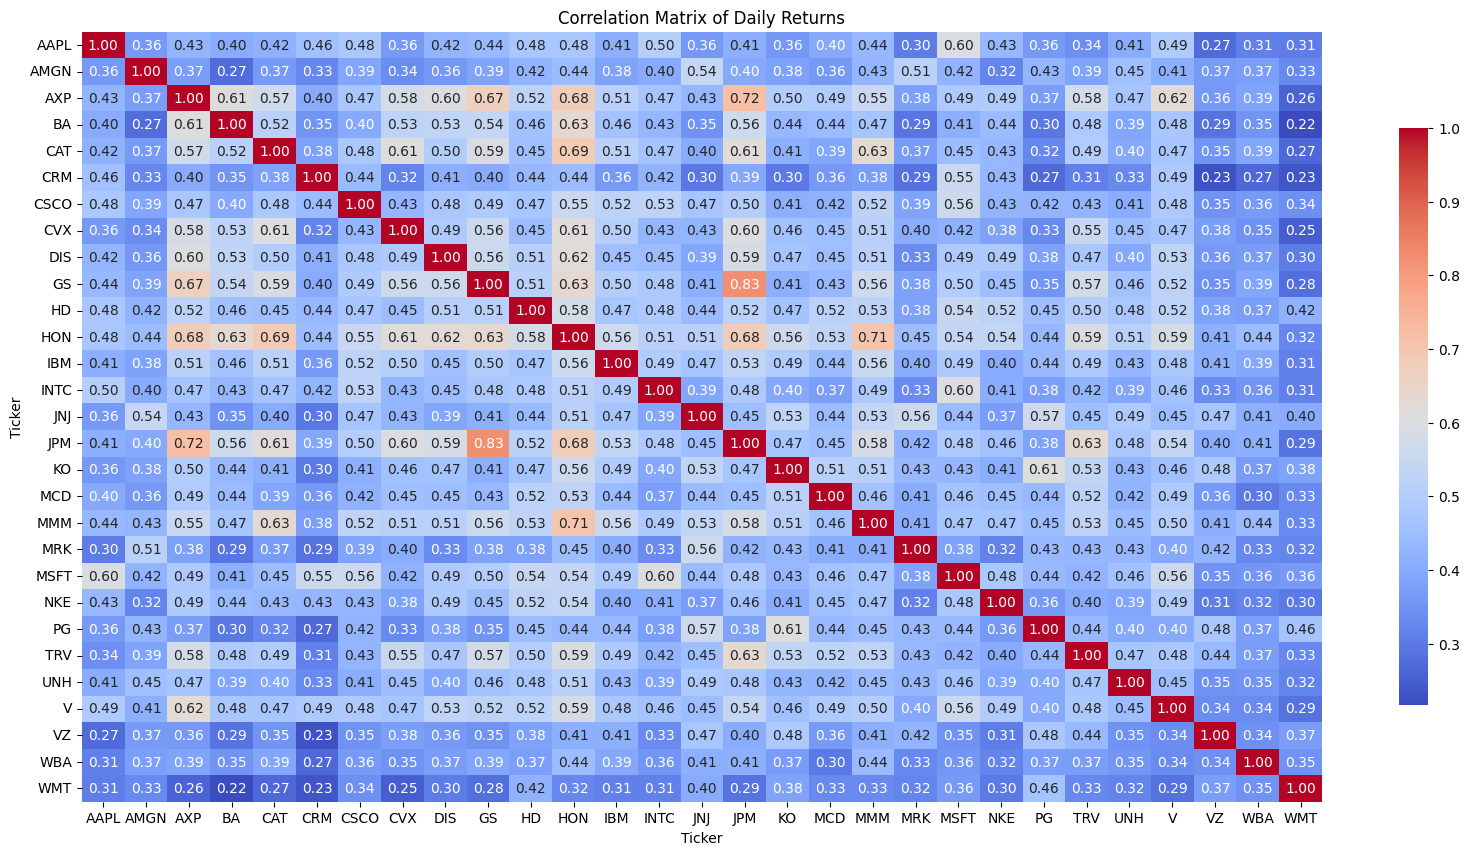

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as cm
import seaborn as sns

part3dailyprc = part3dailyprc.pct_change().dropna()
correlation_matrix = part3dailyprc.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10}, cbar_kws={"shrink": 0.75},)
plt.title('Correlation Matrix of Daily Returns')
plt.show()

In [192]:
np.random.seed(1)
ticker = "JPM"
start_date = date(2010, 1, 1)
end_date = date(2023, 12, 31)
jpmdailyprc = yf.download(ticker, start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [193]:
jpm = jpmdailyprc.copy()
jpm['Ch_AdjClose']=jpm['Adj Close']-jpm['Adj Close'].shift(1)
jpm['PctCh_AdjClose'] = jpm['Adj Close'].pct_change()
jpm['Range']=jpm['High'] - jpm['Low']
jpm['RangeClose']=(jpm['Close'] - jpm['Low'])/(jpm['High'] - jpm['Low'])
jpm['Open Higher']=(jpm['Open']>jpm['Close'].shift(1)).astype(int)

#Calculate 7 and 14 day moving averages of various variables
jpm['Volume_7D_MA']=jpm['Volume'].rolling(window=7).mean()
jpm['Close_7D_MA']=jpm['Close'].rolling(window=7).mean()
jpm['Range_7D_MA']=jpm['Range'].rolling(window=7).mean()
jpm['Open Higher_7D_MA']=jpm['Open Higher'].rolling(window=7).mean()
jpm.dropna(inplace=True)
jpm['Volume_14D_MA']=jpm['Volume'].rolling(window=14).mean()
jpm['Close_14D_MA']=jpm['Close'].rolling(window=14).mean()
jpm['Range_14D_MA']=jpm['Range'].rolling(window=14).mean()
jpm['Open Higher_14D_MA']=jpm['Open Higher'].rolling(window=14).mean()
jpm.dropna(inplace=True)
jpm['Volume_Up'] = (jpm['Volume_7D_MA'] > jpm['Volume_14D_MA'].shift(1)).astype(int)
jpm['Close_Up'] = (jpm['Close_7D_MA'] > jpm['Close_14D_MA'].shift(1)).astype(int)
jpm['Range_Up'] = (jpm['Range_7D_MA'] > jpm['Range_14D_MA'].shift(1)).astype(int)

jpm['L7']=jpm['Low'].rolling(window=7).min()
jpm['H7']=jpm['High'].rolling(window=7).max()

jpm["L14"]=jpm['Low'].rolling(window=14).min()
jpm["H14"]=jpm['High'].rolling(window=14).max()

jpm["R14"]=(jpm["H14"]-jpm["L14"])/jpm["L14"]
jpm['Volatility_30D'] = jpm['PctCh_AdjClose'].rolling(window=30).std()
jpm['Volatility_60D'] = jpm['PctCh_AdjClose'].rolling(window=60).std()
jpm.dropna(inplace=True)
jpm

Price        Adj Close       Close        High         Low        Open  \
Ticker             JPM         JPM         JPM         JPM         JPM   
Date                                                                     
2010-04-27   28.889454   42.410000   44.369999   42.299999   43.480000   
2010-04-28   29.604698   43.459999   43.709999   42.779999   42.840000   
2010-04-29   29.972534   44.000000   44.330002   43.599998   43.889999   
2010-04-30   29.005266   42.580002   44.049999   42.230000   44.020000   
2010-05-03   29.652376   43.529999   43.730000   42.889999   42.970001   
...                ...         ...         ...         ...         ...   
2023-12-22  163.495819  167.399994  168.229996  167.229996  167.500000   
2023-12-26  164.462723  168.389999  168.770004  167.179993  167.460007   
2023-12-27  165.449173  169.399994  169.470001  167.580002  167.839996   
2023-12-28  166.328201  170.300003  170.660004  169.000000  169.350006   
2023-12-29  166.132858  170.100006  170.690002  169.630005  170.000000   

Price         Volume Ch_AdjClose PctCh_AdjClose     Range RangeClose  ...  \
Ticker           JPM                                                  ...   
Date                                                                  ...   
2010-04-27  66296100   -1.008156      -0.033720  2.070000   0.053140  ...   
2010-04-28  48578900    0.715244       0.024758  0.930000   0.731183  ...   
2010-04-29  36520300    0.367836       0.012425  0.730003   0.547945  ...   
2010-04-30  54121100   -0.967268      -0.032272  1.820000   0.192309  ...   
2010-05-03  31230900    0.647110       0.022310  0.840000   0.761904  ...   
...              ...         ...            ...       ...        ...  ...   
2023-12-22   6574900   -0.097687      -0.000597  1.000000   0.169998  ...   
2023-12-26   4683600    0.966904       0.005914  1.590012   0.761005  ...   
2023-12-27   6428600    0.986450       0.005998  1.889999   0.962959  ...   
2023-12-28   6320100    0.879028       0.005313  1.660004   0.783133  ...   
2023-12-29   6431800   -0.195343      -0.001174  1.059998   0.443398  ...   

Price      Volume_Up Close_Up Range_Up          L7          H7         L14  \
Ticker                                                                       
Date                                                                         
2010-04-27         1        0        1   42.299999   46.389999   42.299999   
2010-04-28         0        0        1   42.299999   46.389999   42.299999   
2010-04-29         0        0        1   42.299999   46.389999   42.299999   
2010-04-30         0        0        1   42.230000   45.119999   42.230000   
2010-05-03         0        0        0   42.230000   45.070000   42.230000   
...              ...      ...      ...         ...         ...         ...   
2023-12-22         1        1        1  161.710007  169.410004  156.000000   
2023-12-26         0        1        1  162.389999  169.410004  156.000000   
2023-12-27         0        1        0  165.550003  169.470001  156.149994   
2023-12-28         0        1        1  165.550003  170.660004  156.979996   
2023-12-29         0        1        0  165.679993  170.690002  158.149994   

Price              H14       R14 Volatility_30D Volatility_60D  
Ticker                                                          
Date                                                            
2010-04-27   48.200001  0.139480       0.015889       0.016273  
2010-04-28   48.200001  0.139480       0.016525       0.016416  
2010-04-29   48.200001  0.139480       0.016518       0.016235  
2010-04-30   48.200001  0.141369       0.017551       0.016783  
2010-05-03   48.200001  0.141369       0.018025       0.015710  
...                ...       ...            ...            ...  
2023-12-22  169.410004  0.085962       0.007166       0.009814  
2023-12-26  169.410004  0.085962       0.006924       0.009477  
2023-12-27  169.470001  0.085303       0.006708       0.009369  
2023-12-28 

In [194]:
#comparing the next day's adjusted close price to the current day's adjusted close price
jpm['Target'] = (jpm['Adj Close'].shift(-1) > jpm['Adj Close']).astype(int)
#comparing percentage change
jpm['Target_PctCh'] = (jpm['PctCh_AdjClose'].shift(-1) > jpm['PctCh_AdjClose']).astype(int)
#comparing range up
jpm['Target_Range'] = (jpm['Range_Up'].shift(-1) > jpm['Range_Up']).astype(int)
jpm

Price        Adj Close       Close        High         Low        Open  \
Ticker             JPM         JPM         JPM         JPM         JPM   
Date                                                                     
2010-04-27   28.889454   42.410000   44.369999   42.299999   43.480000   
2010-04-28   29.604698   43.459999   43.709999   42.779999   42.840000   
2010-04-29   29.972534   44.000000   44.330002   43.599998   43.889999   
2010-04-30   29.005266   42.580002   44.049999   42.230000   44.020000   
2010-05-03   29.652376   43.529999   43.730000   42.889999   42.970001   
...                ...         ...         ...         ...         ...   
2023-12-22  163.495819  167.399994  168.229996  167.229996  167.500000   
2023-12-26  164.462723  168.389999  168.770004  167.179993  167.460007   
2023-12-27  165.449173  169.399994  169.470001  167.580002  167.839996   
2023-12-28  166.328201  170.300003  170.660004  169.000000  169.350006   
2023-12-29  166.132858  170.100006  170.690002  169.630005  170.000000   

Price         Volume Ch_AdjClose PctCh_AdjClose     Range RangeClose  ...  \
Ticker           JPM                                                  ...   
Date                                                                  ...   
2010-04-27  66296100   -1.008156      -0.033720  2.070000   0.053140  ...   
2010-04-28  48578900    0.715244       0.024758  0.930000   0.731183  ...   
2010-04-29  36520300    0.367836       0.012425  0.730003   0.547945  ...   
2010-04-30  54121100   -0.967268      -0.032272  1.820000   0.192309  ...   
2010-05-03  31230900    0.647110       0.022310  0.840000   0.761904  ...   
...              ...         ...            ...       ...        ...  ...   
2023-12-22   6574900   -0.097687      -0.000597  1.000000   0.169998  ...   
2023-12-26   4683600    0.966904       0.005914  1.590012   0.761005  ...   
2023-12-27   6428600    0.986450       0.005998  1.889999   0.962959  ...   
2023-12-28   6320100    0.879028       0.005313  1.660004   0.783133  ...   
2023-12-29   6431800   -0.195343      -0.001174  1.059998   0.443398  ...   

Price               L7          H7         L14         H14       R14  \
Ticker                                                                 
Date                                                                   
2010-04-27   42.299999   46.389999   42.299999   48.200001  0.139480   
2010-04-28   42.299999   46.389999   42.299999   48.200001  0.139480   
2010-04-29   42.299999   46.389999   42.299999   48.200001  0.139480   
2010-04-30   42.230000   45.119999   42.230000   48.200001  0.141369   
2010-05-03   42.230000   45.070000   42.230000   48.200001  0.141369   
...                ...         ...         ...         ...       ...   
2023-12-22  161.710007  169.410004  156.000000  169.410004  0.085962   
2023-12-26  162.389999  169.410004  156.000000  169.410004  0.085962   
2023-12-27  165.550003  169.470001  156.149994  169.470001  0.085303   
2023-12-28  165.550003  170.660004  156.979996  170.660004  0.087145   
2023-12-29  165.679993  170.690002  158.149994  170.690002  0.079292   

Price      Volatility_30D Volatility_60D Target Target_PctCh Target_Range  
Ticker                                                                     
Date                                                                       
2010-04-27       0.015889       0.016273      1            1            0  
2010-04-28       0.016525       0.016416      1            0            0  
2010-04-29       0.016518       0.016235      0            0            0  
2010-04-30       0.017551       0.016783      1            1            0  
2010-05-03       0.018025       0.015710      0            0            1  
...                   ...            ...    ...          ...          ...  
2023-12-22       0.007166       0.009814      1            1            0  
2023-12-26       0.006924       0.009477      1            1            0  
2023-12-27       0.006708       0.00936

In [195]:
model_df_jpm = jpm[jpm.index.year < 2023].copy()
holdout_df_jpm = jpm[jpm.index.year >= 2023].copy()
model_df_jpm

Price        Adj Close       Close        High         Low        Open  \
Ticker             JPM         JPM         JPM         JPM         JPM   
Date                                                                     
2010-04-27   28.889454   42.410000   44.369999   42.299999   43.480000   
2010-04-28   29.604698   43.459999   43.709999   42.779999   42.840000   
2010-04-29   29.972534   44.000000   44.330002   43.599998   43.889999   
2010-04-30   29.005266   42.580002   44.049999   42.230000   44.020000   
2010-05-03   29.652376   43.529999   43.730000   42.889999   42.970001   
...                ...         ...         ...         ...         ...   
2022-12-23  124.506866  131.279999  131.440002  129.639999  130.580002   
2022-12-27  124.943146  131.740005  132.220001  130.550003  131.570007   
2022-12-28  125.626007  132.460007  133.410004  131.009995  131.850006   
2022-12-29  126.346794  133.220001  133.270004  132.309998  132.929993   
2022-12-30  127.181412  134.100006  134.330002  132.440002  132.809998   

Price         Volume Ch_AdjClose PctCh_AdjClose     Range RangeClose  ...  \
Ticker           JPM                                                  ...   
Date                                                                  ...   
2010-04-27  66296100   -1.008156      -0.033720  2.070000   0.053140  ...   
2010-04-28  48578900    0.715244       0.024758  0.930000   0.731183  ...   
2010-04-29  36520300    0.367836       0.012425  0.730003   0.547945  ...   
2010-04-30  54121100   -0.967268      -0.032272  1.820000   0.192309  ...   
2010-05-03  31230900    0.647110       0.022310  0.840000   0.761904  ...   
...              ...         ...            ...       ...        ...  ...   
2022-12-23   5091900    0.587990       0.004745  1.800003   0.911109  ...   
2022-12-27   5411000    0.436279       0.003504  1.669998   0.712577  ...   
2022-12-28   8827700    0.682861       0.005465  2.400009   0.604169  ...   
2022-12-29   6585200    0.720787       0.005738  0.960007   0.947914  ...   
2022-12-30   9292500    0.834618       0.006606  1.889999   0.878309  ...   

Price               L7          H7         L14         H14       R14  \
Ticker                                                                 
Date                                                                   
2010-04-27   42.299999   46.389999   42.299999   48.200001  0.139480   
2010-04-28   42.299999   46.389999   42.299999   48.200001  0.139480   
2010-04-29   42.299999   46.389999   42.299999   48.200001  0.139480   
2010-04-30   42.230000   45.119999   42.230000   48.200001  0.141369   
2010-05-03   42.230000   45.070000   42.230000   48.200001  0.141369   
...                ...         ...         ...         ...       ...   
2022-12-23  128.410004  132.979996  128.410004  137.089996  0.067596   
2022-12-27  128.410004  132.979996  128.410004  137.089996  0.067596   
2022-12-28  128.410004  133.410004  128.410004  137.089996  0.067596   
2022-12-29  128.410004  133.410004  128.410004  137.089996  0.067596   
2022-12-30  128.410004  134.330002  128.410004  137.089996  0.067596   

Price      Volatility_30D Volatility_60D Target Target_PctCh Target_Range  
Ticker                                                                     
Date                                                                       
2010-04-27       0.015889       0.016273      1            1            0  
2010-04-28       0.016525       0.016416      1            0            0  
2010-04-29       0.016518       0.016235      0            0            0  
2010-04-30       0.017551       0.016783      1            1            0  
2010-05-03       0.018025       0.015710      0            0            1  
...                   ...            ...    ...          ...          ...  
2022-12-23       0.011437       0.018757      1            0            0  
2022-12-27       0.011456       0.018582      1            1            0  
2022-12-28       0.011369       0.01824

In [196]:
mse_dict_test={
    "OLS": [],
    "Lasso": [],
    "knn": [],
    "DTree": [],
    "RandomForest": [],
    "GradientBoost": []
}

mse_dict_train={
    "OLS": [],
    "Lasso": [],
    "knn": [],
    "DTree": [],
    "RandomForest": [],
    "GradientBoost": []
}

In [197]:
#selecting features for this machine learning model -- for this I wanted to use all of them
features = [
    'Volume', 'Close', 'Range', 'RangeClose', 'Open Higher',
    'Volume_7D_MA', 'Close_7D_MA', 'Range_7D_MA', 'Open Higher_7D_MA',
    'Volume_14D_MA', 'Close_14D_MA', 'Range_14D_MA', 'Open Higher_14D_MA',
    'Volume_Up', 'Close_Up', 'Range_Up', 'L7', 'H7', 'L14', 'H14', 'R14', 'Volatility_30D', 'Volatility_60D']
X_model= model_df_jpm[features]
y_model = model_df_jpm['Target']
x_holdout = holdout_df_jpm[features]
y_holdout = holdout_df_jpm['Target']
X_train, X_test, y_train, y_test = train_test_split(X_model,y_model,test_size=0.25, random_state=123)
y_train.mean()

0.5048016701461377

In [198]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
selector = SequentialFeatureSelector(ln_model, n_features_to_select='auto')
selector = selector.fit(X_train, y_train)
ln_model=LinearRegression()
ln_model.fit(X_train, y_train)
yhat_model_test=(ln_model.predict(X_test) > 0.5)
yhat_model_train=(ln_model.predict(X_train) > 0.5)
mse_dict_test['OLS']=mean_squared_error(y_test,yhat_model_test)
mse_dict_train['OLS']=mean_squared_error(y_train,yhat_model_train)
selected_features = X_train.columns[selector.get_support()]
print(f"Selected features (forward selection): {selected_features}")

Selected features (forward selection): MultiIndex([(        'Volume', 'JPM'),
            (    'RangeClose',    ''),
            (   'Open Higher',    ''),
            (  'Volume_7D_MA',    ''),
            (   'Range_7D_MA',    ''),
            (  'Range_14D_MA',    ''),
            (     'Volume_Up',    ''),
            (      'Close_Up',    ''),
            (      'Range_Up',    ''),
            (           'R14',    ''),
            ('Volatility_60D',    '')],
           names=['Price', 'Ticker'])


In [199]:
lr_feature_importance = pd.Series(ln_model.coef_, index=features)
lr_feature_importance.sort_values(ascending=False, inplace=True)
lr_feature_importance

R14                   5.785933e-01
Range_Up              4.054315e-02
Range_14D_MA          2.046058e-02
Close_Up              1.220828e-02
Volume_Up             1.172425e-02
Close_7D_MA           1.015362e-02
L14                   5.881874e-03
H14                   4.360711e-03
Open Higher_14D_MA    3.254779e-03
Range                 2.355983e-03
Close                 1.970912e-03
Open Higher           1.454259e-03
Volume_14D_MA         1.200517e-09
Volume               -7.379350e-10
Volume_7D_MA         -1.966478e-09
L7                   -2.110179e-03
H7                   -7.864802e-03
Close_14D_MA         -1.245440e-02
Open Higher_7D_MA    -2.391555e-02
Range_7D_MA          -2.451500e-02
RangeClose           -5.712623e-02
Volatility_30D       -8.463456e-01
Volatility_60D       -1.203997e+00
dtype: float64

In [200]:
#Lasso
from sklearn.linear_model import Lasso
model=Lasso(alpha=2)
model.fit(X_train, y_train)
yhat_model_test=(model.predict(X_test) > 0.5)
yhat_model_train=(model.predict(X_train) > 0.5)
mse_dict_test['Lasso']=mean_squared_error(y_test,yhat_model_test)
mse_dict_train['Lasso']=mean_squared_error(y_train,yhat_model_train)
selected_features = X_train.columns[model.coef_ != 0]
print(f"Selected features (Lasso): {selected_features}")

Selected features (Lasso): MultiIndex([(       'Volume', 'JPM'),
            ( 'Volume_7D_MA',    ''),
            ('Volume_14D_MA',    '')],
           names=['Price', 'Ticker'])


In [201]:
lasso_feature_importance = pd.Series(model.coef_, index=features)
lasso_feature_importance.sort_values(ascending=False, inplace=True)
lasso_feature_importance

Volume_7D_MA          5.797799e-10
Range_14D_MA         -0.000000e+00
Open Higher_14D_MA    0.000000e+00
Volatility_30D       -0.000000e+00
R14                   0.000000e+00
H14                  -0.000000e+00
L14                  -0.000000e+00
H7                   -0.000000e+00
L7                   -0.000000e+00
Range_Up              0.000000e+00
Close_Up              0.000000e+00
Volume_Up             0.000000e+00
Volatility_60D       -0.000000e+00
Close                -0.000000e+00
Close_14D_MA         -0.000000e+00
Open Higher_7D_MA    -0.000000e+00
Range_7D_MA          -0.000000e+00
Close_7D_MA          -0.000000e+00
Open Higher           0.000000e+00
RangeClose           -0.000000e+00
Range                -0.000000e+00
Volume               -3.218668e-10
Volume_14D_MA        -6.656282e-10
dtype: float64

In [202]:
#K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
yhat_model_test=(knn.predict(X_test) > 0.5)
yhat_model_train=(knn.predict(X_train) > 0.5)
mse_dict_test['knn']=mean_squared_error(y_test,yhat_model_test)
mse_dict_train['knn']=mean_squared_error(y_train,yhat_model_train)

In [203]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3, random_state=123)
dt.fit(X_train, y_train)
mse_dict_train['DTree']=mean_squared_error(y_train,dt.predict(X_train))
mse_dict_test['DTree']=mean_squared_error(y_test,dt.predict(X_test))

In [204]:
dt_feature_importance = pd.Series(dt.feature_importances_, index=features)
dt_feature_importance.sort_values(ascending=False, inplace=True)
dt_feature_importance

RangeClose            0.328912
L7                    0.199330
Range                 0.173358
Range_7D_MA           0.150690
R14                   0.147710
Volume                0.000000
Volume_Up             0.000000
Volatility_30D        0.000000
H14                   0.000000
L14                   0.000000
H7                    0.000000
Range_Up              0.000000
Close_Up              0.000000
Range_14D_MA          0.000000
Open Higher_14D_MA    0.000000
Close                 0.000000
Close_14D_MA          0.000000
Volume_14D_MA         0.000000
Open Higher_7D_MA     0.000000
Close_7D_MA           0.000000
Volume_7D_MA          0.000000
Open Higher           0.000000
Volatility_60D        0.000000
dtype: float64

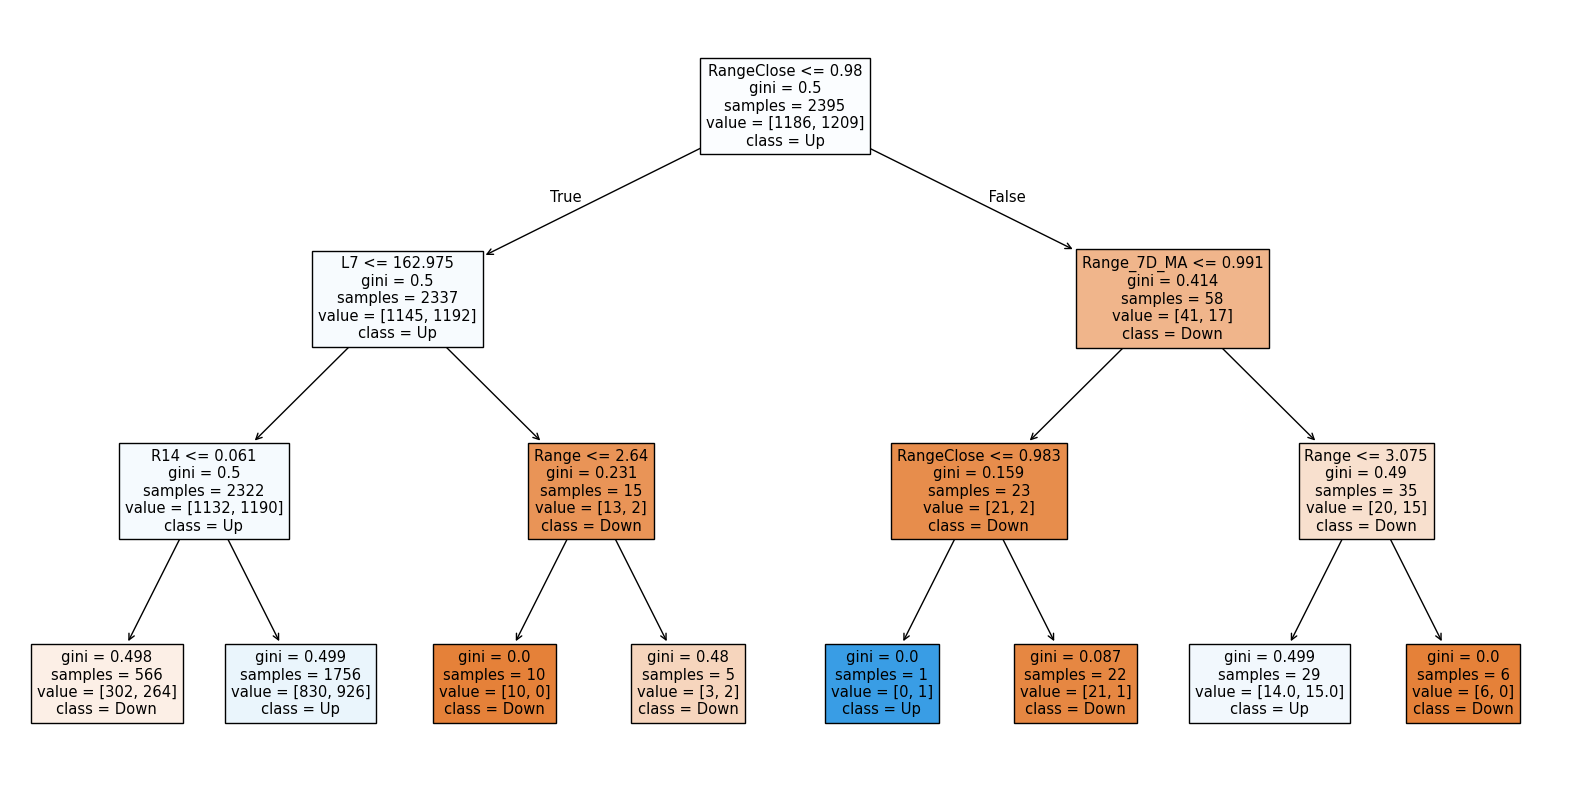

In [205]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=features, class_names=['Down','Up'], filled=True)
plt.show()

In [206]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
randfor = RandomForestClassifier(n_estimators = 5, random_state = 123)
randfor.fit(X_train, y_train)
mse_dict_train['RandomForest'] = mean_squared_error(y_train, randfor.predict(X_train))
mse_dict_test['RandomForest'] = mean_squared_error(y_test, randfor.predict(X_test))

In [207]:
rand_forest_feature_importances = pd.Series(randfor.feature_importances_, index=features)
rand_forest_feature_importances.sort_values(ascending=False, inplace=True)
rand_forest_feature_importances

RangeClose            0.073834
Volume_14D_MA         0.068092
Range                 0.064917
Volatility_30D        0.064908
Range_7D_MA           0.060842
Close                 0.059103
Range_14D_MA          0.059039
Volume                0.058547
Volume_7D_MA          0.058197
Volatility_60D        0.054965
R14                   0.052055
Close_7D_MA           0.048039
Close_14D_MA          0.047768
L7                    0.038876
H14                   0.037698
H7                    0.037106
L14                   0.030363
Open Higher_14D_MA    0.027815
Open Higher_7D_MA     0.027418
Open Higher           0.010418
Range_Up              0.007973
Close_Up              0.006070
Volume_Up             0.005957
dtype: float64

In [208]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(max_depth=3,n_estimators=5,random_state=123)
grad.fit(X_train, y_train)
mse_dict_train['GradientBoost'] = mean_squared_error(y_train, grad.predict(X_train))
mse_dict_test['GradientBoost']=mean_squared_error(y_test, grad.predict(X_test))

In [209]:
grad_feature_importances = pd.Series(grad.feature_importances_, index=features)
grad_feature_importances.sort_values(ascending=False, inplace=True)
grad_feature_importances

RangeClose            0.215414
Range                 0.145383
Volume                0.126295
R14                   0.122935
Range_7D_MA           0.077653
L7                    0.072170
Volatility_60D        0.071299
Volatility_30D        0.060447
L14                   0.058129
Volume_7D_MA          0.040350
Close_7D_MA           0.009789
Close_Up              0.000137
Open Higher_7D_MA     0.000000
Volume_14D_MA         0.000000
Close_14D_MA          0.000000
Close                 0.000000
Open Higher_14D_MA    0.000000
Volume_Up             0.000000
Range_Up              0.000000
H7                    0.000000
H14                   0.000000
Open Higher           0.000000
Range_14D_MA          0.000000
dtype: float64

In [210]:
feature_importance_df = lr_feature_importance.to_frame(name='Linear Regression')
feature_importance_df['Lasso'] = lasso_feature_importance
feature_importance_df['Dtree'] = dt_feature_importance
feature_importance_df['RandomForest'] = rand_forest_feature_importances
feature_importance_df['GradientBoost'] = grad_feature_importances
feature_importance_df

Linear Regression         Lasso     Dtree  RandomForest  \
R14                      5.785933e-01  0.000000e+00  0.147710      0.052055   
Range_Up                 4.054315e-02  0.000000e+00  0.000000      0.007973   
Range_14D_MA             2.046058e-02 -0.000000e+00  0.000000      0.059039   
Close_Up                 1.220828e-02  0.000000e+00  0.000000      0.006070   
Volume_Up                1.172425e-02  0.000000e+00  0.000000      0.005957   
Close_7D_MA              1.015362e-02 -0.000000e+00  0.000000      0.048039   
L14                      5.881874e-03 -0.000000e+00  0.000000      0.030363   
H14                      4.360711e-03 -0.000000e+00  0.000000      0.037698   
Open Higher_14D_MA       3.254779e-03  0.000000e+00  0.000000      0.027815   
Range                    2.355983e-03 -0.000000e+00  0.173358      0.064917   
Close                    1.970912e-03 -0.000000e+00  0.000000      0.059103   
Open Higher              1.454259e-03  0.000000e+00  0.000000      0.010418   
Volume_14D_MA            1.200517e-09 -6.656282e-10  0.000000      0.068092   
Volume                  -7.379350e-10 -3.218668e-10  0.000000      0.058547   
Volume_7D_MA            -1.966478e-09  5.797799e-10  0.000000      0.058197   
L7                      -2.110179e-03 -0.000000e+00  0.199330      0.038876   
H7                      -7.864802e-03 -0.000000e+00  0.000000      0.037106   
Close_14D_MA            -1.245440e-02 -0.000000e+00  0.000000      0.047768   
Open Higher_7D_MA       -2.391555e-02 -0.000000e+00  0.000000      0.027418   
Range_7D_MA             -2.451500e-02 -0.000000e+00  0.150690      0.060842   
RangeClose              -5.712623e-02 -0.000000e+00  0.328912      0.073834   
Volatility_30D          -8.463456e-01 -0.000000e+00  0.000000      0.064908   
Volatility_60D          -1.203997e+00 -0.000000e+00  0.000000      0.054965   

                    GradientBoost  
R14                      0.122935  
Range_Up                 0.000000  
Range_14D_MA             0.000000  
Close_Up                 0.000137  
Volume_Up                0.000000  
Close_7D_MA              0.009789  
L14                      0.058129  
H14                      0.000000  
Open Higher_14D_MA       0.000000  
Range                    0.145383  
Close                    0.000000  
Open Higher              0.000000  
Volume_14D_MA            0.000000  
Volume                   0.126295  
Volume_7D_MA             0.040350  
L7                       0.072170  
H7                       0.000000  
Close_14D_MA             0.000000  
Open Higher_7D_MA        0.000000  
Range_7D_MA              0.077653  
RangeClose               0.215414  
Volatility_30D           0.060447  
Volatility_60D           0.071299

In [211]:
minmse=min(mse_dict_test.values())
[i for i in mse_dict_test.keys() if mse_dict_test[i]==minmse]

['DTree']

In [212]:
mse_dict_train, mse_dict_test

({'OLS': 0.4751565762004175,
  'Lasso': 0.49728601252609606,
  'knn': 0.24425887265135698,
  'DTree': 0.4638830897703549,
  'RandomForest': 0.05636743215031315,
  'GradientBoost': 0.4342379958246347},
 {'OLS': 0.4918648310387985,
  'Lasso': 0.493116395494368,
  'knn': 0.5131414267834794,
  'DTree': 0.45807259073842305,
  'RandomForest': 0.4793491864831039,
  'GradientBoost': 0.4655819774718398})

In [214]:
best_model = DecisionTreeClassifier(max_depth=3, random_state=123)
best_model.fit(X_train, y_train)
yhat_model_holdout=(best_model.predict(x_holdout) > 0.5)
mean_squared_error(y_holdout,yhat_model_holdout)

0.464

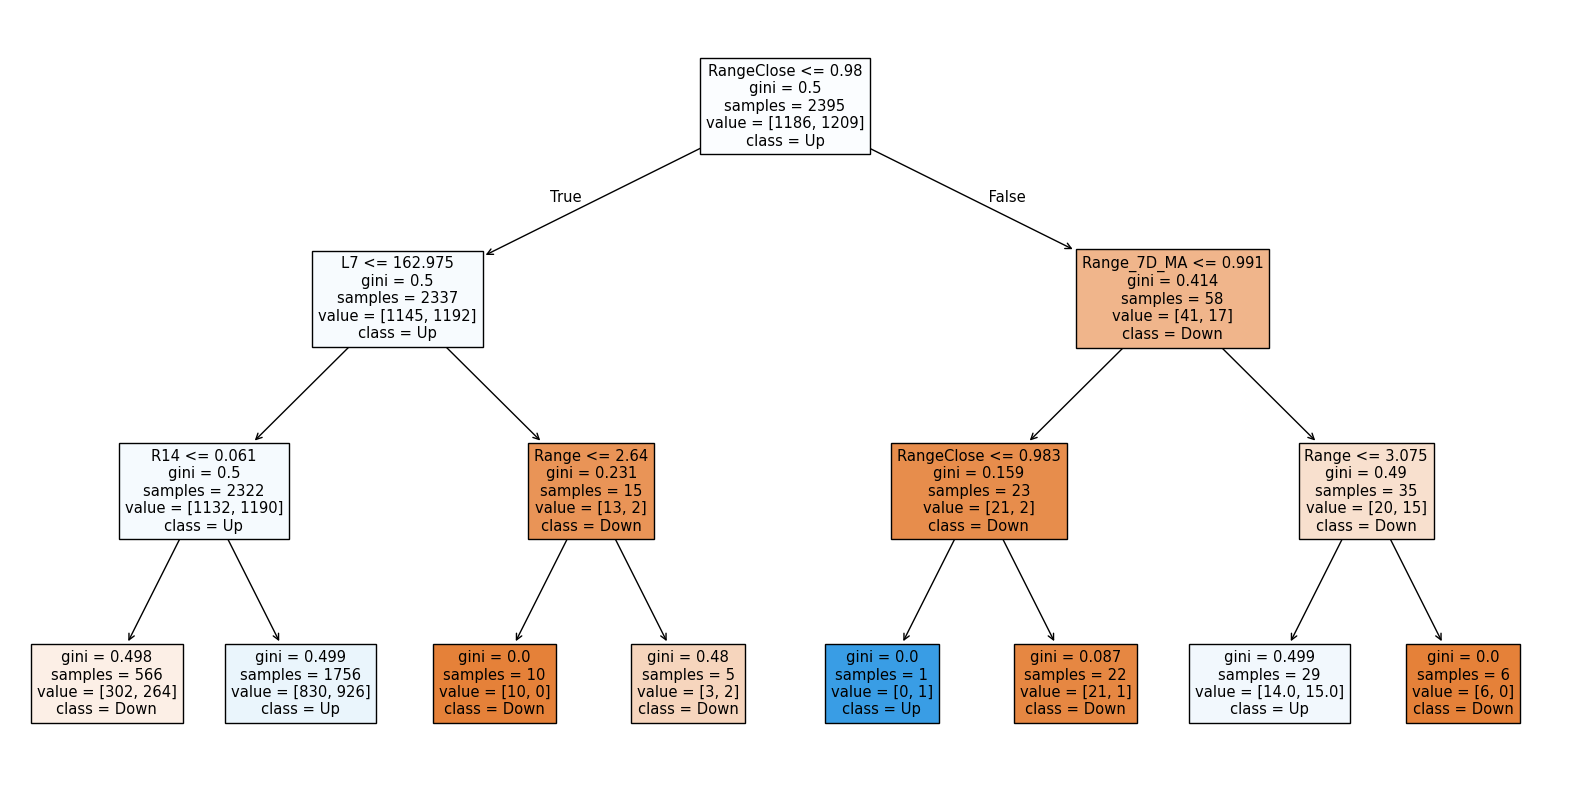

In [215]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(best_model, feature_names=features, class_names=['Down','Up'], filled=True)
plt.show()